<a href="https://www.kaggle.com/code/pranaii/titanic-eda-continued-august-10?scriptVersionId=139522091" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from IPython.core.display import HTML 
HTML (""" 
 <link rel="stylesheet"
          href="https://fonts.googleapis.com/css?family=Open+Sans">
<style>

    h1, h2, h3, h4, h5, h6 {
        background: linear-gradient(to right, #ff6a0d, #002cff);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent;
        background-size: 400% 400%;
        animation: shine 10s linear infinite alternate-reverse;
    } 
    
    ul, ol {
        background: linear-gradient(0deg, #000000, #333c99);
        -webkit-background-clip: text;
        -webkit-text-fill-color: transparent; 
     }

    body[data-jp-theme-light="true"] .jp-Notebook .CodeMirror.cm-s-jupyter {
                background: linear-gradient(to bottom, #f2f0ff, #ddf4fe, #e5fff0) !important;
                border-radius: 3em;
                border: 0px #ffffff;
    }
    
    jp-CodeConsole .CodeMirror.cm-s-jupyter {
                background: linear-gradient(to bottom, #f2f0ff, #ddf4fe, #e5fff0) !important;
                border-radius: 3em;
                border: 0px #ffffff;
    }

    div.input_area {
                background: linear-gradient(to bottom, #f2f0ff, #ddf4fe, #e5fff0) !important;
                border-radius: 3em;
                border: 0px #ffffff;
    }

    @keyframes shine {
        0% { background-position: 0% 50%; }
        50% { background-position: 100% 50%; }
        100% { background-position: 0% 50%; }
    }

    @-webkit-keyframes shine {
            0% { background-position: 0% 50%;}
            50% { background-position: 100% 50%; }
            100% { background-position: 0% 50%; }      
    }
    
    @-moz-keyframes shine {
            0% { background-position: 0% 50%; }
            50% { background-position: 100% 50%; }
            100% { background-position: 0% 50%;}
    }
    
    div.input{
        max-width:fit-content !important;
    }
    
   div.text_cell_render {
      border: 3px solid #f000;
      border-radius: 2em;
      background: linear-gradient(#ffffff, #dee9ff) padding-box, linear-gradient(
            var(--angle),
            #ff6a0d,
            #687aff
          ) border-box;    
      width: fit-content;
      animation: 8s rotate linear infinite;
      padding: 16px 16px 16px 16px;

   }
    @keyframes rotate {
      to {
            --angle: 360deg;
          }
        }

    @property --angle {
      syntax: "<angle>";
      initial-value: 0deg;
      inherits: false;
    }
    

</style> """)

# About Titanic

**RMS Titanic** was a British passenger liner, operated by the White Star Line, that sank in the **North Atlantic Ocean on 15 April 1912** after striking an iceberg during her maiden voyage from **Southampton**, England to New York City, United States. Of the estimated **2,224 passengers** and crew aboard, more than **1,500 died**, making it the **deadliest sinking of a single ship** up to that time. It remains the deadliest peacetime sinking of an ocean liner or cruise ship.

# The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).**

# Dataset Description
## Data Dictionary

| **Variable**  | **Definition**  | **Key**  |
|---|---|---|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd
| sex | Sex	
| Age | Age in years	
| sibsp	| # of siblings / spouses aboard the Titanic	
| parch | # of parents / children aboard the Titanic	
| ticket | Ticket number	
| fare | Passenger fare	
| cabin | Cabin number	
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton

		
## Variable Notes

- **pclass**: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- **age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- **sibsp**: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)

- **parch**: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson
    - Some children travelled only with a nanny, therefore parch=0 for them.

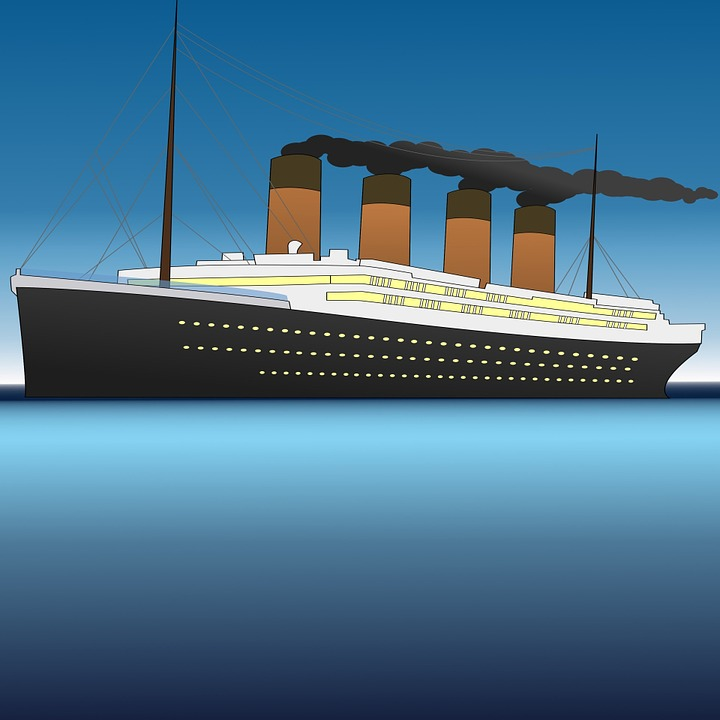

### Titanic route [Southampton to New York]

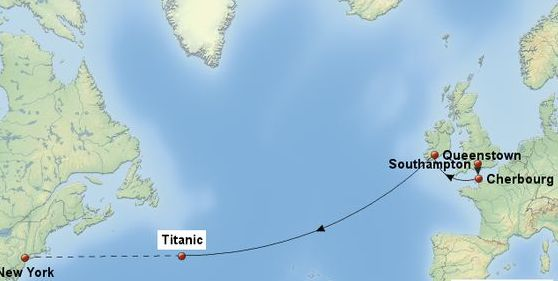

# 0. Import the libraries 

In [2]:
# Data analysis
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

# For printing multiple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Visualization parameters
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# 1. Analysing the data

## 1.1 Reading the datasets

In [4]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

### Observations
- Our training dataset is too small.
- It has 891 rows and 12 columns.

In [5]:
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_test

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

### Observations
- Our test dataset has 418 rows & 11 columns (As **Survived** is excluded).

In [6]:
# Top 5 values in our training dataset

df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
# Top 5 values in our test dataset

df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

### Observations
- We see **PassengerId** as a unique column that is same as index. So, we will remove it.
- **Survived** is the target class we want to predict. 
- **Pclass** is a categorical column that is already Label encoded.
- **Name** is a string and we don't consider it in training the model, but we can do some cool stuff with Names later using basic NLP. 
- **Sex** is a binary categorical column.
- Need to explore the values of **Parch** as it is not clear with the top 5 values.
- **Ticket** may also be unique column, let us check it further.
- **Fare** might be a good predictor because, higher fare = more facilities = more safety = % of survival is more.
- **Cabin** has NaNs, we should handle them.
- **Emabrked** is a 3 category column.

For readability, in the training set let's push **Survived** to the end. So that X & Y are separated clearly.

In [8]:
# Get the columns

df_train.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
# Rearrange using reindex

df_train = df_train.reindex(columns=['PassengerId',
                     'Pclass',
                     'Name',
                     'Sex',
                     'Age',
                     'SibSp',
                     'Parch',
                     'Ticket',
                     'Fare',
                     'Cabin',
                     'Embarked',
                     'Survived'])
df_train

PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
..           ...     ...                                                ...   
886          887       2                              Montvila, Rev. Juozas   
887          888       1                       Graham, Miss. Margaret Edith   
888          889       3           Johnston, Miss. Catherine Helen "Carrie"   
889          890       1                              Behr, Mr. Karl Howell   
890          891       3                                Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0      male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1    female  38.0      1      0          PC 17599  71.2833   C85        C   
2    female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3    female  35.0      1      0            113803  53.1000  C123        S   
4      male  35.0      0      0            373450   8.0500   NaN        S   
..      ...   ...    ...    ...               ...      ...   ...      ...   
886    male  27.0      0      0            211536  13.0000   NaN        S   
887  female  19.0      0      0            112053  30.0000   B42        S   
888  female   NaN      1      2        W./C. 6607  23.4500   NaN        S   
889    male  26.0      0      0            111369  30.0000  C148        C   
890    male  32.0      0      0            370376   7.7500   NaN        Q   

     Survived  
0           0  
1           1  
2           1  
3           1  
4           0  
..        ...  
886         0  
887         1  
888         0  
889         1  
890         0  

[891 rows x 12 columns]

## 1.2 Checking the data types of all the columns.

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Checking the Statistics of integer/float columns

In [12]:
df_train.describe().T.style.bar()

### Training set Observations
- Average age of the passengers is around **29 years**. 
- The **youngest** passenger is just 5 months old & the **oldest** passenger is 80 years old.
- 75% of the people are below 38 years, so many passengers are pretty young and only a very few older people.
- The currency of **Fare** in this dataset is given not in US Dollar $, it is in British Pound £.
- The average price is 32, but median is 14.5, that means our dataset is highly affected by an outlier that has pumped the mean/average.
- The **Costliest ticket was 512 Pounds** & 75% of the tickets were less than 32 pounds.

### Titanic ticket price today (In £).


| Class             |  Price in 1912| Price in May 2023|
|-------------------|---------------|------------------|
| First Class Suite |  870          | 81,671.44        
| First Class Berth |  30           | 2,816.26         
| Second Class      |  12           | 1,126.50         
| Third Class       |  7            | 657.13           

    Source: https://highseascruising.com/how-much-was-a-ticket-on-the-titanic/ 

- The biggest family that traveled has 8 family members.
- **38%** of the people had survived. 
- Our training data is biased towards people who has not survived i.e **62%**. 
    - So our model might not perform well if test data set has more of survived records.


In [13]:
df_test.describe().T.style.bar()

### Test set Observations
- Average age is **30 years**
- The average price is 35, but median is 14.5, that means our dataset is highly affected by an outlier that has pumped the mean/average.
- The biggest family that traveled has 9 family members.

Checking the Statistics of object columns

In [14]:
df_train.describe(include='object').T

count unique                      top freq
Name       891    891  Braund, Mr. Owen Harris    1
Sex        891      2                     male  577
Ticket     891    681                   347082    7
Cabin      204    147                  B96 B98    4
Embarked   889      3                        S  644

### Training set Observations
- Nobody had the same name in the entire Titanic!
- **Ticket** has 76% unique values, so it is not a good feature.
- **Cabin** has only 204 values out of 891, so other values are missing?

**Embarked** has 3 categories & majority of the people had boarded at **Southampton**

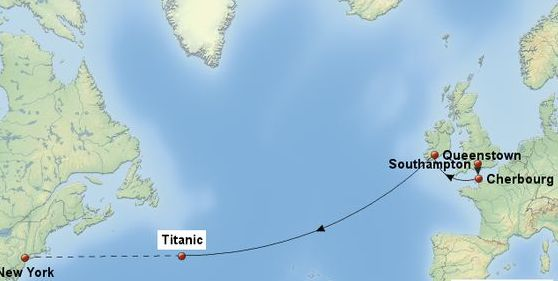

In [15]:
df_test.describe(include='object').T

count unique               top freq
Name       418    418  Kelly, Mr. James    1
Sex        418      2              male  266
Ticket     418    363          PC 17608    5
Cabin       91     76   B57 B59 B63 B66    3
Embarked   418      3                 S  270

### Test set Observations
- Nobody had the same name in the entire Titanic!
- **Ticket** has ~87% unique values, so it is not a good feature.
- **Cabin** has only 91 values out of 418, so other values are missing?

### 1.2.1 Exploring Cabin - good for exploring, but not for modelling :(

Text(0.5, 1.0, 'Passengers vs Cabins')

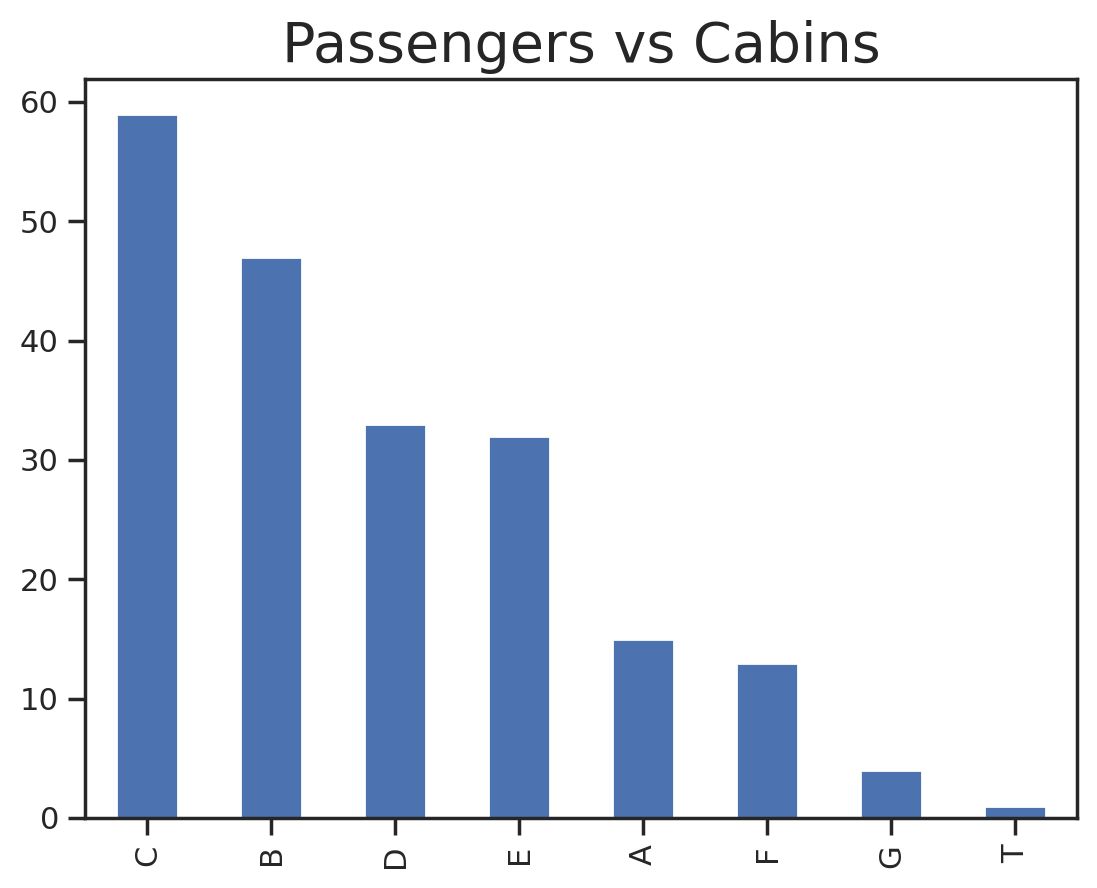

In [16]:
# Though Cabin is not a good feature, we can do some stuff to understand what actually it is.

ax = df_train.Cabin.dropna().apply(lambda x : str(x)[0]).value_counts().plot.bar()
ax.set_title("Passengers vs Cabins", fontsize=20)

In [17]:
cabin_index = df_train.Cabin.dropna().apply(lambda x : str(x)[0]).index
cabin_index

Int64Index([  1,   3,   6,  10,  11,  21,  23,  27,  31,  52,
            ...
            849, 853, 857, 862, 867, 871, 872, 879, 887, 889],
           dtype='int64', length=204)

In [18]:
df_train_cabin_fare = df_train.loc[cabin_index,["Cabin", "Fare"]].copy()
df_train_cabin_fare

Cabin     Fare
1            C85  71.2833
3           C123  53.1000
6            E46  51.8625
10            G6  16.7000
11          C103  26.5500
..           ...      ...
871          D35  52.5542
872  B51 B53 B55   5.0000
879          C50  83.1583
887          B42  30.0000
889         C148  30.0000

[204 rows x 2 columns]

In [19]:
df_train_cabin_fare["Cabin_first_letter"] = df_train_cabin_fare['Cabin'].apply(lambda x : x[0])
df_train_cabin_fare

Cabin     Fare Cabin_first_letter
1            C85  71.2833                  C
3           C123  53.1000                  C
6            E46  51.8625                  E
10            G6  16.7000                  G
11          C103  26.5500                  C
..           ...      ...                ...
871          D35  52.5542                  D
872  B51 B53 B55   5.0000                  B
879          C50  83.1583                  C
887          B42  30.0000                  B
889         C148  30.0000                  C

[204 rows x 3 columns]

Text(0.5, 1.0, 'Average cost of Cabins in British Pound £')

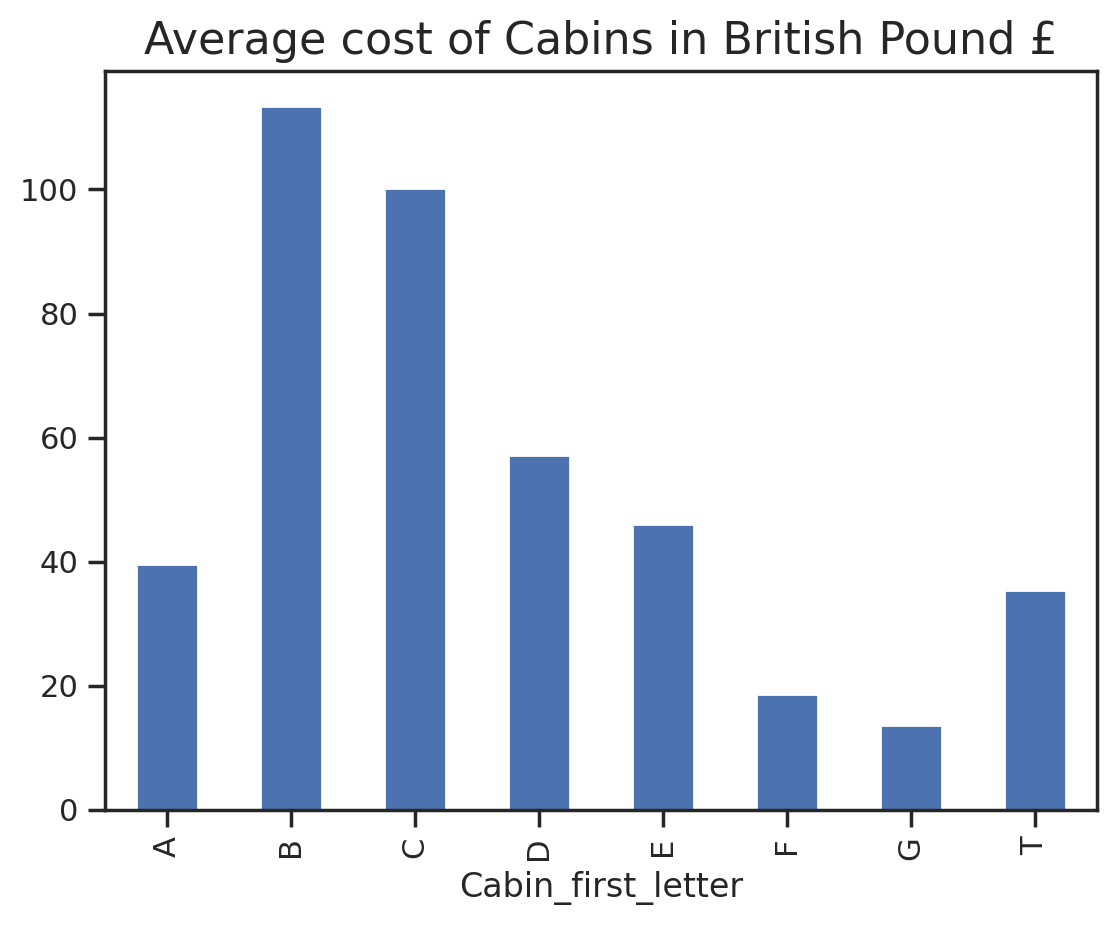

In [20]:
ax = round(df_train_cabin_fare.groupby(by=['Cabin_first_letter']).Fare.mean(), 1).plot.bar()
ax.set_title("Average cost of Cabins in British Pound £", fontsize=16)

### Observations
- We see B & C are the two costliest cabins.
- F & G are the cheapest cabins.

In [21]:
# for column in df_train_cabin_fare['Cabin_first_letter'].unique():
#     plt.figure(figsize=(5,3))
#     plt.boxplot(x=df_train_cabin_fare.loc[
#         df_train_cabin_fare['Cabin_first_letter'] == column, "Fare"],
#                 vert=False)
#     plt.title("Distribution of Cabin " + column + " in British Pound £",
#                     fontsize=16)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Cabins in British Pound £')

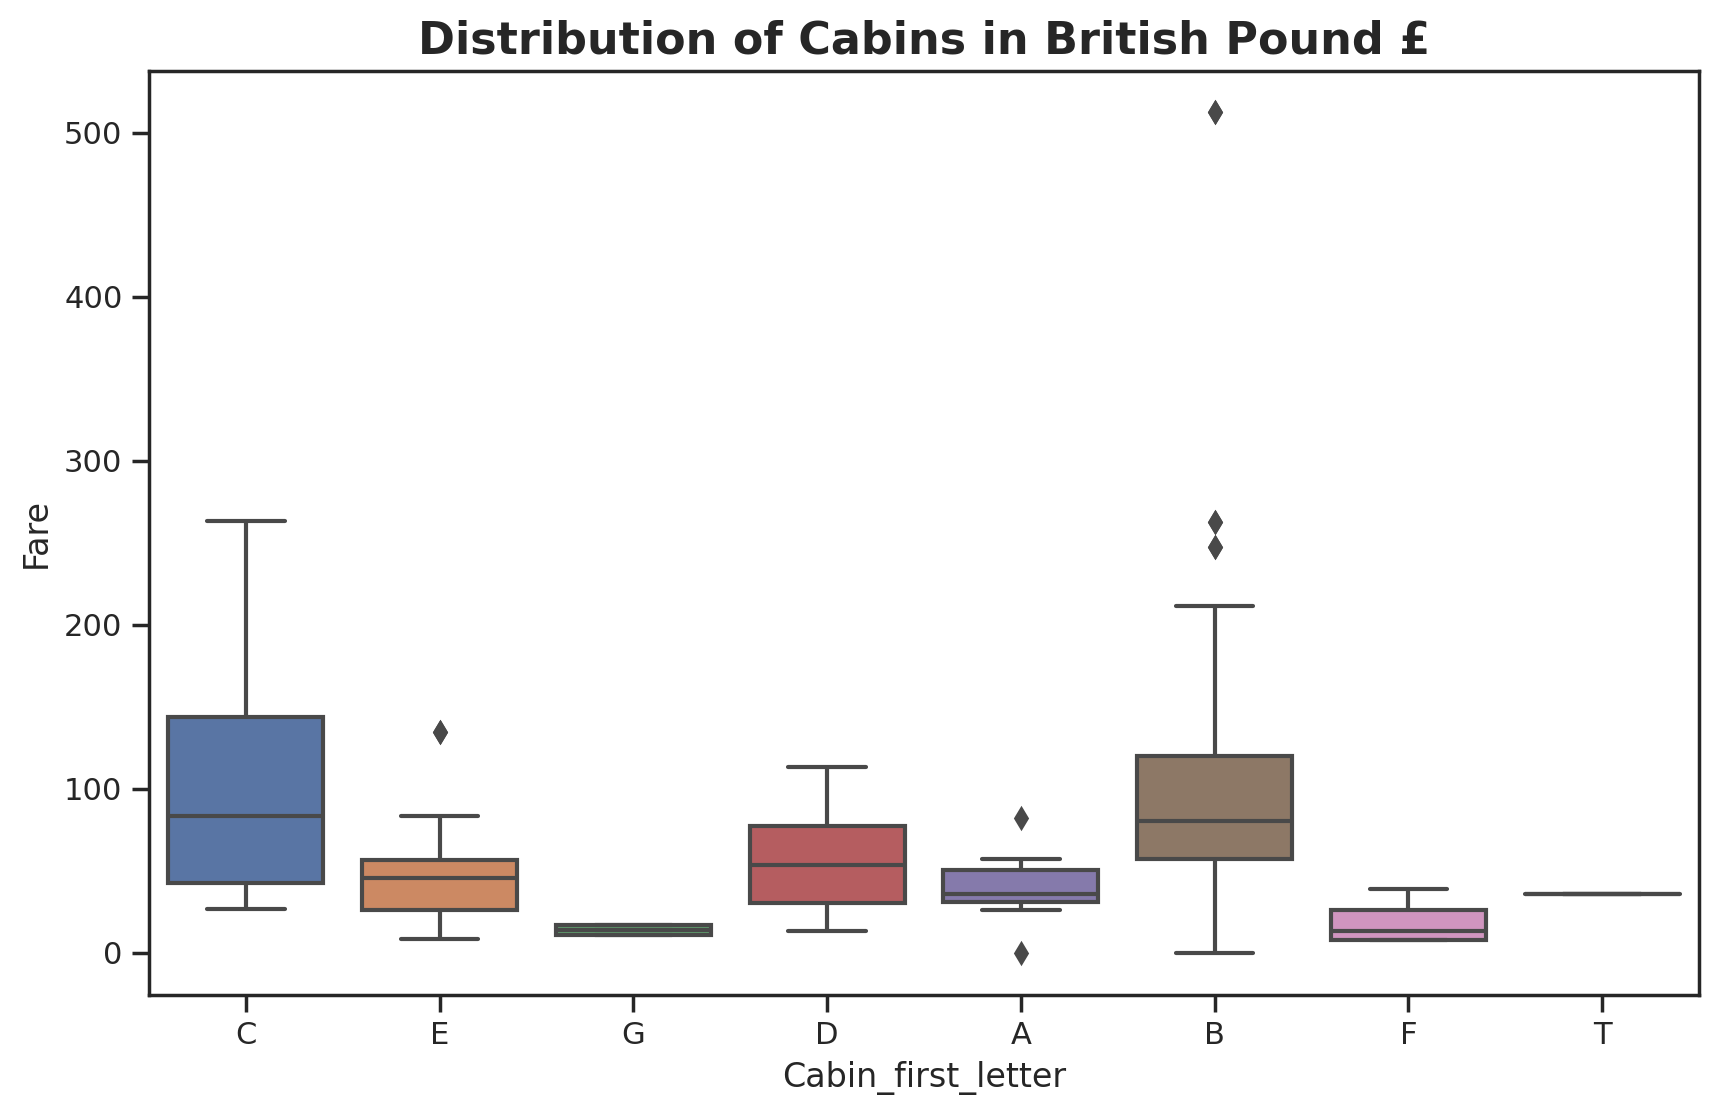

In [22]:
# Short form of above code

plt.figure(figsize=(10,6))
ax = sns.boxplot(data=df_train_cabin_fare, x='Cabin_first_letter', y='Fare')
ax.set_title("Distribution of Cabins in British Pound £", fontsize=16, fontweight='bold')

### Observations
- We can see C's average cost is around 90-ish, but B is close to C, but not greater.
- Earlier we saw B was the costliest, but it's average was pumped due to outliers we see in the box plot.
- Let us see costliest cabin in the dataframe to confirm this.

In [23]:
df_train_cabin_fare.sort_values(['Fare'], ascending=False)

Cabin      Fare Cabin_first_letter
679  B51 B53 B55  512.3292                  B
737         B101  512.3292                  B
88   C23 C25 C27  263.0000                  C
341  C23 C25 C27  263.0000                  C
27   C23 C25 C27  263.0000                  C
..           ...       ...                ...
715        F G73    7.6500                  F
872  B51 B53 B55    5.0000                  B
806          A36    0.0000                  A
263          B94    0.0000                  B
815         B102    0.0000                  B

[204 rows x 3 columns]

- We see two 512's are from B, so B's average was pumped.

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Cabins in British Pound £')

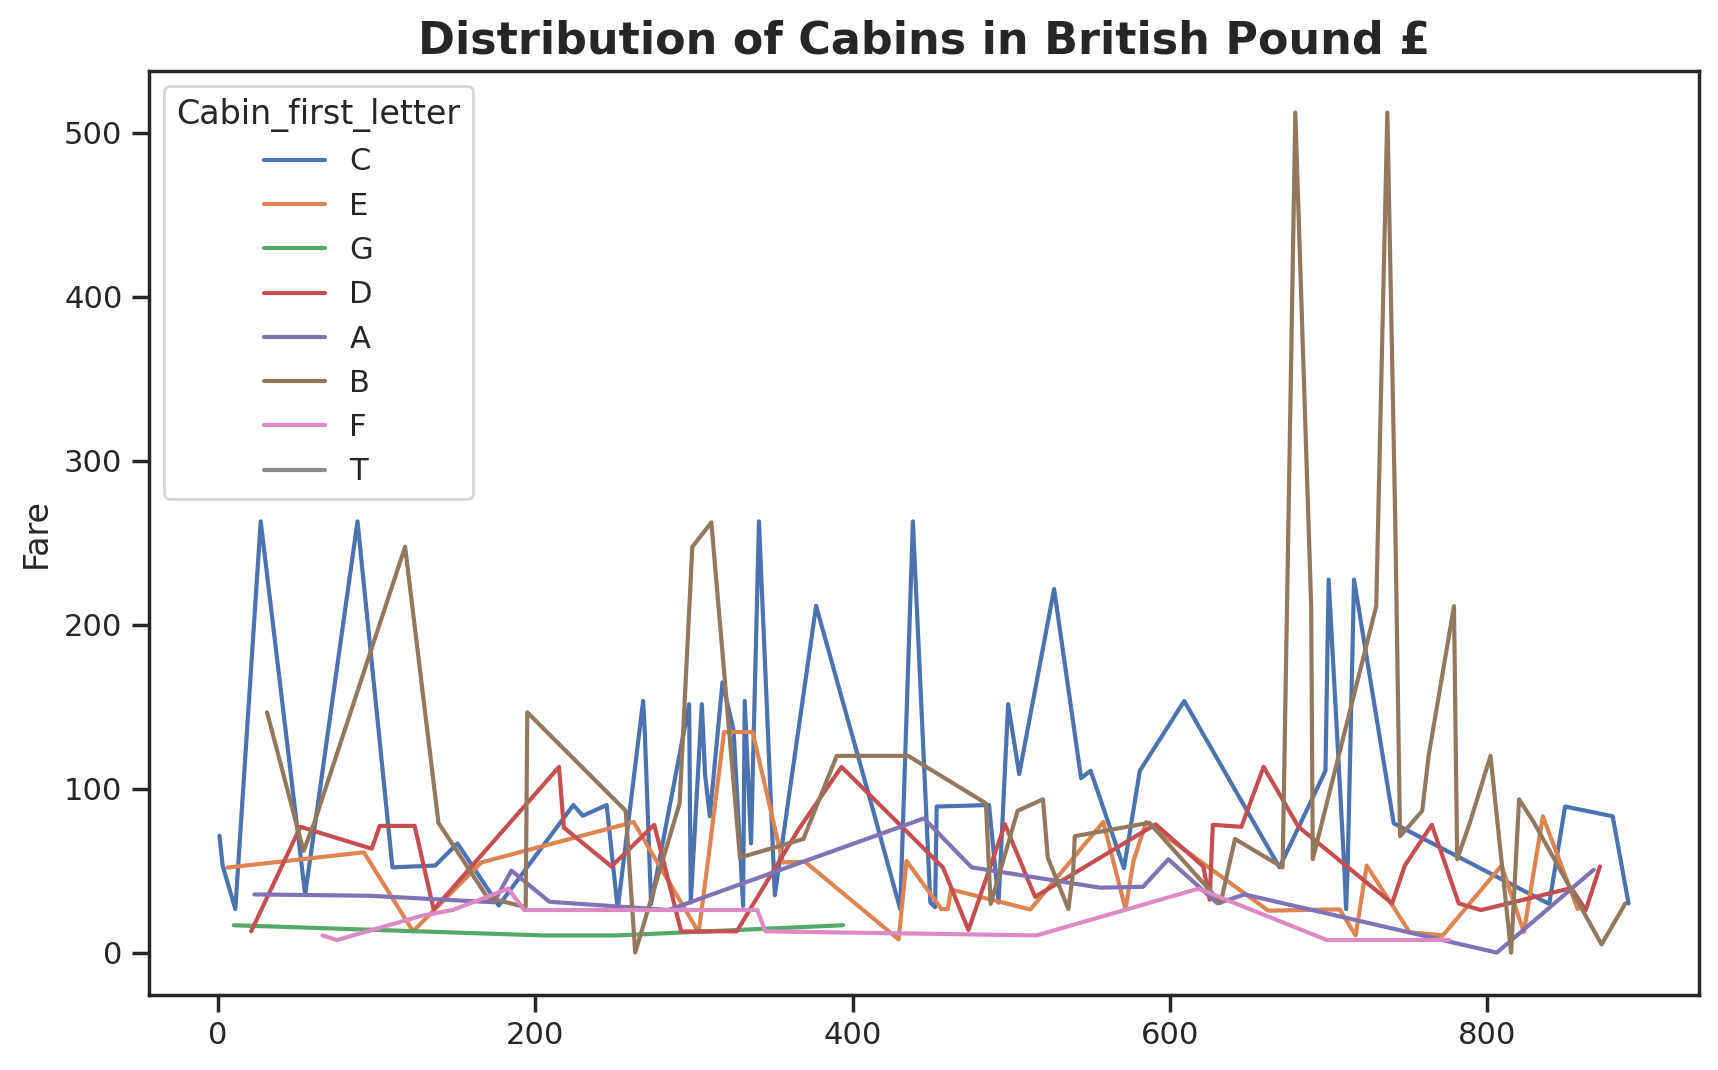

In [24]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df_train_cabin_fare, x=df_train_cabin_fare.index, y="Fare", hue='Cabin_first_letter')
ax.set_title("Distribution of Cabins in British Pound £", fontsize=16, fontweight='bold')

### Observations

- The same outliers, we can see here as well for B.

## 1.3 Finding outliers

<Figure size 2000x500 with 0 Axes>

Text(0.5, 1.0, 'Box plot of Age in training set')

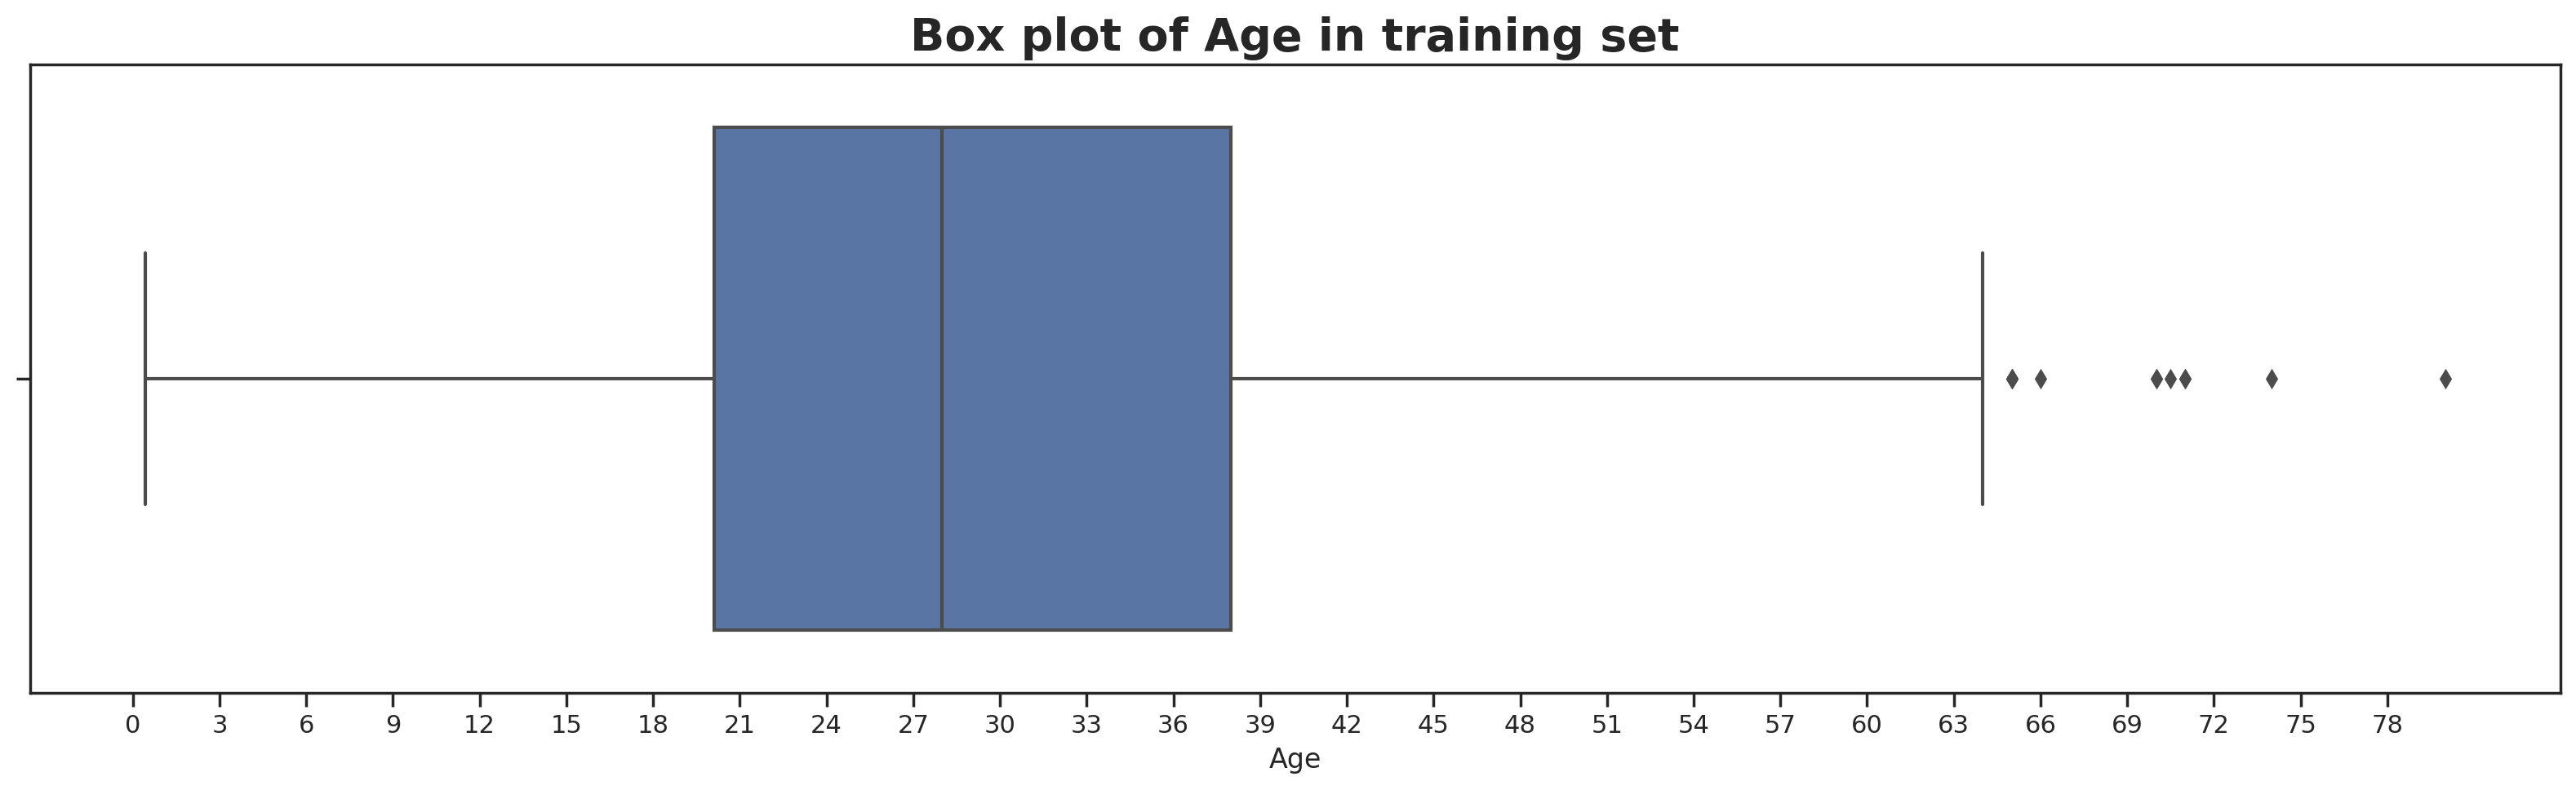

In [25]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=df_train, x='Age')
ax.set_xticks(list(range(0, int(df_train['Age'].max()), 3)))
plt.title("Box plot of Age in training set", fontsize=20, fontweight='bold')

We see outliers after 64. So lets remove them

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Training set - Histogram plot of Age')

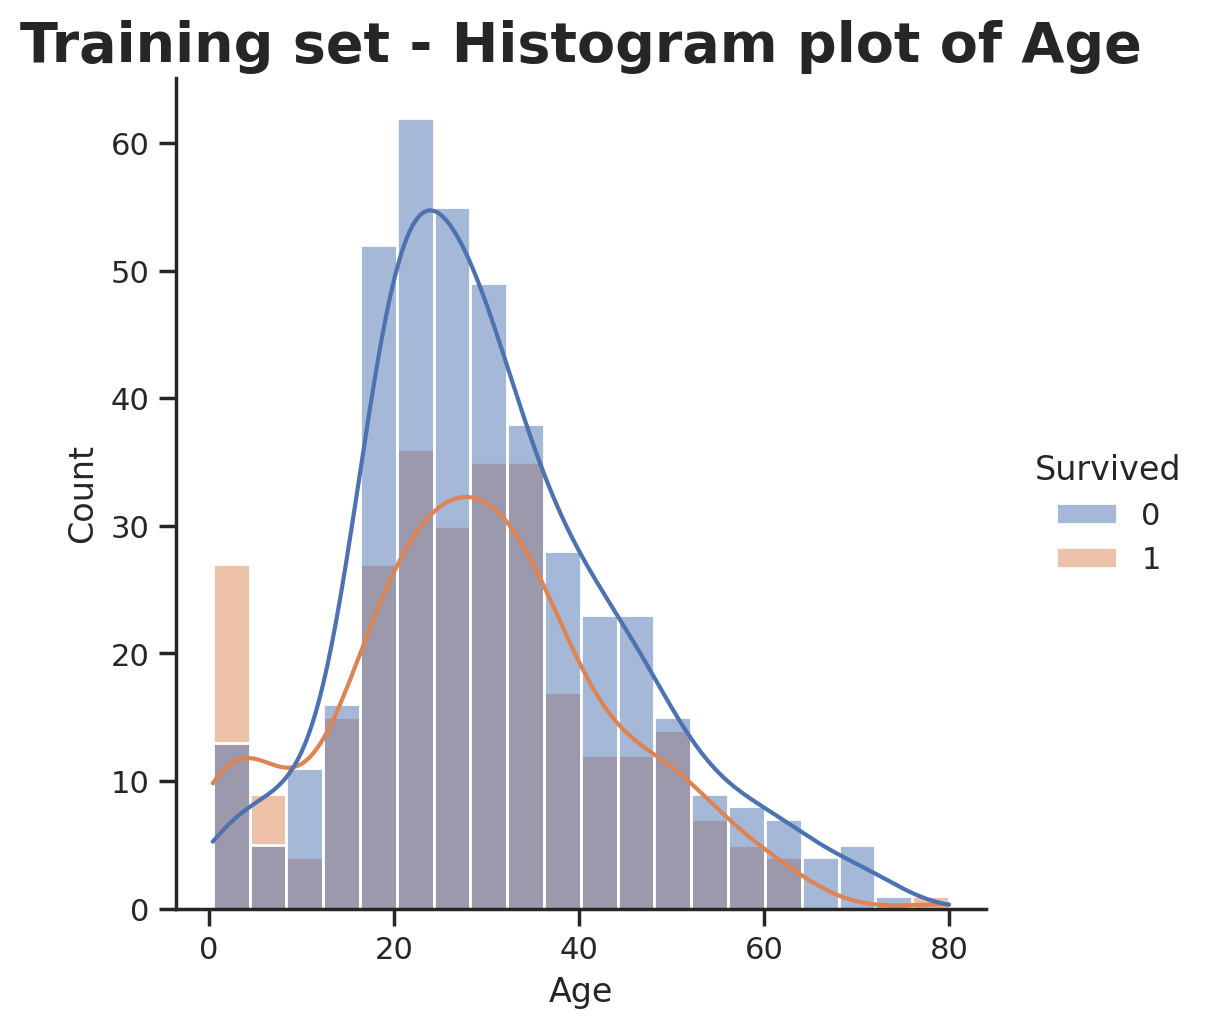

In [26]:
sns.displot(data=df_train, x='Age', kde = True, hue='Survived')
plt.title("Training set - Histogram plot of Age", fontsize=20, fontweight='bold')

<Figure size 2000x500 with 0 Axes>

Text(0.5, 1.0, 'Box plot of Age in test set')

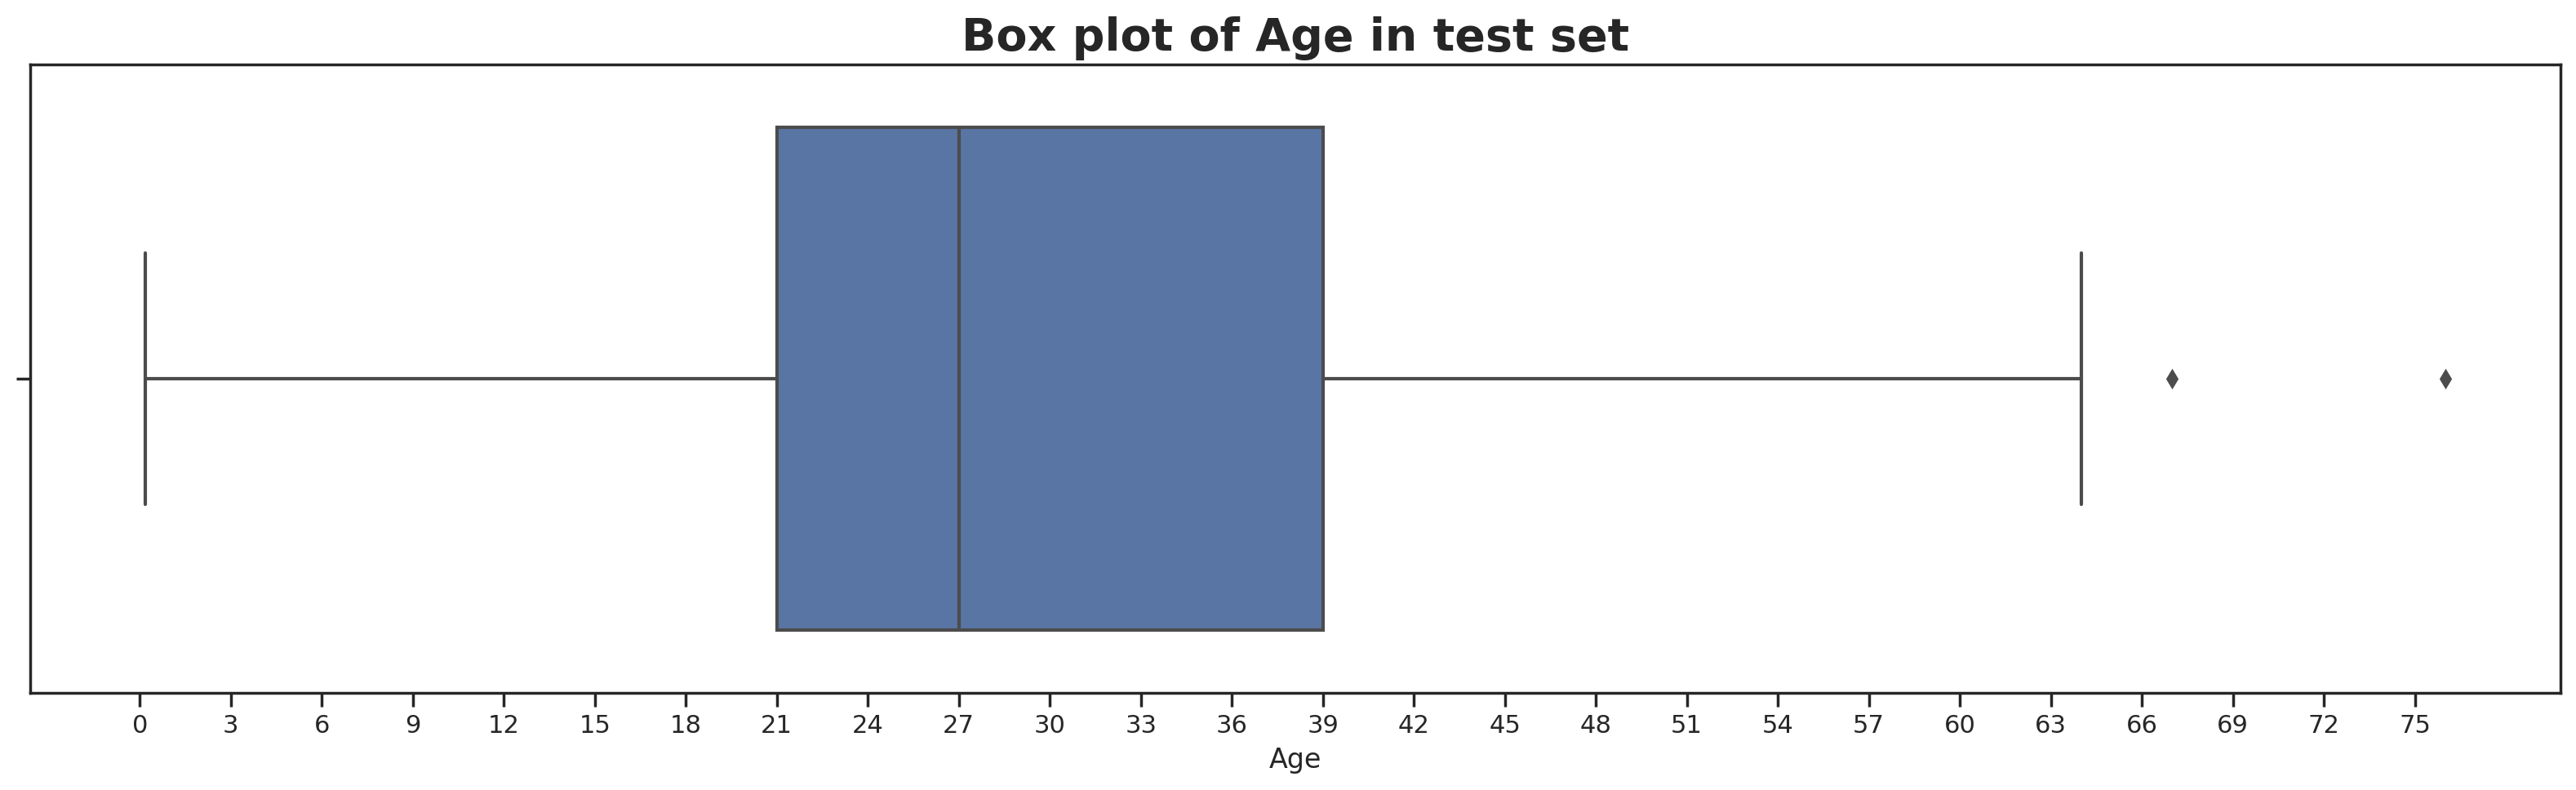

In [27]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=df_test, x='Age')
ax.set_xticks(list(range(0, int(df_test['Age'].max()), 3)))
plt.title("Box plot of Age in test set", fontsize=20, fontweight='bold')

We see outliers after 64. So lets remove them

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Test set - Histogram plot of Age')

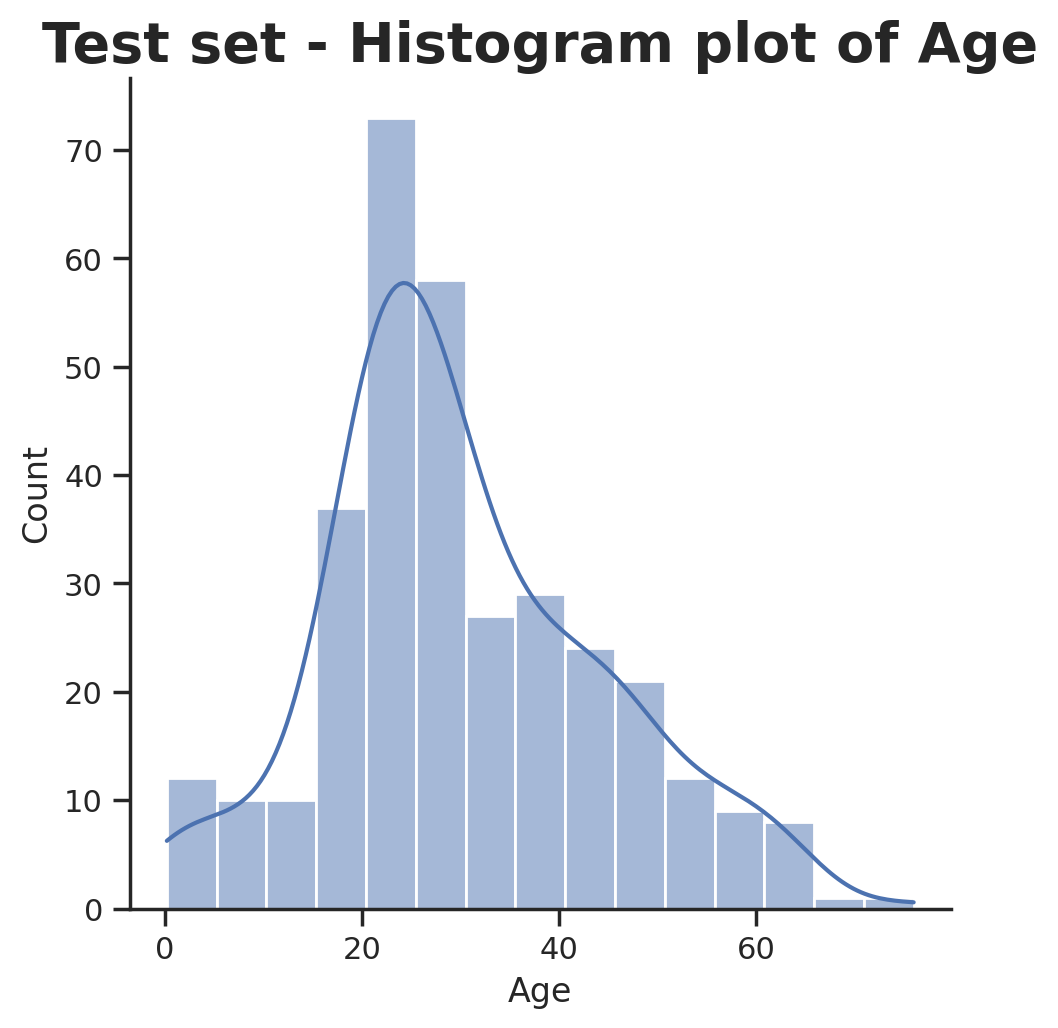

In [28]:
sns.displot(data=df_test, x='Age', kde = True)
plt.title("Test set - Histogram plot of Age", fontsize=20, fontweight='bold')

In [29]:
print("Training set mean Age without outliers ", df_train[~(df_train['Age'] >= 64)]['Age'].mean())
print("Training set mean Age with outliers ",df_train['Age'].mean())

print("Test set mean Age without outliers ", df_test[~(df_test['Age'] >= 64)]['Age'].mean())
print("Test set mean Age with outliers ",df_test['Age'].mean())

Training set mean Age without outliers  28.972425106990013
Training set mean Age with outliers  29.69911764705882
Test set mean Age without outliers  29.711009174311926
Test set mean Age with outliers  30.272590361445783


We can see that average is not much affected by outliers. So let us keep it as it is.

## 1.4 Checking the missing/null/NaNs values.

In [30]:
df_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [31]:
import missingno as msno

Text(0.5, 0, 'Column')

Text(0, 0.5, '% of non-null values')

Text(0.5, 1.0, 'Training data - Column wise % of non-null values')

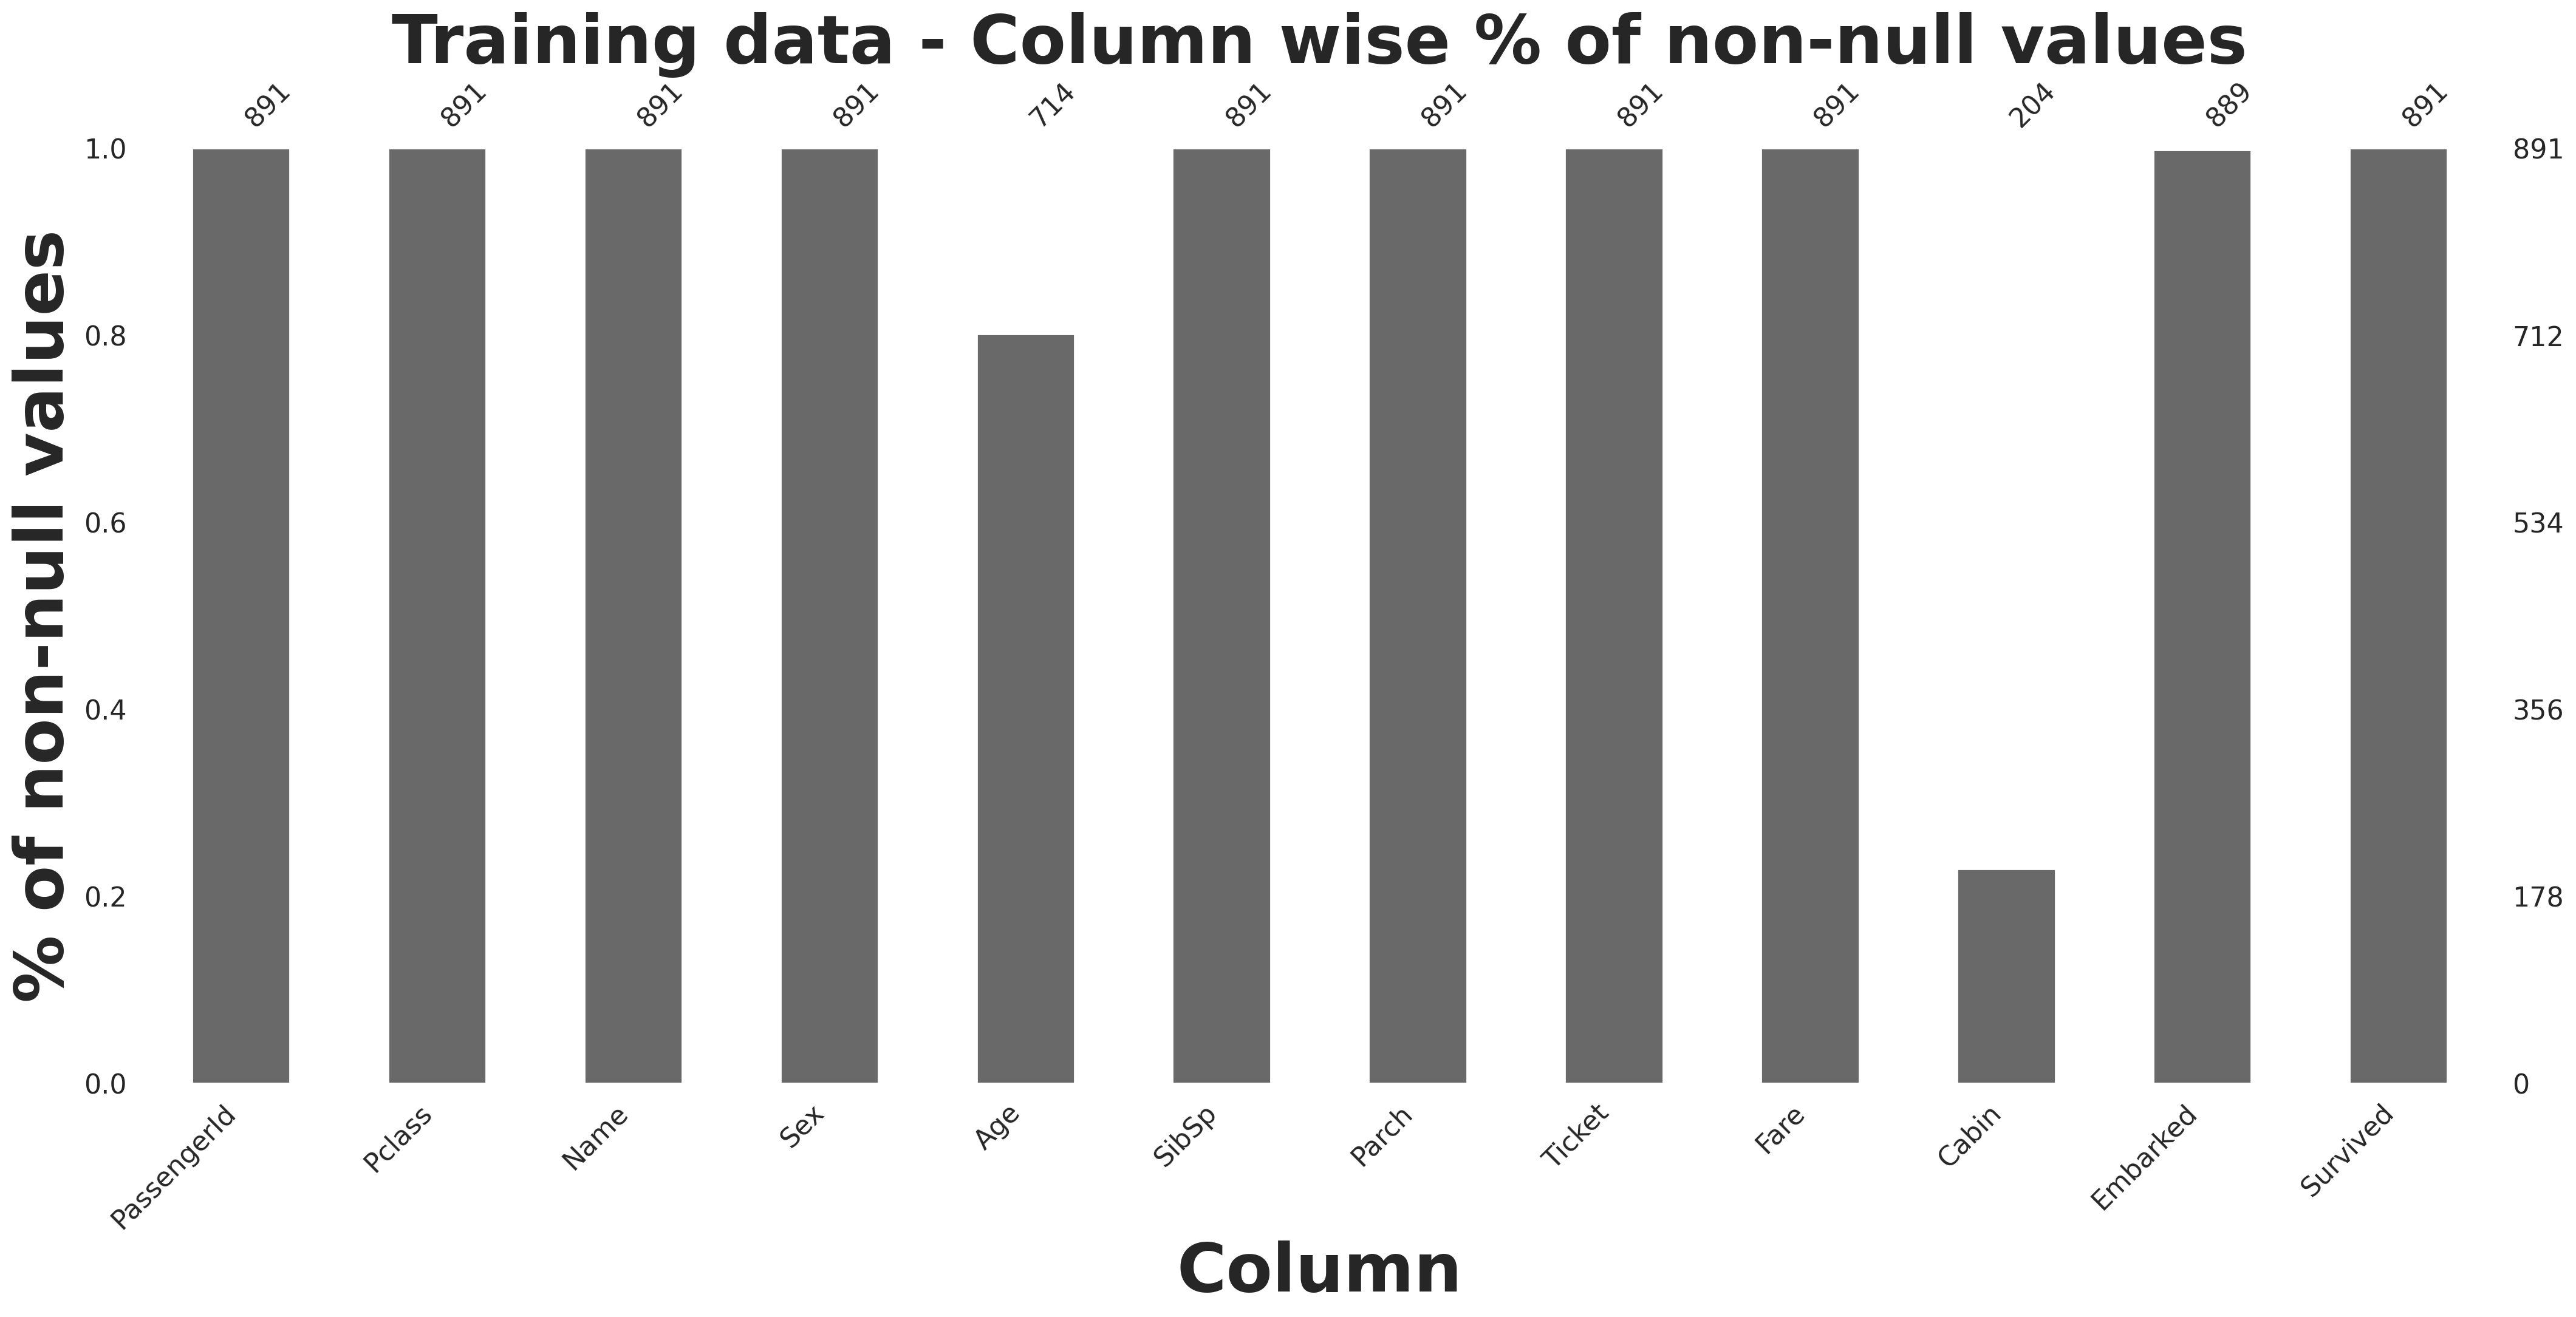

In [32]:
ax = msno.bar(df_train)
ax.set_xlabel("Column", fontsize=40, fontweight='bold')
ax.set_ylabel("% of non-null values", fontsize=40, fontweight='bold')
ax.set_title("Training data - Column wise % of non-null values", fontsize=40, fontweight='bold')

### Training data - Observations
- As suspected, **Cabin** has 687 missing values. 
- **Age** also has pretty good number of **missing values ~20%**.
    - We have to **impute** them, not drop because our dataset size is too small, we can't lose the data.

In [33]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 0, 'Column')

Text(0, 0.5, '% of non-null values')

Text(0.5, 1.0, 'Test data - Column wise % of non-null values')

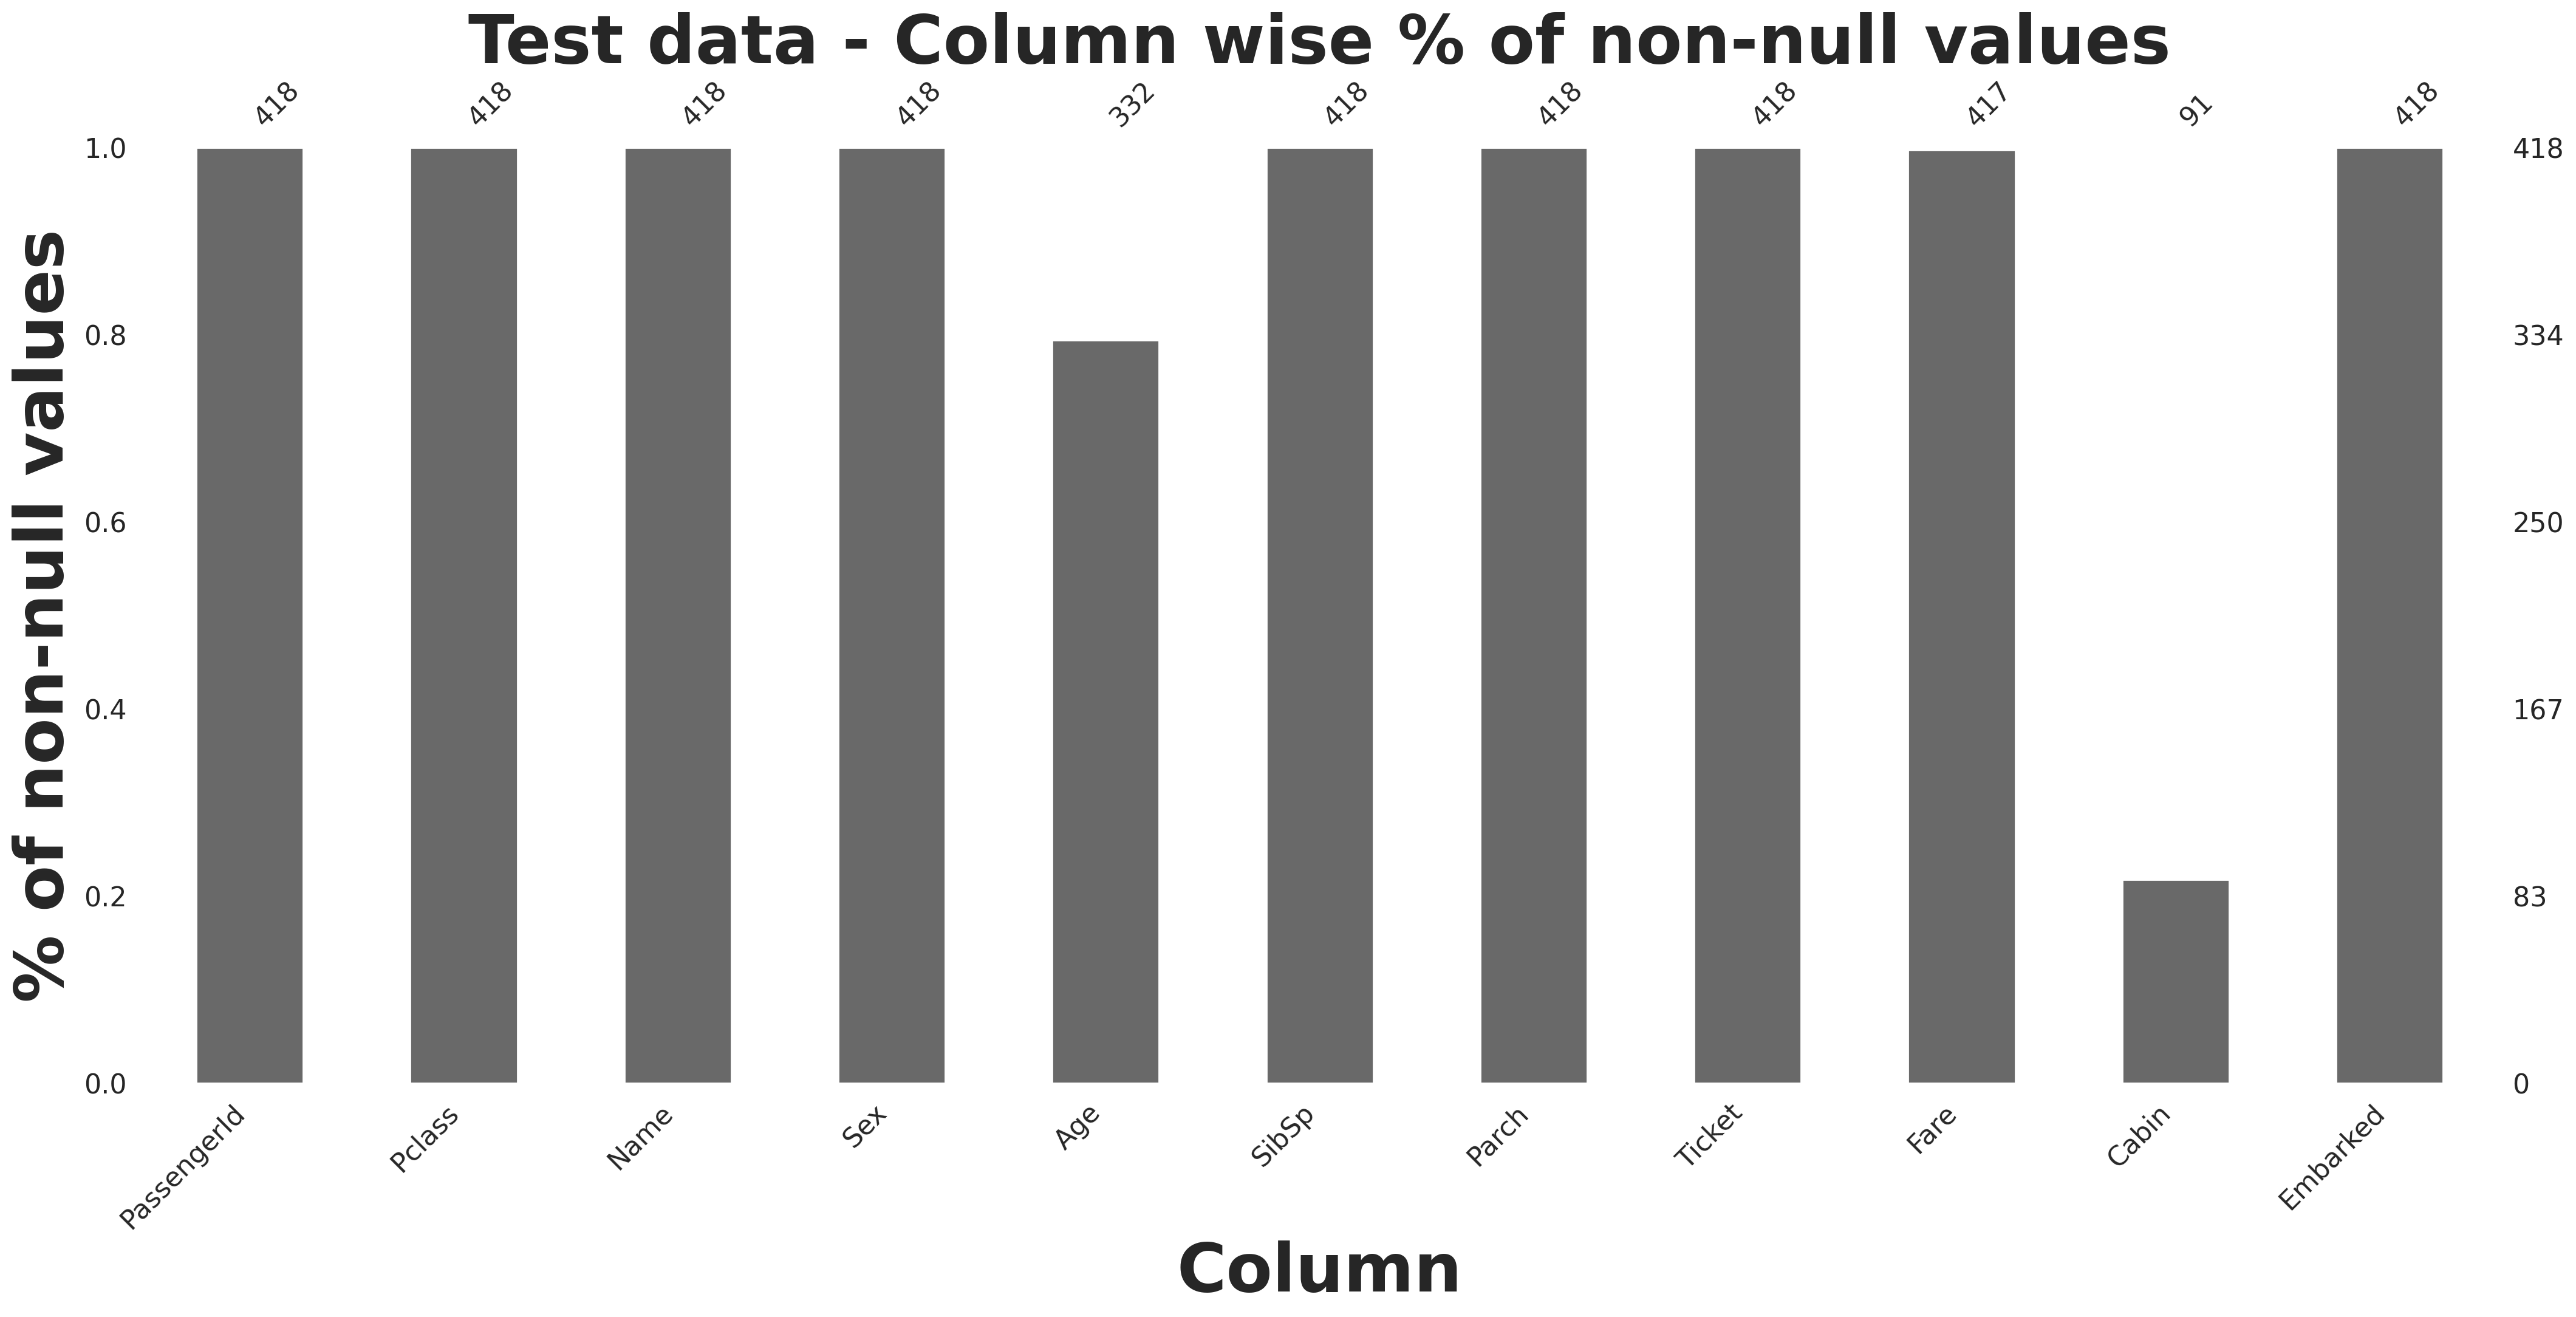

In [34]:
ax = msno.bar(df_test)
ax.set_xlabel("Column", fontsize=40, fontweight='bold')
ax.set_ylabel("% of non-null values", fontsize=40, fontweight='bold')
ax.set_title("Test data - Column wise % of non-null values", fontsize=40, fontweight='bold')

### Test data - Observations
- **Fare** has 1 missing value.
- **Cabin** has 327 missing values. 
- **Age** also has pretty good number of **missing values ~20%**.
    - We have to **impute** them, not drop because our dataset size is too small, we can't lose the data.

In [35]:
# Confirming the missing values in Age & Cabin

df_train.Age.value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

In [36]:
df_train.Cabin.value_counts(dropna=False)

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

### 1.3.1 Filling/Imputing missing values

#### Ways to fill
- **Mean, Median, or Mode Imputation:** 
    - Replace missing values with the mean, median, or mode of the non-missing values in the column.
- **Forward Fill/Backward Fill:** 
    - Use the previous or next available value to fill missing values in a time series or sequential data.
- **Interpolation:** 
    - Estimate missing values based on the relationship between other variables or time points.
- **K-Nearest Neighbors Imputation:** 
    - Replace missing values with values from the k-nearest neighbors in terms of other features.
- **Regression Imputation:** 
    - Predict missing values using regression models based on other related variables.

<Figure size 2000x500 with 0 Axes>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Age')

([<matplotlib.axis.XTick at 0x7de804dc0a00>,
 [Text(0, 0, '0'),
  Text(50, 0, '50'),
  Text(100, 0, '100'),
  Text(150, 0, '150'),
  Text(200, 0, '200'),
  Text(250, 0, '250'),
  Text(300, 0, '300'),
  Text(350, 0, '350'),
  Text(400, 0, '400'),
  Text(450, 0, '450'),
  Text(500, 0, '500'),
  Text(550, 0, '550'),
  Text(600, 0, '600'),
  Text(650, 0, '650'),
  Text(700, 0, '700'),
  Text(750, 0, '750')])

Text(0.5, 1.0, 'Training set - Line plot of Age (with missing values)')

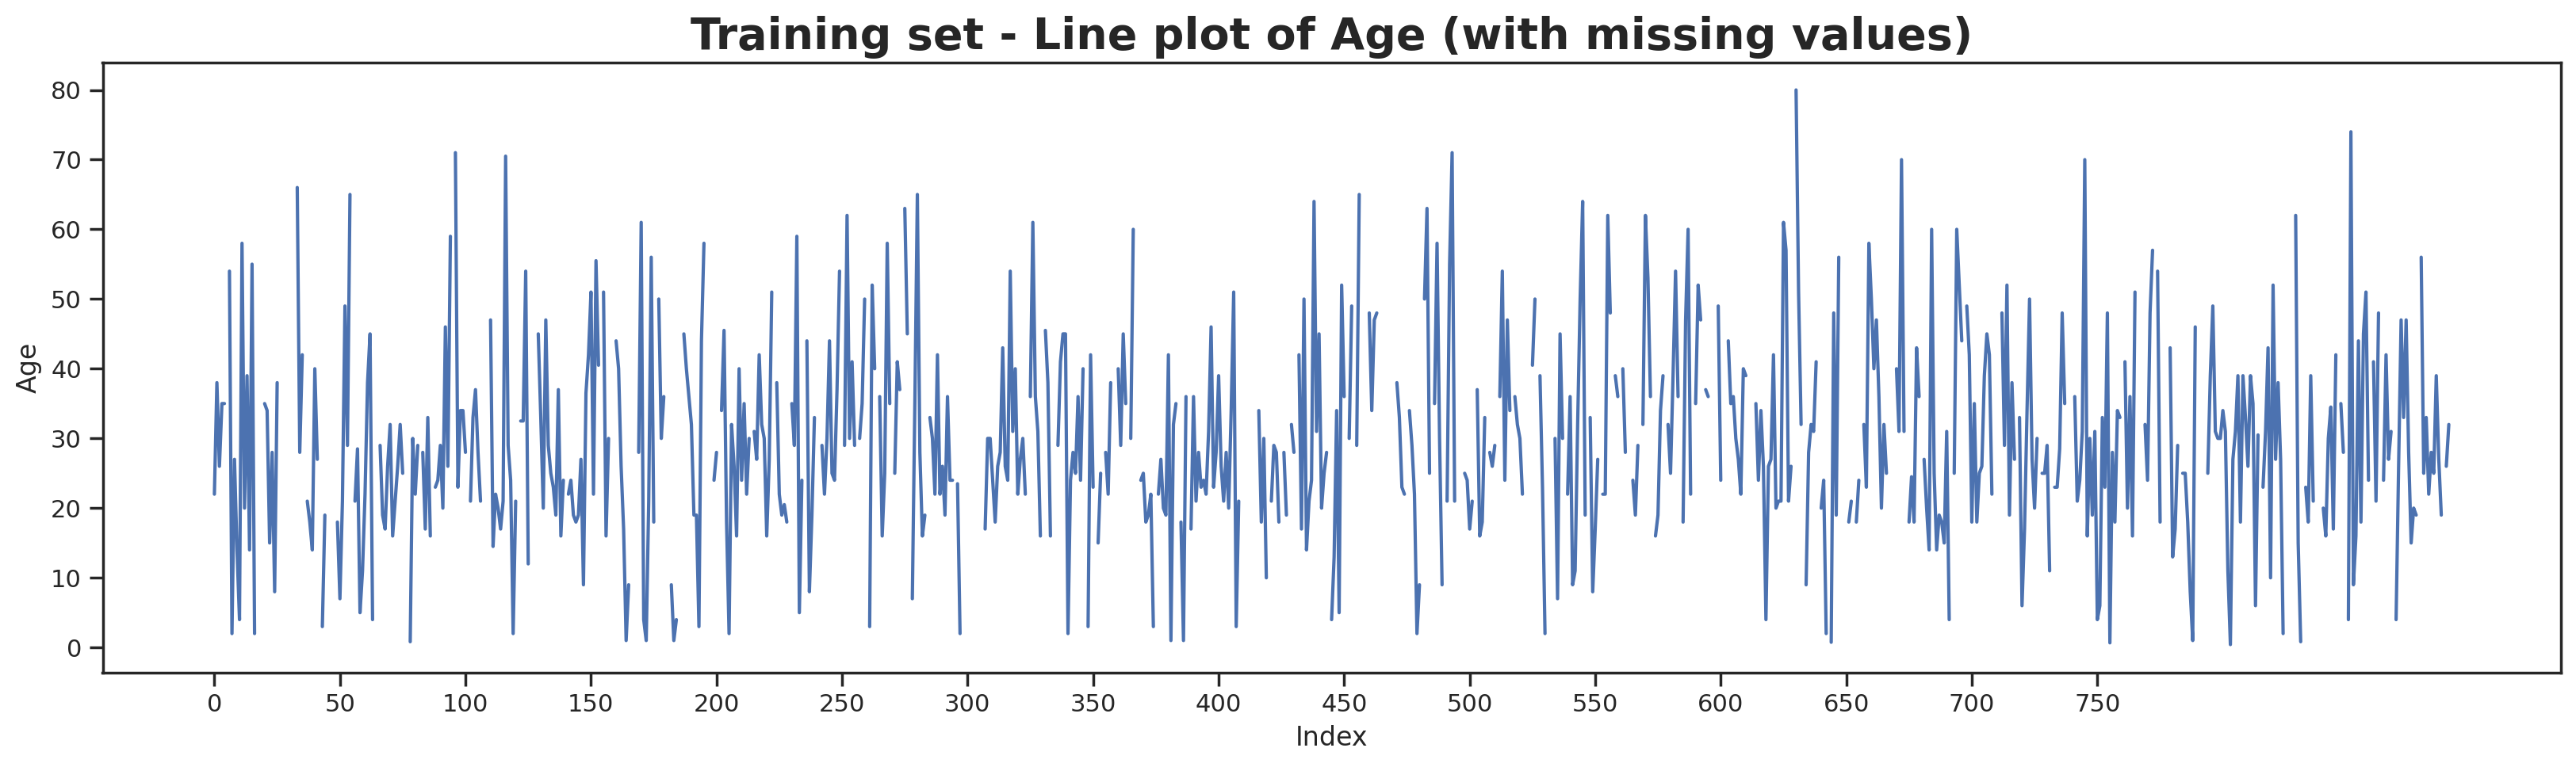

In [37]:
plt.figure(figsize=(20,5))
plt.plot(df_train['Age'], '-')
plt.xlabel("Index")
plt.ylabel("Age")
plt.xticks(list(range(0, 800, 50)))
plt.title("Training set - Line plot of Age (with missing values)", fontweight='bold',fontsize=20)

- We can see some gaps in between at 50, 180, 360 etc
- To see the missing values clearly, we can pump up the gap by imputing the highest value

In [38]:
df_train[df_train['Age'].isna()]

PassengerId  Pclass                                      Name     Sex  \
5              6       3                          Moran, Mr. James    male   
17            18       2              Williams, Mr. Charles Eugene    male   
19            20       3                   Masselmani, Mrs. Fatima  female   
26            27       3                   Emir, Mr. Farred Chehab    male   
28            29       3             O'Dwyer, Miss. Ellen "Nellie"  female   
..           ...     ...                                       ...     ...   
859          860       3                          Razi, Mr. Raihed    male   
863          864       3         Sage, Miss. Dorothy Edith "Dolly"  female   
868          869       3               van Melkebeke, Mr. Philemon    male   
878          879       3                        Laleff, Mr. Kristo    male   
888          889       3  Johnston, Miss. Catherine Helen "Carrie"  female   

     Age  SibSp  Parch      Ticket     Fare Cabin Embarked  Survived  
5    NaN      0      0      330877   8.4583   NaN        Q         0  
17   NaN      0      0      244373  13.0000   NaN        S         1  
19   NaN      0      0        2649   7.2250   NaN        C         1  
26   NaN      0      0        2631   7.2250   NaN        C         0  
28   NaN      0      0      330959   7.8792   NaN        Q         1  
..   ...    ...    ...         ...      ...   ...      ...       ...  
859  NaN      0      0        2629   7.2292   NaN        C         0  
863  NaN      8      2    CA. 2343  69.5500   NaN        S         0  
868  NaN      0      0      345777   9.5000   NaN        S         0  
878  NaN      0      0      349217   7.8958   NaN        S         0  
888  NaN      1      2  W./C. 6607  23.4500   NaN        S         0  

[177 rows x 12 columns]

<Figure size 2000x500 with 0 Axes>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Age')

Text(0.5, 1.0, 'Training set - Line plot of Age (with missing values)')

Text(10, 80, 'Average age is 30')

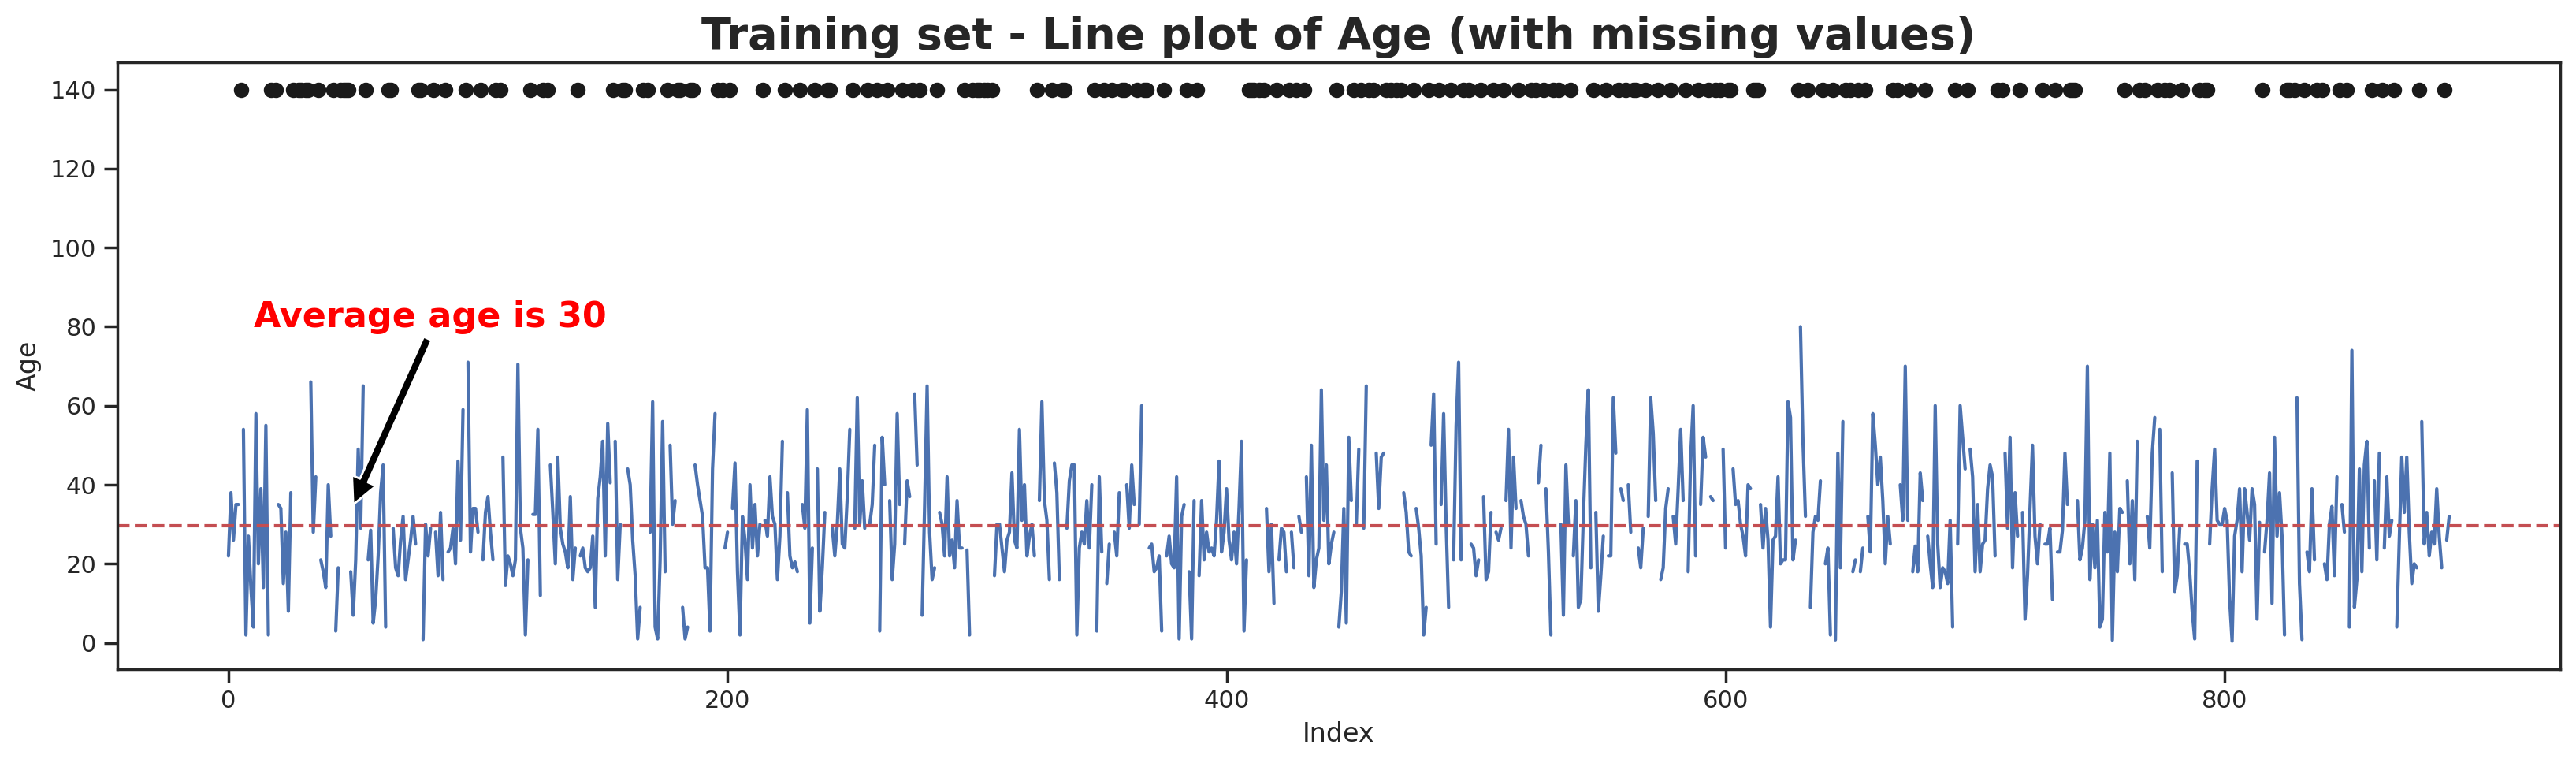

In [39]:
plt.figure(figsize=(20,5))
plt.plot(df_train['Age'])
plt.plot(df_train[df_train['Age'].isna()]['Age'].fillna(140), 'ko')
plt.xlabel("Index")
plt.ylabel("Age")
plt.title("Training set - Line plot of Age (with missing values)", fontweight='bold',fontsize=20)
plt.axhline(y = df_train['Age'].mean(), color = 'r', linestyle = '--')
plt.annotate('Average age is ' + str(round(df_train['Age'].mean())),
              xy = (50,35), 
              xytext =(10,80), 
              color='red',
              fontweight='bold',
              fontsize = 16,
              arrowprops = dict(facecolor = 'black'))

- We can see the missing values (all points at y = 140) are spread across X-axis.
- The average age is around 30

<Figure size 2000x500 with 0 Axes>

Text(0.5, 0, 'Index')

Text(0, 0.5, 'Age')

Text(0.5, 1.0, 'Test set - Line plot of Age (with missing values)')

Text(10, 80, 'Average age is 30')

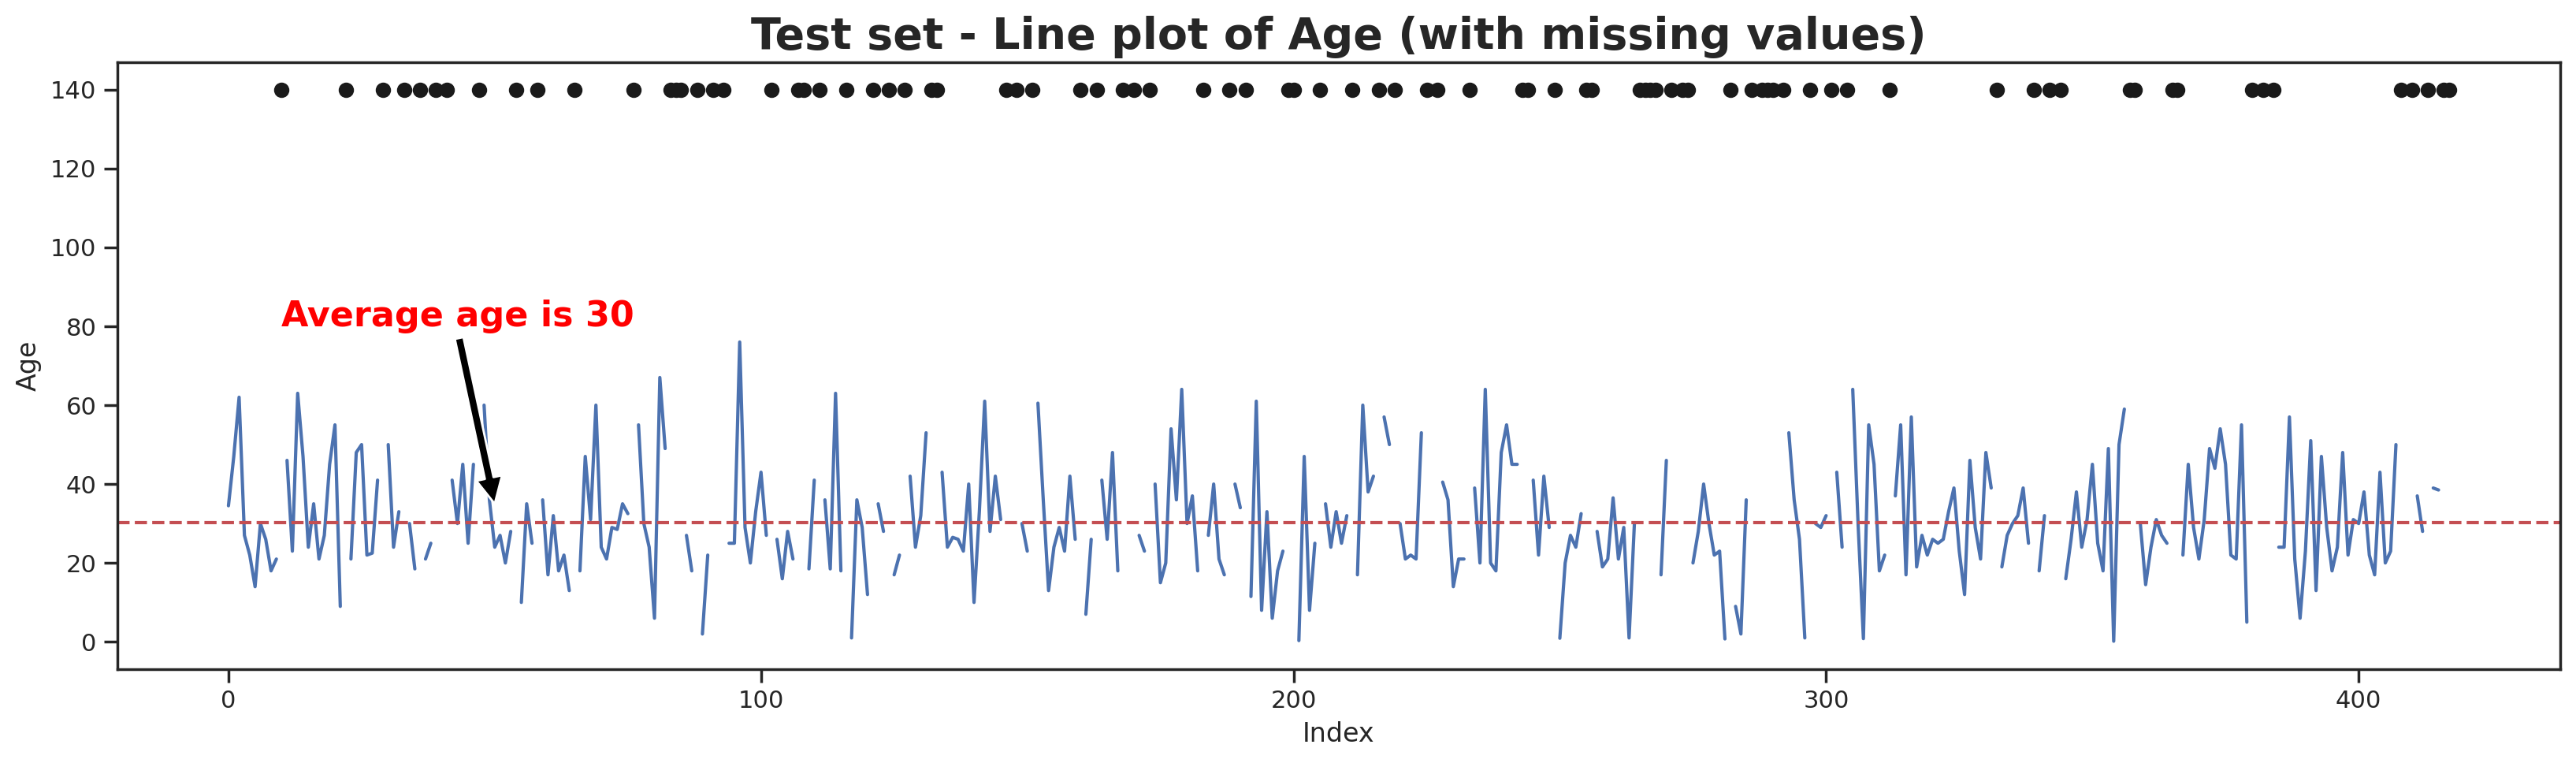

In [40]:
plt.figure(figsize=(20,5))
plt.plot(df_test['Age'])
plt.plot(df_test[df_test['Age'].isna()]['Age'].fillna(140), 'ko')
plt.xlabel("Index")
plt.ylabel("Age")
plt.title("Test set - Line plot of Age (with missing values)", fontweight='bold',fontsize=20)
plt.axhline(y = df_test['Age'].mean(), color = 'r', linestyle = '--')
plt.annotate('Average age is ' + str(round(df_test['Age'].mean())),
              xy = (50,35), 
              xytext =(10,80), 
              color='red',
              fontweight='bold',
              fontsize = 16,
              arrowprops = dict(facecolor = 'black'))

Same thing can be done with Seaborn regression plot

<Figure size 2000x500 with 0 Axes>

<Axes: ylabel='Age'>

Text(0.5, 1.0, 'Training set - Regression plot of Age (with missing values)')

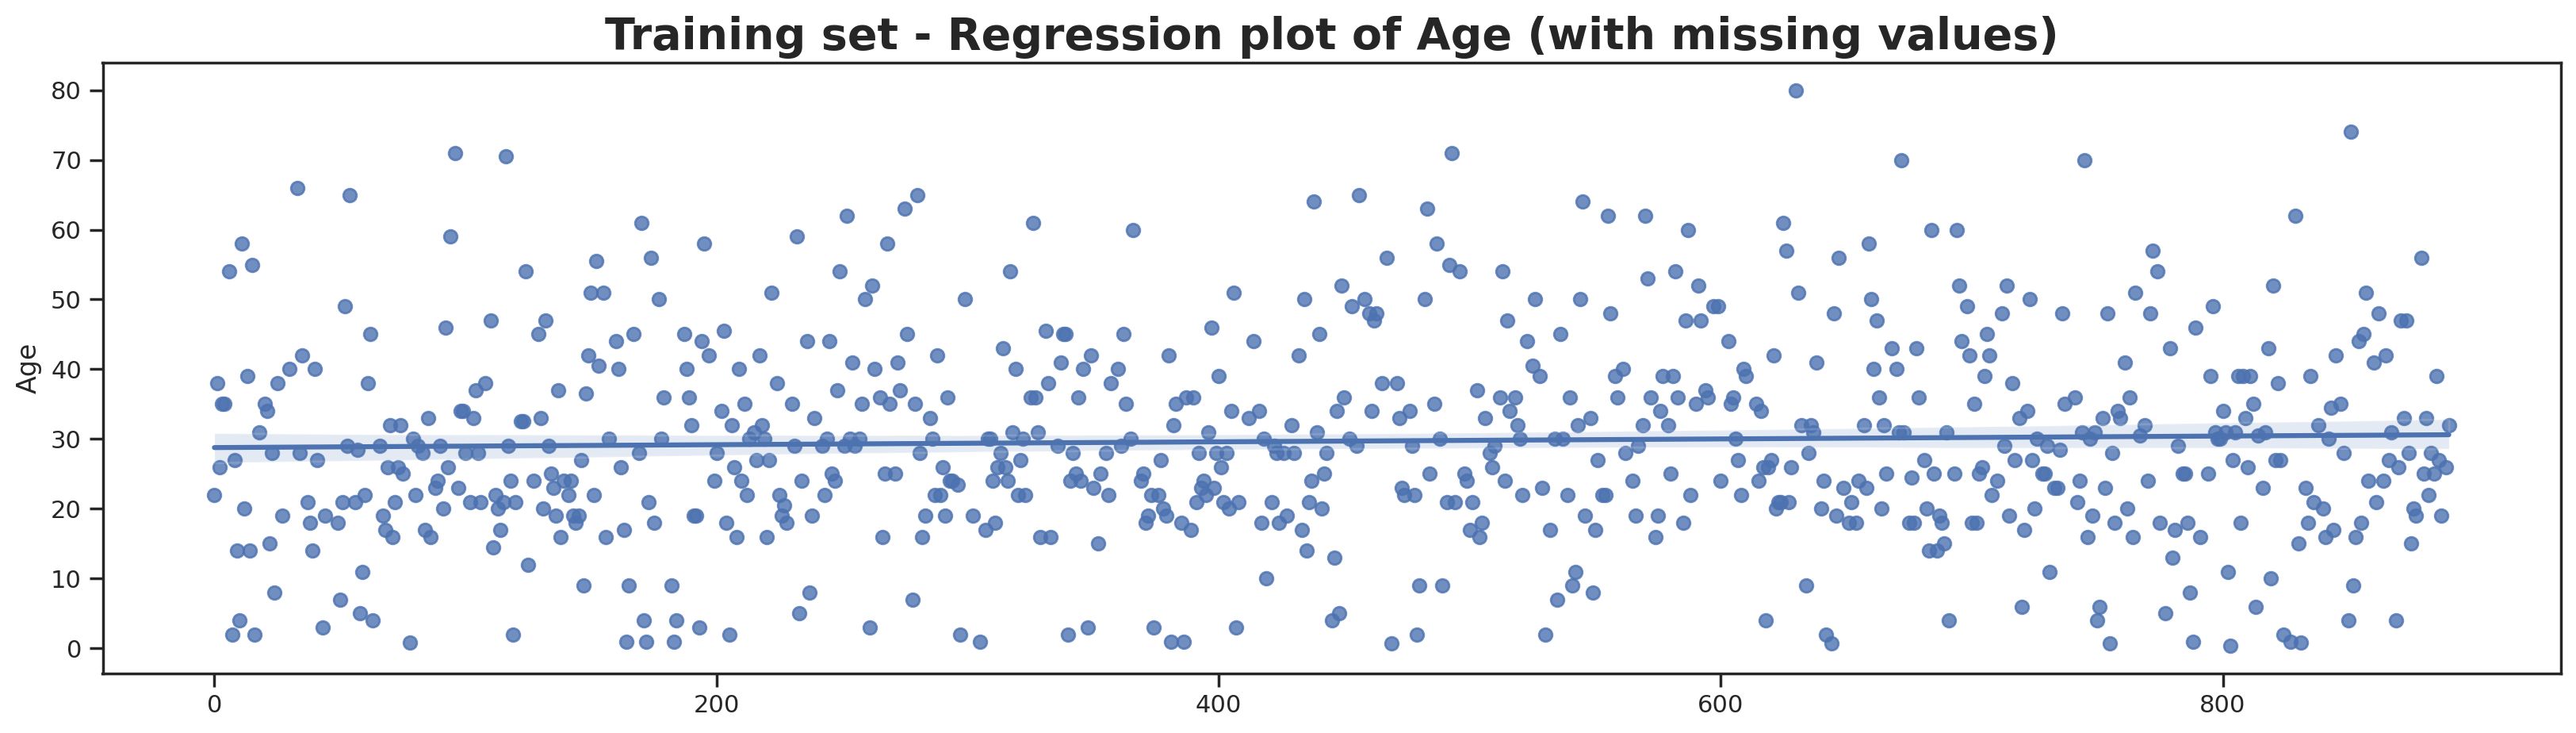

In [41]:
# Plot regression

plt.figure(figsize=(20,5))
sns.regplot(data = df_train, x = df_train.index, y ='Age')
plt.title("Training set - Regression plot of Age (with missing values)", fontweight='bold',fontsize=20)

We find the mean to be around 30

<Figure size 2000x500 with 0 Axes>

<Axes: ylabel='Age'>

Text(0.5, 1.0, 'Test set - Regression plot of Age (with missing values)')

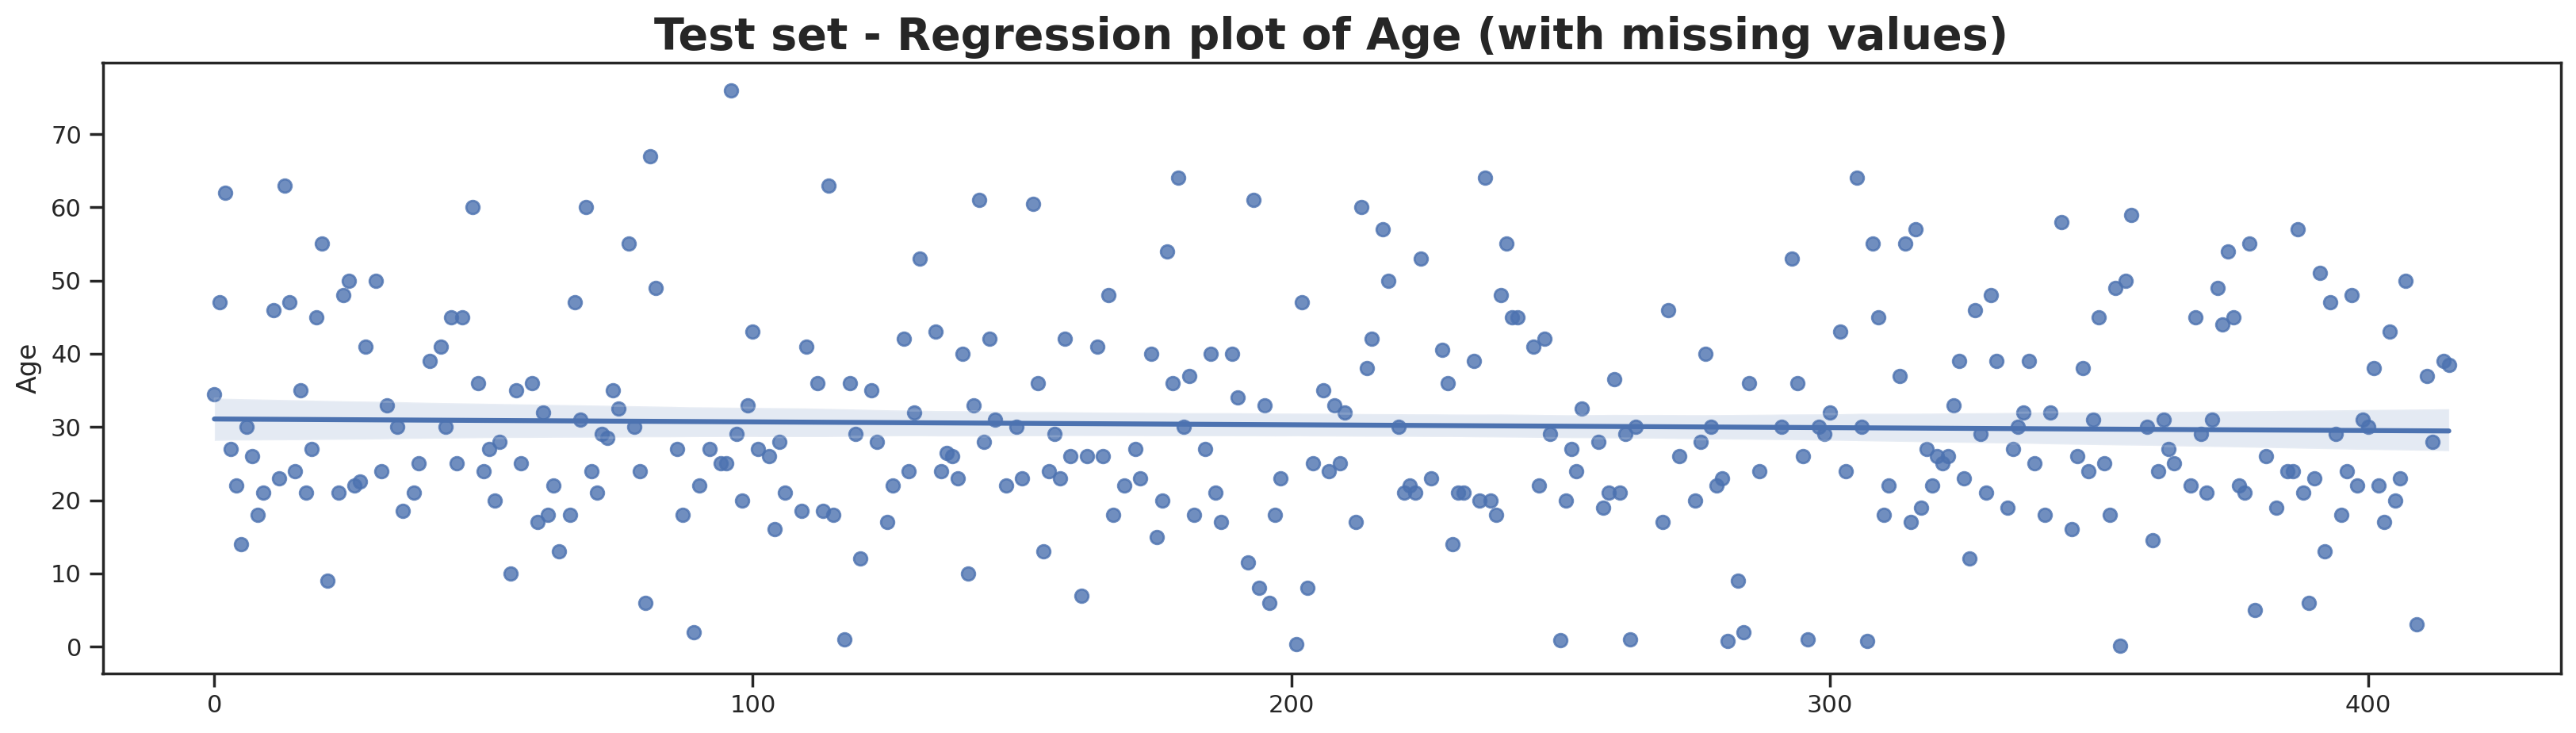

In [42]:
# Plot regression

plt.figure(figsize=(20,5))
sns.regplot(data = df_test, x = df_test.index, y ='Age')
plt.title("Test set - Regression plot of Age (with missing values)", fontweight='bold',fontsize=20)

/tmp/ipykernel_20/3454363493.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(),annot=True, cmap="Blues")


<Axes: >

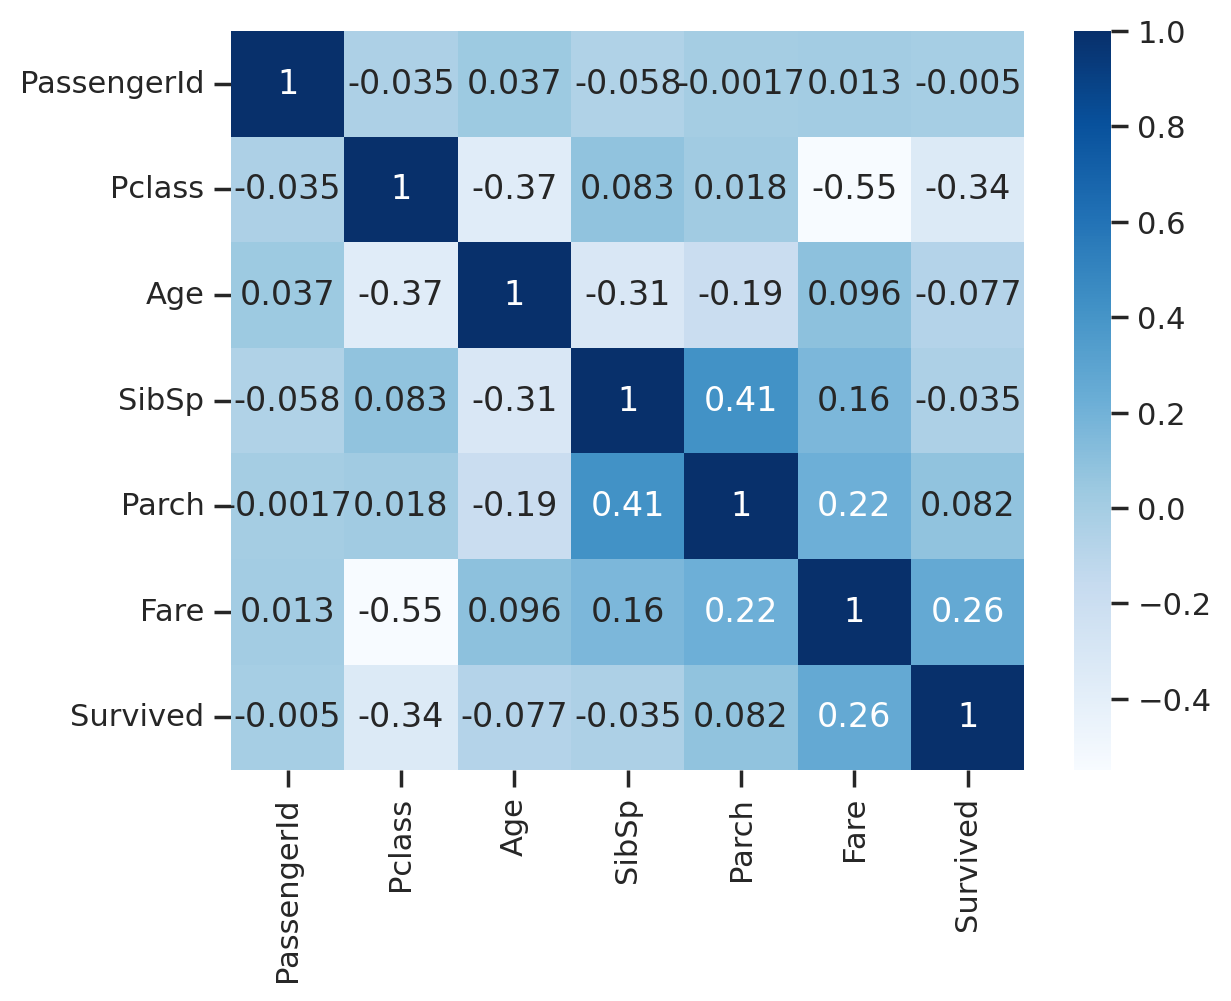

In [43]:
# Checking KNN imputation, if Age is highly correlated with any other feature, we can take help of that feature and impute Age

sns.heatmap(df_train.corr(),annot=True, cmap="Blues")

We don't see any correlation of Age with other features, so we cannot do kNN imputaion

#### Method to fill the missing values
- We can't do forward fill or backward fill because this is not a time series and we can't trust this method. If the data is shuffled, our imputed values also might change.
- We will go with **mean/regression fit.**



In [44]:
# before imputation
df_train['Age'].mean()
df_test['Age'].mean()

29.69911764705882

30.272590361445783

In [45]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [46]:
# after imputation

df_train['Age'].mean()
df_test['Age'].mean()

29.69911764705882

30.272590361445783

In [47]:
df_train.isna().sum()
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Removing Embarked missing values in Training set

In [48]:
df_train = df_train[~(df_train['Embarked'].isna())]

Removing Name, Ticket, PassengerId

In [49]:
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

/tmp/ipykernel_20/3980615627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['Cabin'], inplace=True)


In [50]:
df_train.drop(columns=['Name', 'Ticket'], inplace=True)
df_test.drop(columns=['Name', 'Ticket'], inplace=True)

/tmp/ipykernel_20/3331631664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['Name', 'Ticket'], inplace=True)


In [51]:
df_train.drop(columns=['PassengerId'], inplace=True)
df_test.drop(columns=['PassengerId'], inplace=True)

/tmp/ipykernel_20/4152407157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['PassengerId'], inplace=True)


In [52]:
df_train.isna().sum()
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

- Now we don't have any missing values in training & testing sets (have 1, but we can't remove it, because while submission, it does not accept removing any rows)
- So, fill the 1 missing value in Fare instead of removing it.

In [53]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [54]:
df_train.isna().sum()
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

- Now we don't have any missing values in training & testing sets

In [55]:
df_train
df_test

Pclass     Sex        Age  SibSp  Parch     Fare Embarked  Survived
0         3    male  22.000000      1      0   7.2500        S         0
1         1  female  38.000000      1      0  71.2833        C         1
2         3  female  26.000000      0      0   7.9250        S         1
3         1  female  35.000000      1      0  53.1000        S         1
4         3    male  35.000000      0      0   8.0500        S         0
..      ...     ...        ...    ...    ...      ...      ...       ...
886       2    male  27.000000      0      0  13.0000        S         0
887       1  female  19.000000      0      0  30.0000        S         1
888       3  female  29.699118      1      2  23.4500        S         0
889       1    male  26.000000      0      0  30.0000        C         1
890       3    male  32.000000      0      0   7.7500        Q         0

[889 rows x 8 columns]

Pclass     Sex       Age  SibSp  Parch      Fare Embarked
0         3    male  34.50000      0      0    7.8292        Q
1         3  female  47.00000      1      0    7.0000        S
2         2    male  62.00000      0      0    9.6875        Q
3         3    male  27.00000      0      0    8.6625        S
4         3  female  22.00000      1      1   12.2875        S
..      ...     ...       ...    ...    ...       ...      ...
413       3    male  30.27259      0      0    8.0500        S
414       1  female  39.00000      0      0  108.9000        C
415       3    male  38.50000      0      0    7.2500        S
416       3    male  30.27259      0      0    8.0500        S
417       3    male  30.27259      1      1   22.3583        C

[418 rows x 7 columns]

## 1.5 Checking duplicate values.

In [56]:
df_train[df_train.duplicated()]

Pclass     Sex        Age  SibSp  Parch     Fare Embarked  Survived
47        3  female  29.699118      0      0   7.7500        Q         1
76        3    male  29.699118      0      0   7.8958        S         0
77        3    male  29.699118      0      0   8.0500        S         0
87        3    male  29.699118      0      0   8.0500        S         0
95        3    male  29.699118      0      0   8.0500        S         0
..      ...     ...        ...    ...    ...      ...      ...       ...
870       3    male  26.000000      0      0   7.8958        S         0
877       3    male  19.000000      0      0   7.8958        S         0
878       3    male  29.699118      0      0   7.8958        S         0
884       3    male  25.000000      0      0   7.0500        S         0
886       2    male  27.000000      0      0  13.0000        S         0

[111 rows x 8 columns]

### Observations
- We find duplicate values because we have filled NaNs with the mean.

In [57]:
df_test[df_test.duplicated()]

Pclass     Sex       Age  SibSp  Parch     Fare Embarked
79        3  female  24.00000      0      0   7.7500        Q
83        3    male  30.27259      0      0   7.8958        S
93        3    male  30.27259      0      0   8.0500        S
102       3    male  30.27259      0      0   7.7500        Q
107       3    male  30.27259      0      0   7.7500        Q
124       3    male  30.27259      0      0   7.7500        Q
148       1    male  30.27259      0      0  26.5500        S
158       1    male  42.00000      0      0  26.5500        S
180       2    male  30.00000      0      0  13.0000        S
183       3    male  30.27259      0      0   7.7500        Q
219       3    male  30.27259      0      0   8.0500        S
227       3  female  30.27259      0      0   7.7500        Q
248       2  female  29.00000      1      0  26.0000        S
255       3    male  30.27259      0      0   7.5500        S
256       3    male  30.27259      0      0   7.7500        Q
265       3    male  30.27259      0      0   7.8958        S
267       3    male  30.27259      0      0   7.5500        S
268       3  female  30.27259      0      0   8.0500        S
271       3    male  30.27259      0      0   7.7500        Q
282       3  female  30.27259      0      0   7.7500        Q
288       3    male  30.27259      0      0   7.2292        C
289       3    male  30.27259      0      0   8.0500        S
292       3    male  30.27259      0      0   7.2292        C
297       3    male  30.27259      2      0  21.6792        C
304       3  female  30.27259      0      0   7.7500        Q
320       3    male  26.00000      0      0   7.7750        S
322       2    male  26.00000      0      0  13.0000        S
332       3    male  30.27259      0      0   7.2250        C
339       3    male  30.27259      0      0   7.2292        C
346       2    male  26.00000      0      0  13.0000        S
351       2    male  25.00000      0      0  10.5000        S
358       3    male  30.27259      0      0   7.7500        Q
362       2  female  31.00000      0      0  21.0000        S
363       3    male  27.00000      0      0   8.6625        S
380       3    male  30.27259      0      0   7.7500        Q
410       3  female  30.27259      0      0   7.7500        Q
413       3    male  30.27259      0      0   8.0500        S
416       3    male  30.27259      0      0   8.0500        S

## 1.6 Univariate Analysis

#### 1.6.0 # of unique values in each column

In [58]:
column_unique_train = dict()
for i in df_train.columns:
    column_unique_train[i] = df_train[i].nunique()
column_unique_train = pd.Series(column_unique_train)
column_unique_train

Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        247
Embarked      3
Survived      2
dtype: int64

Text(0.5, 1.0, 'Training set - No. of unique values - column wise')

Text(0.5, 0, 'Column')

Text(0, 0.5, 'Count')

Text(0, 5, '3')

Text(0, 5, '2')

Text(0, 5, '89')

Text(0, 5, '7')

Text(0, 5, '7')

Text(0, 5, '247')

Text(0, 5, '3')

Text(0, 5, '2')

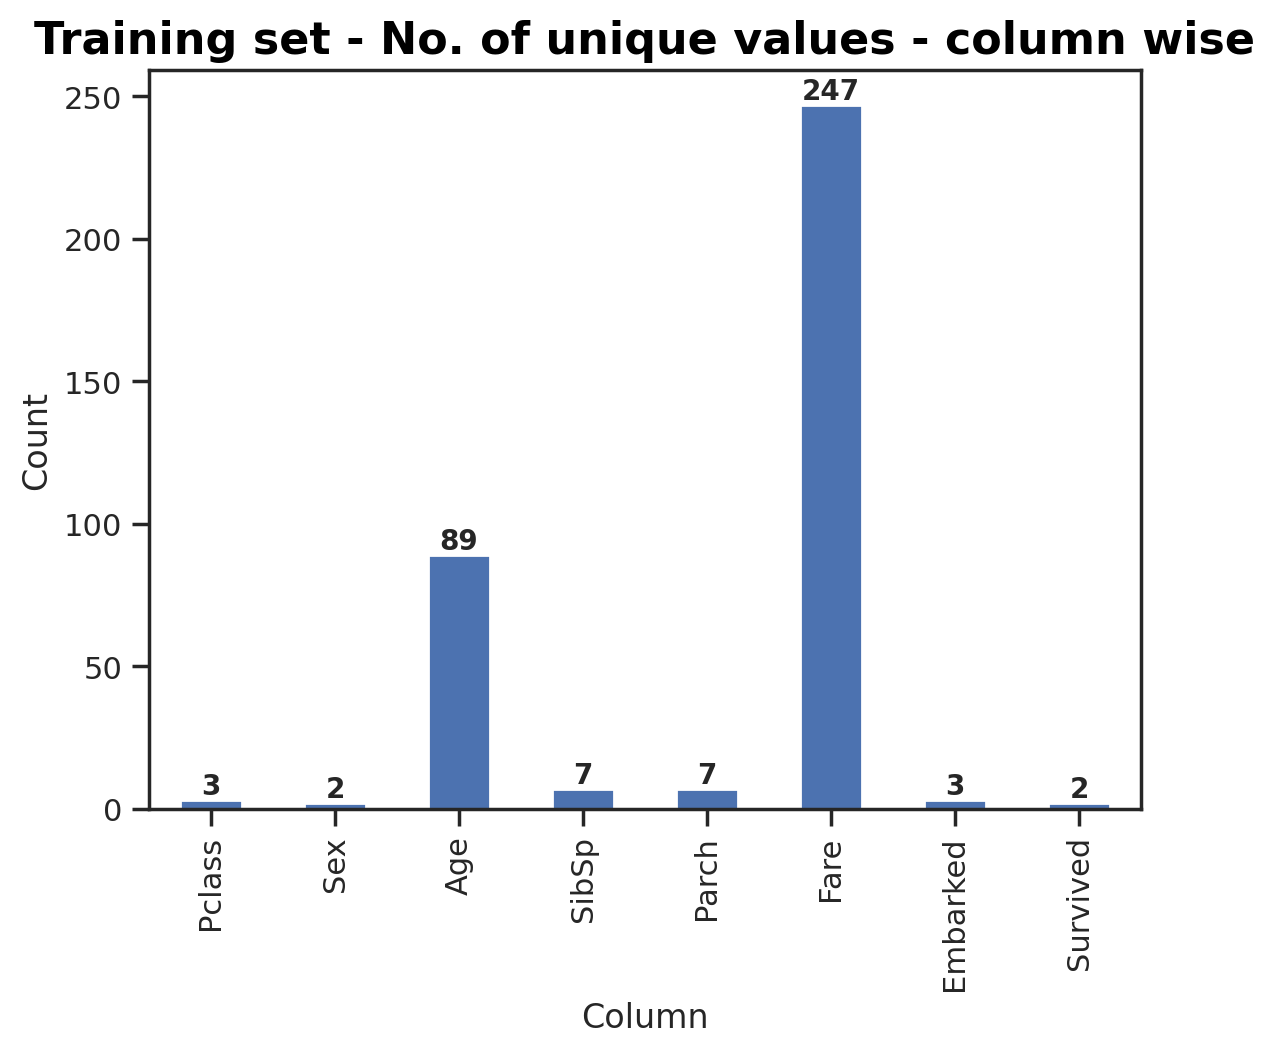

In [59]:
ax = column_unique_train.plot.bar()       
plt.title('Training set - No. of unique values - column wise',
          fontdict={
              'fontsize': 16,
              'color': 'black',
              'fontweight': 'bold'
          })
plt.xlabel("Column")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

#### Observations
- We can separate categorical columns and numerical columns from this chart.

**Readability - changing column names**

In [60]:
df_train.rename(columns={"Sex":"Gender", "Parch":"parents_children", "SibSp":"siblings_spouses"}, inplace=True)

/tmp/ipykernel_20/1577252362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={"Sex":"Gender", "Parch":"parents_children", "SibSp":"siblings_spouses"}, inplace=True)


In [61]:
df_test.rename(columns={"Sex":"Gender", "Parch":"parents_children", "SibSp":"siblings_spouses"}, inplace=True)

In [62]:
df_train['Embarked'] = df_train['Embarked'].replace({'S':'Southampton',
                                            'C':'Cherbourg',
                                            'Q':'Queenstown'})

/tmp/ipykernel_20/1837257135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Embarked'] = df_train['Embarked'].replace({'S':'Southampton',


In [63]:
df_test['Embarked'] = df_test['Embarked'].replace({'S':'Southampton',
                                            'C':'Cherbourg',
                                            'Q':'Queenstown'})

In [64]:
categorical_columns = ["Gender", "Embarked", "Survived", "Pclass", "parents_children", "siblings_spouses"]
numeric_columns = ["Age", "Fare"]

# We ignore the remaining columns like PassengerId, Name, Ticket

In [65]:
column_unique_test = dict()
for i in df_test.columns:
    column_unique_test[i] = df_test[i].nunique()
column_unique_test = pd.Series(column_unique_test)
column_unique_test

Pclass                3
Gender                2
Age                  80
siblings_spouses      7
parents_children      8
Fare                170
Embarked              3
dtype: int64

Text(0.5, 1.0, 'Test set - No. of unique values - column wise')

Text(0.5, 0, 'Column')

Text(0, 0.5, 'Count')

Text(0, 5, '3')

Text(0, 5, '2')

Text(0, 5, '80')

Text(0, 5, '7')

Text(0, 5, '8')

Text(0, 5, '170')

Text(0, 5, '3')

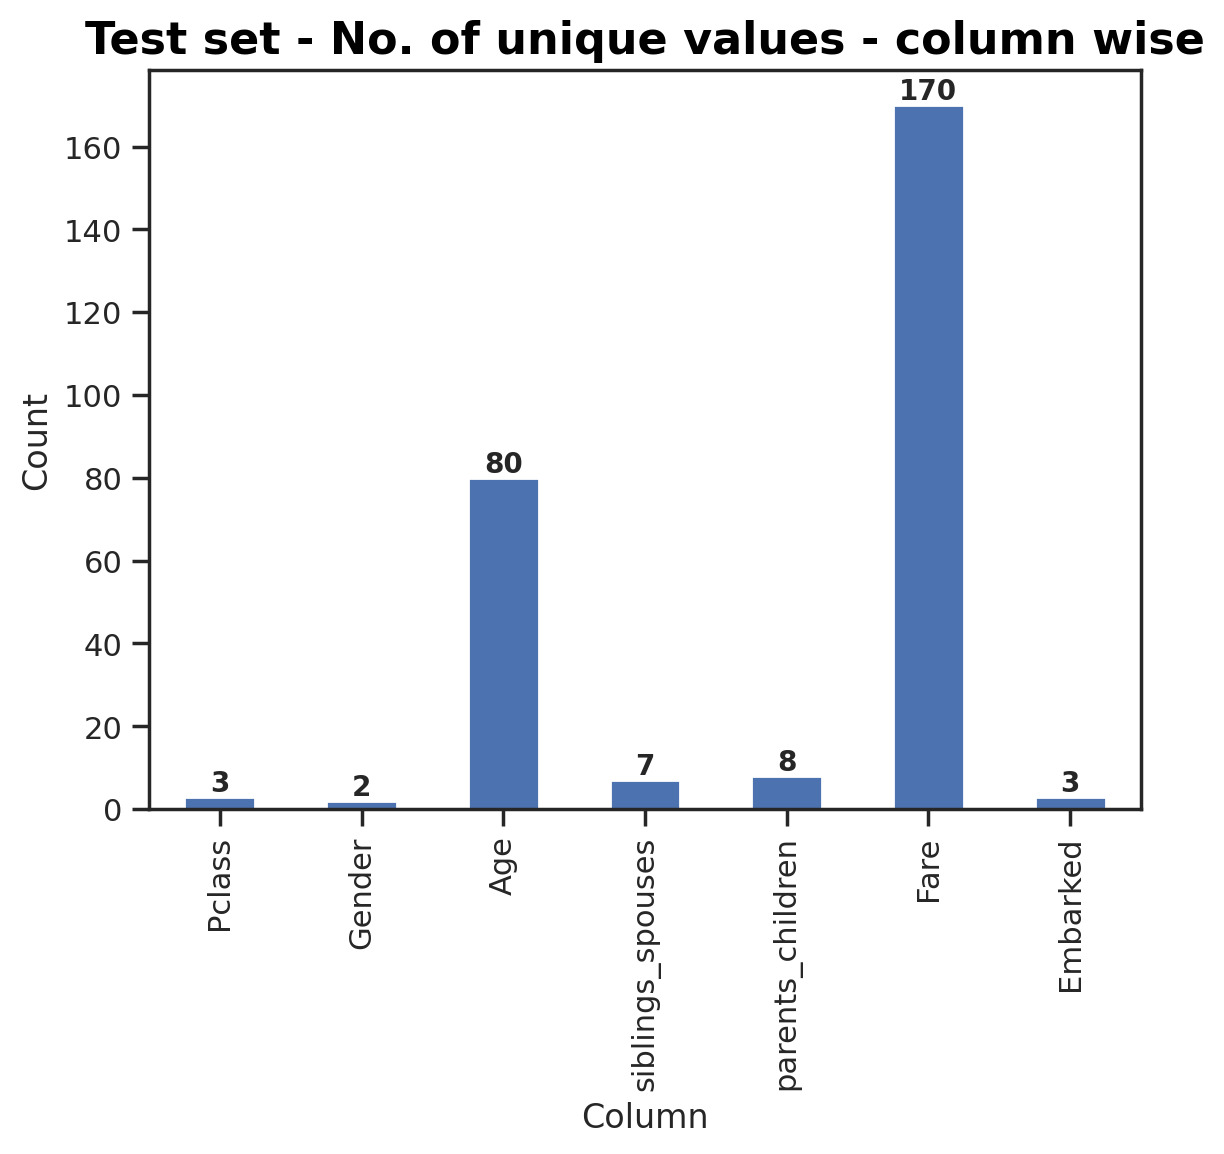

In [66]:
ax = column_unique_test.plot.bar()       
plt.title('Test set - No. of unique values - column wise',
          fontdict={
              'fontsize': 16,
              'color': 'black',
              'fontweight': 'bold'
          })
plt.xlabel("Column")
plt.ylabel("Count")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                fontsize=10,
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

#### 1.6.1 Categorical columns

**Defining a helper function**

In [67]:
def bar_plot_train_test(palette, title):

    fig, axes = plt.subplots(nrows= len(categorical_columns), ncols = 2, figsize=(20,40), sharey = True)
    i = 0
    for x in categorical_columns:   
        
        # Training set
        
        ax_train = sns.countplot(x=x, edgecolor="black", data=df_train, palette=palette, ax=axes[i][0])
        ax_train.set_title('Training set - ' + title + x,
                      fontdict={
                          'fontsize': 20,
                          'color': 'black',
                          'fontweight': 'bold'
                      })
        ax_train.set_xlabel(x, fontweight='bold')
        ax_train.set_ylabel("Count", fontweight='bold')

#         fontsize = 6 if (x=='parents_children' or x=='siblings_spouses') else 10
        fontsize = 10
        for p in ax_train.patches:
            ax_train.annotate(format(p.get_height(), '.0f') + " (" +
                        str(round(
                            ((p.get_height() / df_train.shape[0]) * 100), 1)) + " %)",
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center',
                        va='center',
                        fontsize = fontsize,
                        fontweight='bold',
                        xytext=(0, 5),
                        textcoords='offset points')
        
        # Test set
        if x!='Survived':
            ax_test = sns.countplot(x=x, edgecolor="black", data=df_test, palette=palette, ax=axes[i][1])
            ax_test.set_title('Test set - ' + title + x,
                          fontdict={
                              'fontsize': 20,
                              'color': 'black',
                              'fontweight': 'bold'
                          })
            ax_test.set_xlabel(x, fontweight='bold')
            ax_test.set_ylabel("Count", fontweight='bold')

#             fontsize = 6 if (x=='parents_children' or x=='siblings_spouses') else 10
            fontsize = 10
            for p in ax_test.patches:
                ax_test.annotate(format(p.get_height(), '.0f') + " (" +
                            str(round(
                                ((p.get_height() / df_test.shape[0]) * 100), 1)) + " %)",
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center',
                            va='center',
                            fontsize = fontsize,
                            fontweight='bold',
                            xytext=(0, 5),
                            textcoords='offset points')
        i = i + 1


    plt.tight_layout()

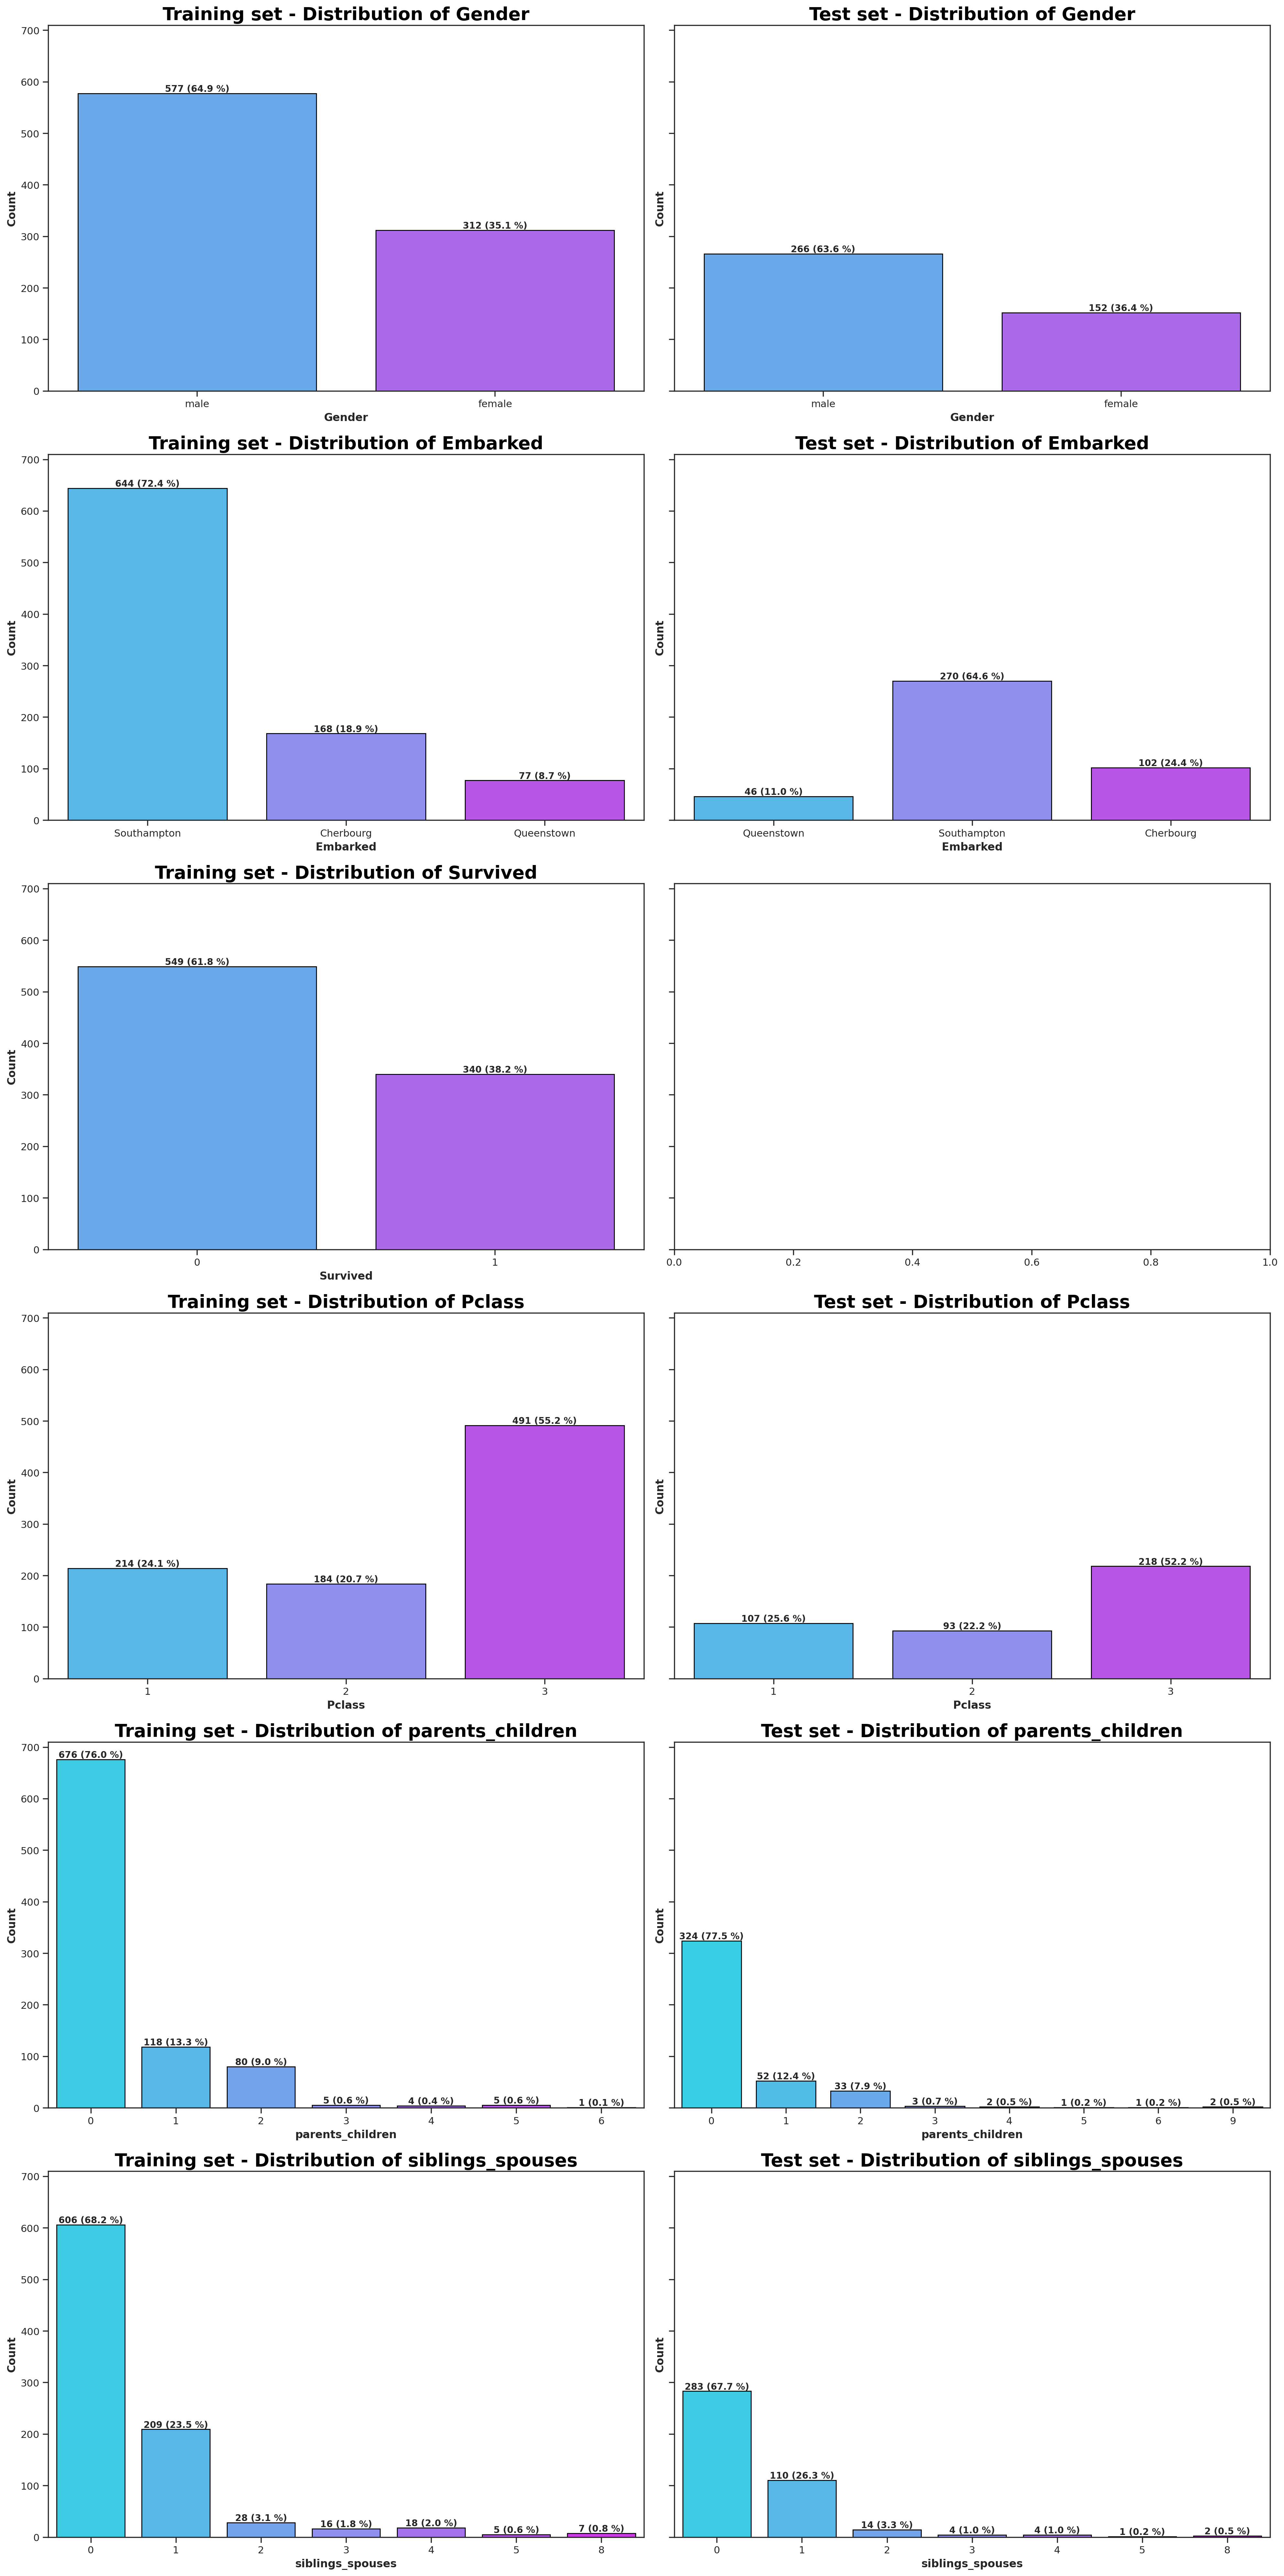

In [68]:
bar_plot_train_test("cool", "Distribution of ")

In [69]:
# def bar_plot(x, df, palette, title, xlabel):
#     plt.figure()
#     ax = sns.countplot(x=x, edgecolor="black", data=df, palette=palette)
#     plt.title(title,
#               fontdict={
#                   'fontsize': 20,
#                   'color': 'black',
#                   'fontweight': 'bold'
#               })
#     plt.xlabel(xlabel, fontweight='bold')
#     plt.ylabel("Count", fontweight='bold')

#     fontsize = 6 if (xlabel=='parents_children' or xlabel=='siblings_spouses') else 10
#     for p in ax.patches:
#         ax.annotate(format(p.get_height(), '.0f') + " (" +
#                     str(round(
#                         ((p.get_height() / df.shape[0]) * 100), 1)) + " %)",
#                     (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha='center',
#                     va='center',
#                     fontsize = fontsize,
#                     fontweight='bold',
#                     xytext=(0, 5),
#                     textcoords='offset points')

In [70]:
# for column in categorical_columns:
#     bar_plot(column, df_train, "cool", "Training set - Distribution of " + column, column)

In [71]:
# for column in categorical_columns:
#     if column != "Survived":
#         bar_plot(column, df_test, "cool", "Test set - Distribution of " + column, column)

#### 1.6.2 Numeric columns

 Defining a helper function

In [72]:
def plot_hist_box_violin(dataframe, column, bins, hue, title):

    fig, (ax_box, ax_hist, ax_violin) = plt.subplots(
        3,
        1,
        figsize=(10, 6),
        sharex=True,
        gridspec_kw={"height_ratios": (.2, .5, .2)})
    sns.boxplot(data=dataframe, x=column, ax=ax_box, palette="Wistia")
    ax_box.set_title(title,
      fontdict={
          'fontsize': 20,
          'color': 'black',
          'fontweight': 'bold'
      })

    sns.histplot(data=dataframe,
                 x=column,
                 kde=True,
                 bins=bins,
                 ax=ax_hist,
                 hue=hue,
                 palette="cool")
    sns.rugplot(data=dataframe, x=column, ax=ax_hist, color='red')
    sns.violinplot(data=dataframe, x=column, ax=ax_violin, palette="Wistia", hue=hue, inner='box')
    plt.tight_layout()

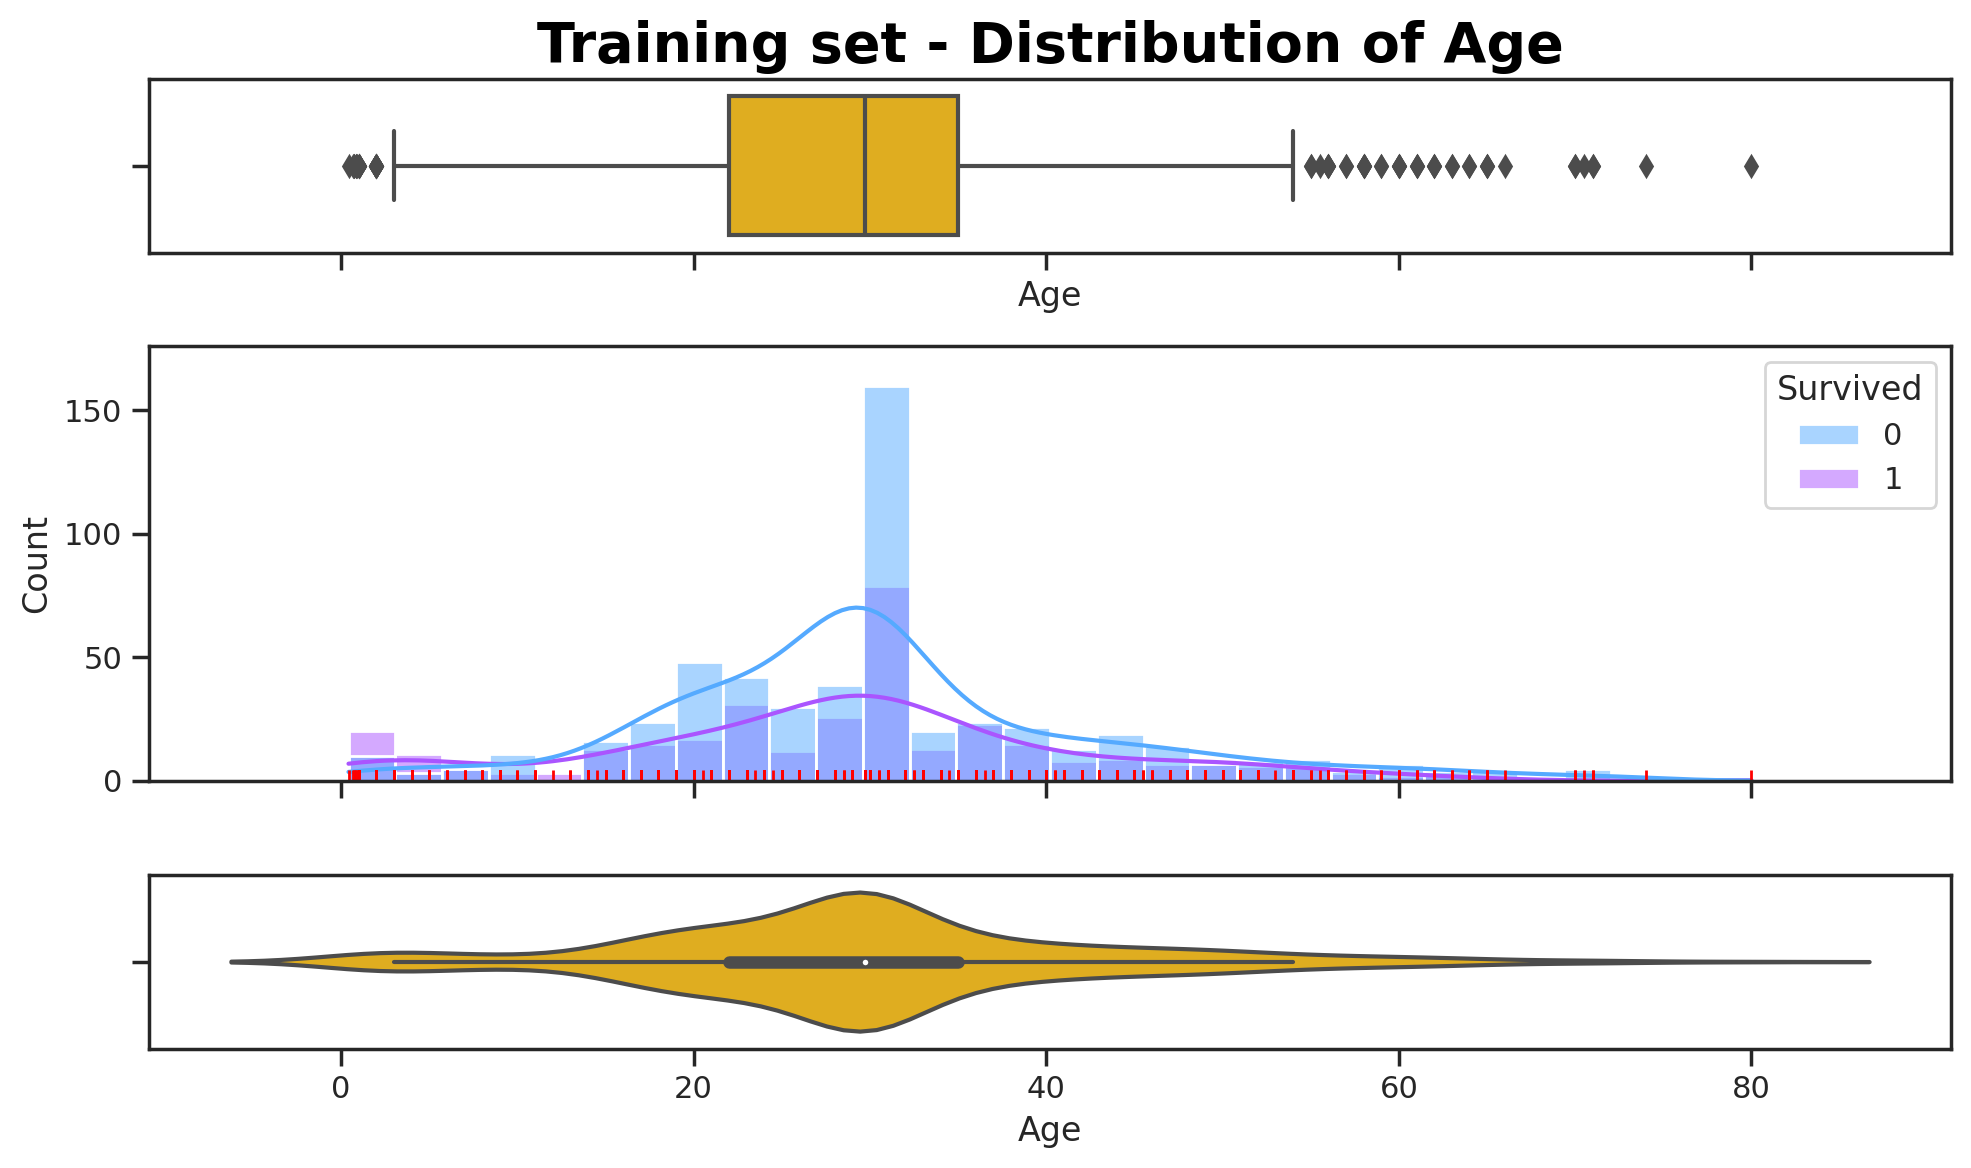

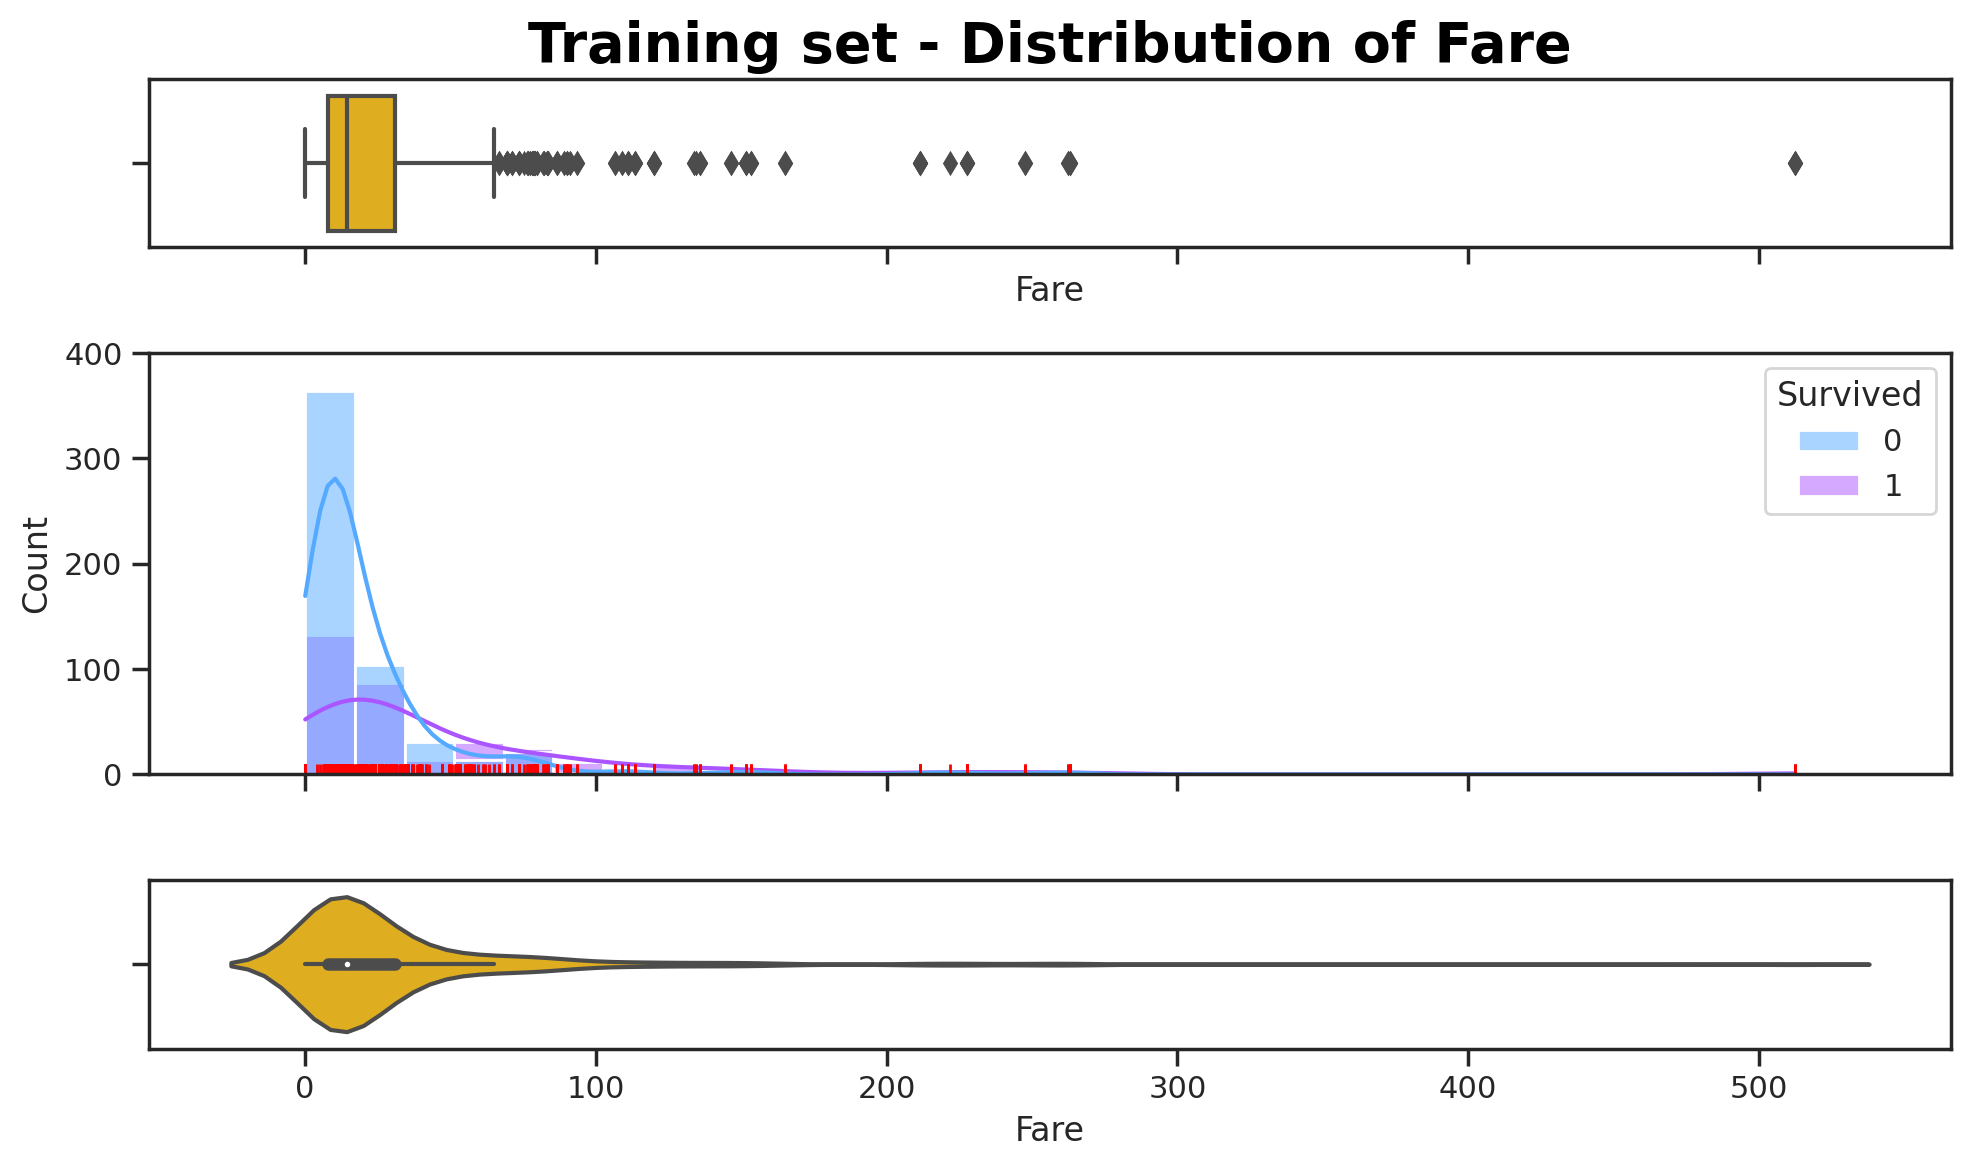

In [73]:
for column in numeric_columns:
    plot_hist_box_violin(df_train, column, 30, 'Survived', "Training set - Distribution of " + column)

- In Age, before filling the missing values, we already dealt with the outliers above, since we have filled the NaNs now, the outliers are present again.
- We see lots of outliers in Fare.

### Age - removing outliers

In [74]:
from matplotlib.cbook import boxplot_stats

In [75]:
boxplot_stats(df_train['Age'])

[{'mean': 29.65344637067425,
  'iqr': 13.0,
  'cilo': 29.014588217499718,
  'cihi': 30.383647076617923,
  'whishi': 54.0,
  'whislo': 3.0,
  'fliers': array([ 2.  ,  2.  ,  0.83,  2.  ,  1.  ,  1.  ,  1.  ,  2.  ,  2.  ,
          0.92,  2.  ,  1.  ,  1.  ,  0.75,  2.  ,  2.  ,  2.  ,  0.75,
          0.67,  1.  ,  0.42,  2.  ,  1.  ,  0.83, 58.  , 55.  , 66.  ,
         65.  , 59.  , 71.  , 70.5 , 55.5 , 61.  , 56.  , 58.  , 59.  ,
         62.  , 58.  , 63.  , 65.  , 61.  , 60.  , 64.  , 65.  , 56.  ,
         63.  , 58.  , 55.  , 71.  , 64.  , 62.  , 62.  , 60.  , 61.  ,
         57.  , 80.  , 56.  , 58.  , 70.  , 60.  , 60.  , 70.  , 57.  ,
         74.  , 56.  ]),
  'q1': 22.0,
  'med': 29.69911764705882,
  'q3': 35.0}]

In [76]:
df_train[df_train['Age'] >= boxplot_stats(df_train['Age'])[0]['whishi']].shape
df_train[df_train['Age'] <= boxplot_stats(df_train['Age'])[0]['whislo']].shape
df_train.shape

(49, 8)

(30, 8)

(889, 8)

- We see 49 points that are greater than high whisker
- We see 30 points that are lesser than low whisker
- So 79/889 = ~9% of the data will be removed which is okay.

In [77]:
df_train = df_train[~((df_train['Age'] <= boxplot_stats(df_train['Age'])[0]['whislo']) | (df_train['Age'] >= boxplot_stats(df_train['Age'])[0]['whishi']))]

In [78]:
# df_train[df_train['Age'].isin(range(int(boxplot_stats(df_train['Age'])[0]['whislo']), int(boxplot_stats(df_train['Age'])[0]['whishi']) + 1))]

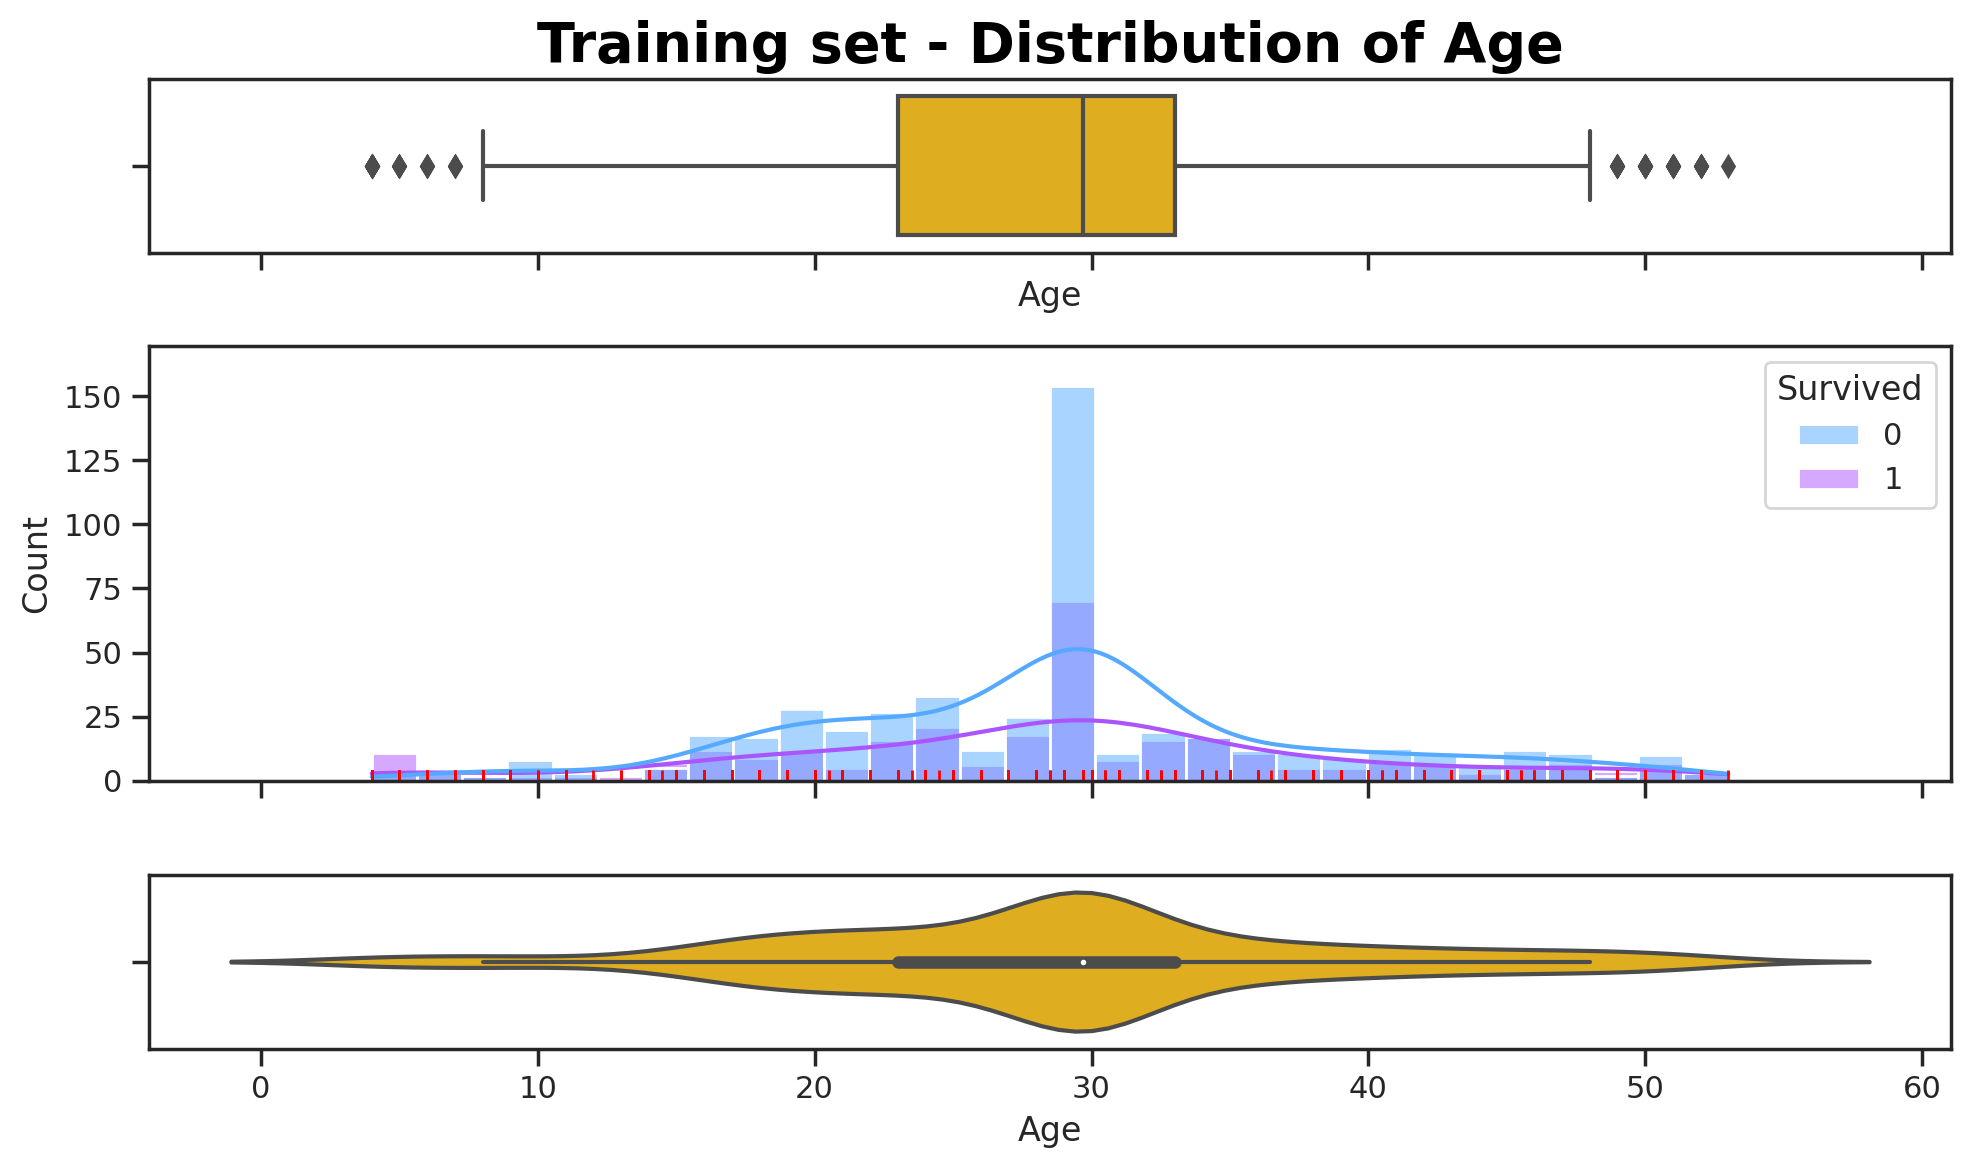

In [79]:
plot_hist_box_violin(df_train, "Age", 30, 'Survived', "Training set - Distribution of Age")

Now, Age has around 9 outliers, that is okay.

/tmp/ipykernel_20/2606863014.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe,
/tmp/ipykernel_20/2606863014.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe,


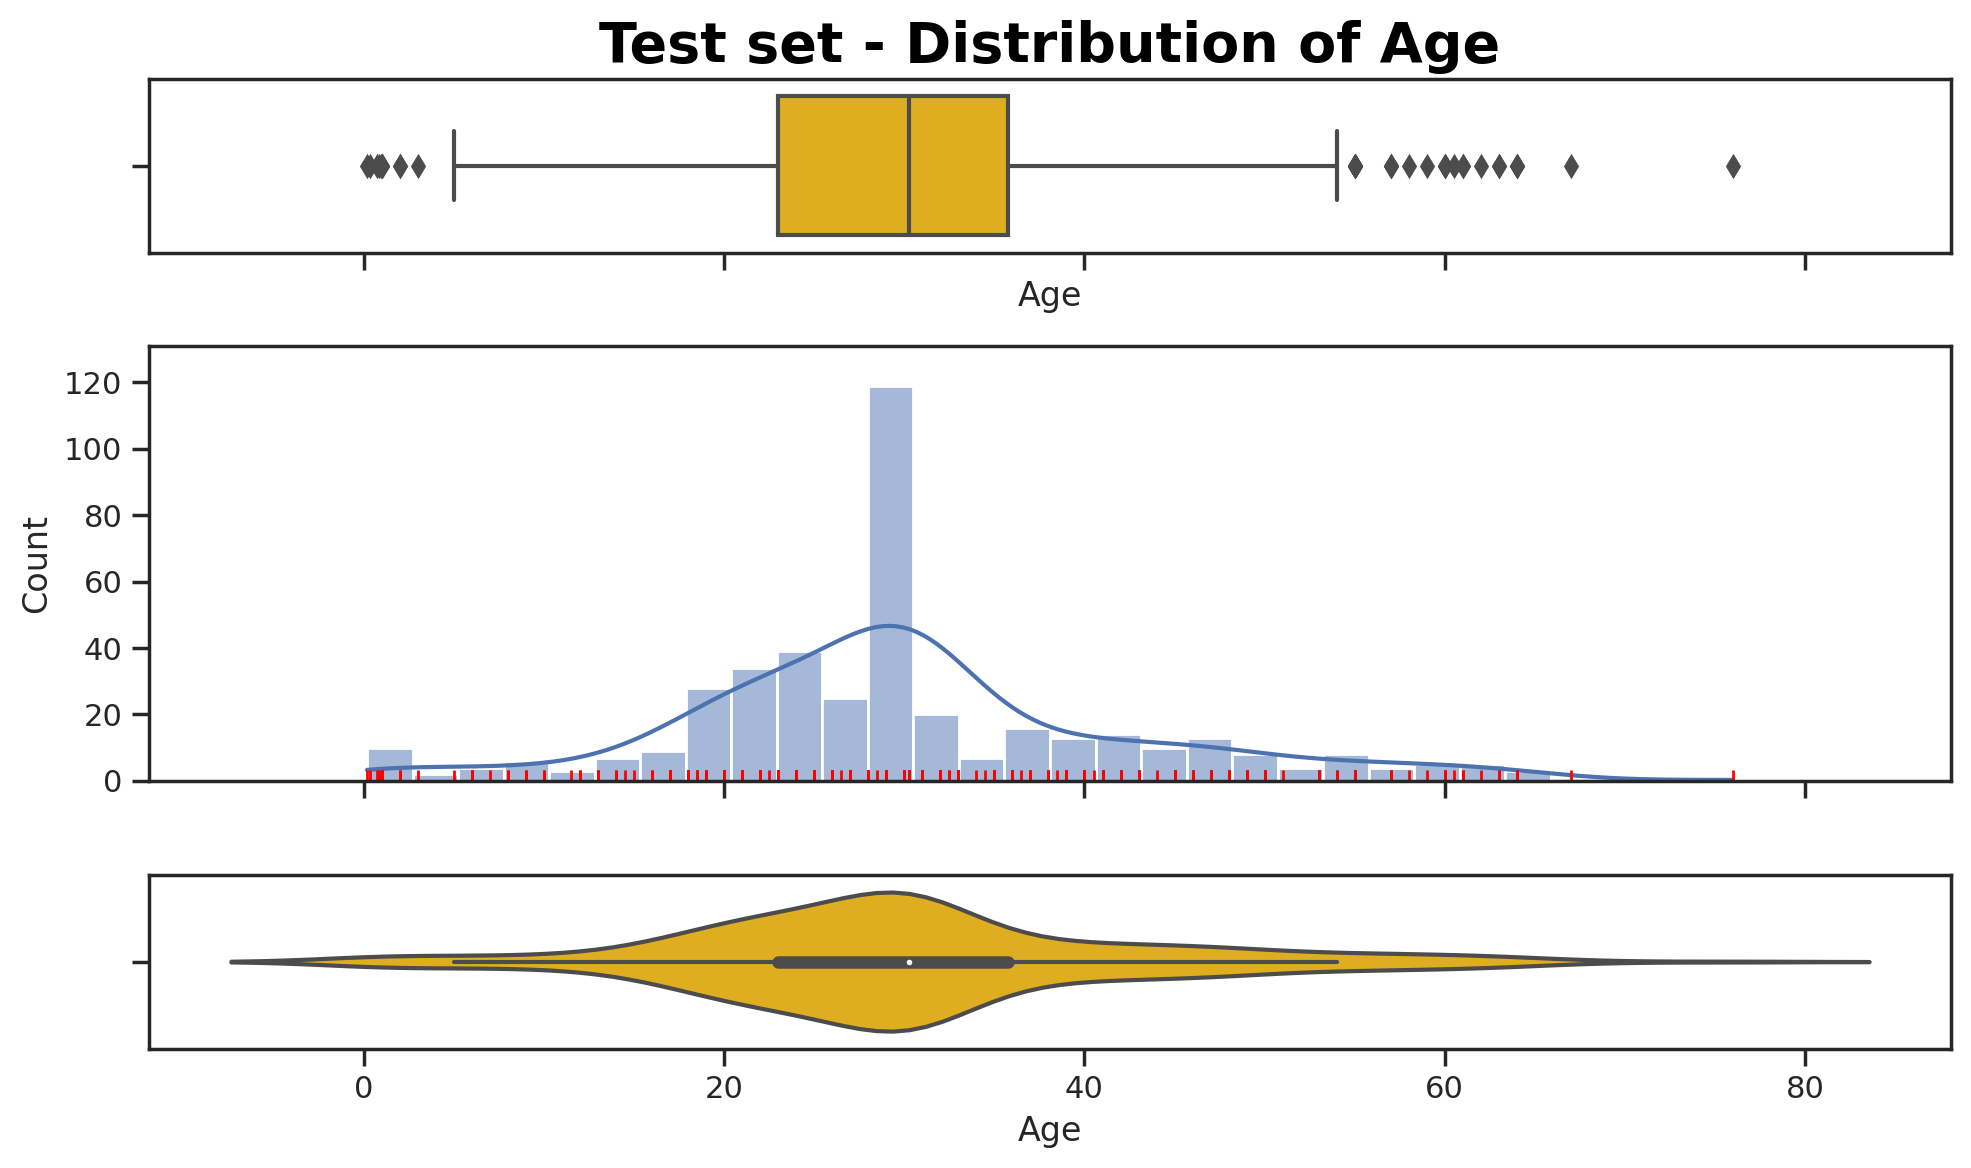

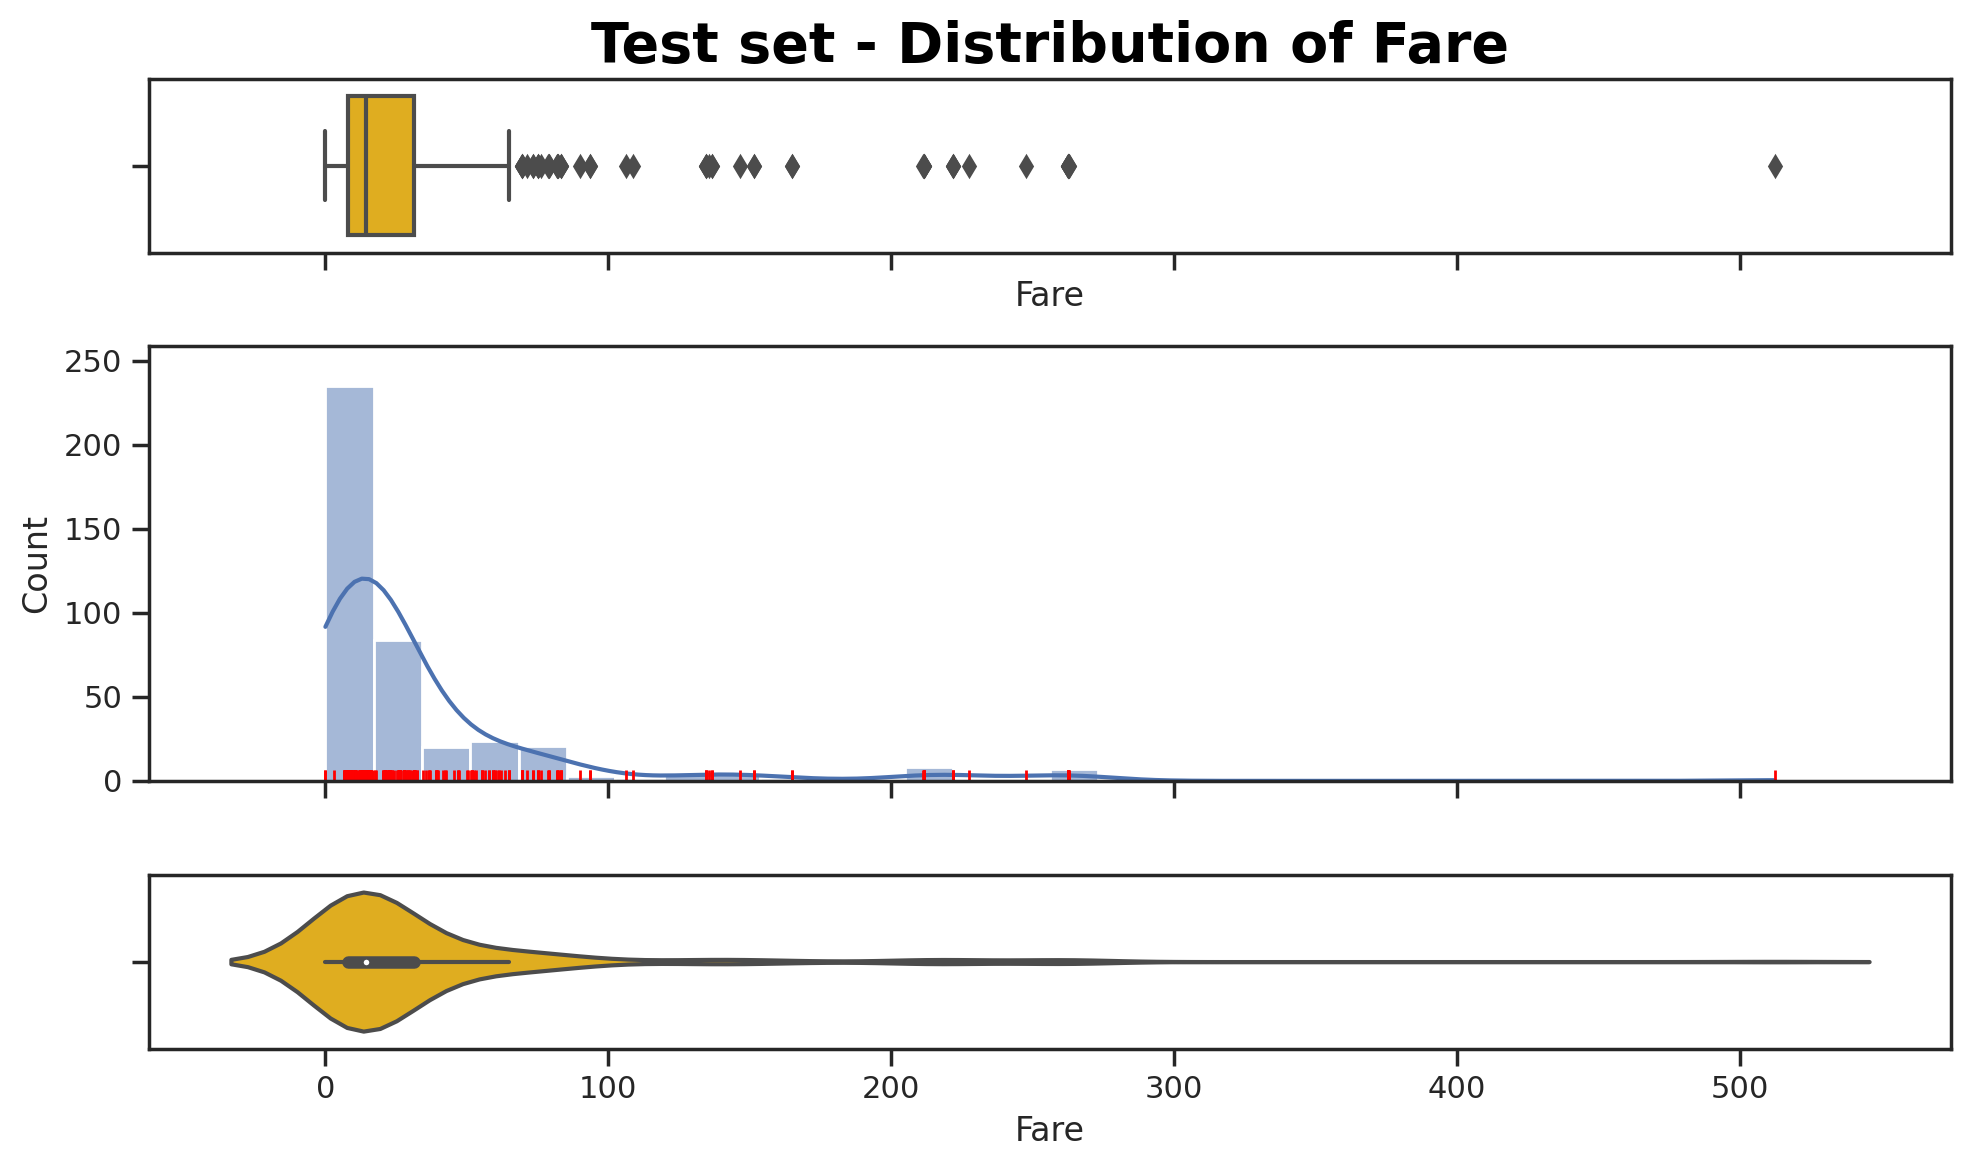

In [80]:
for column in numeric_columns:
    plot_hist_box_violin(df_test, column, 30, None, "Test set - Distribution of " + column)

In [81]:
boxplot_stats(df_test['Age'])

[{'mean': 30.272590361445783,
  'iqr': 12.75,
  'cilo': 29.293502432377668,
  'cihi': 31.251678290513897,
  'whishi': 54.0,
  'whislo': 5.0,
  'fliers': array([ 2.  ,  1.  ,  0.33,  0.92,  1.  ,  0.75,  2.  ,  1.  ,  0.83,
          0.17,  3.  , 62.  , 63.  , 55.  , 60.  , 60.  , 55.  , 67.  ,
         76.  , 63.  , 61.  , 60.5 , 64.  , 61.  , 60.  , 57.  , 64.  ,
         55.  , 64.  , 55.  , 55.  , 57.  , 58.  , 59.  , 55.  , 57.  ]),
  'q1': 23.0,
  'med': 30.272590361445783,
  'q3': 35.75}]

In [82]:
df_test[df_test['Age'] >= boxplot_stats(df_test['Age'])[0]['whishi']].shape
df_test[df_test['Age'] <= boxplot_stats(df_test['Age'])[0]['whislo']].shape
df_test.shape

(27, 7)

(12, 7)

(418, 7)

In [83]:
# df_test = df_test[~((df_test['Age'] <= boxplot_stats(df_test['Age'])[0]['whislo']) | (df_test['Age'] >= boxplot_stats(df_test['Age'])[0]['whishi']))]

In [84]:
# plot_hist_box_violin(df_test, "Age", 30, None, "Test set - Distribution of Age")

<!-- Now, Age has around 9 outliers, that is okay. -->

### Fare - removing outliers

Training set

In [85]:
boxplot_stats(df_train['Fare'])

[{'mean': 31.33762259259259,
  'iqr': 22.1042,
  'cilo': 11.780639999624961,
  'cihi': 14.219360000375039,
  'whishi': 61.3792,
  'whislo': 0.0,
  'fliers': array([ 71.2833, 263.    , 146.5208,  82.1708,  76.7292,  83.475 ,
          73.5   , 263.    ,  63.3583,  77.2875, 247.5208,  73.5   ,
          79.2   ,  66.6   ,  69.55  ,  69.55  ,  69.55  , 113.275 ,
          76.2917,  90.    ,  83.475 ,  90.    ,  79.2   ,  86.5   ,
         512.3292,  79.65  , 135.6333,  78.85  ,  91.0792, 247.5208,
         110.8833, 108.9   ,  83.1583, 262.375 , 164.8667, 134.5   ,
          69.55  , 135.6333, 153.4625, 133.65  ,  66.6   , 134.5   ,
         263.    ,  69.3   , 135.6333,  82.1708, 211.5   , 227.525 ,
          73.5   , 120.    , 113.275 ,  90.    , 120.    ,  81.8583,
          89.1042,  91.0792,  90.    , 151.55  ,  86.5   , 108.9   ,
          93.5   , 221.7792, 106.425 ,  71.    , 106.425 , 110.8833,
         227.525 ,  79.65  , 110.8833,  79.65  ,  78.2667, 153.4625,
          65.    

In [86]:
df_train[df_train['Fare'] >= boxplot_stats(df_train['Fare'])[0]['whishi']].shape
df_train[df_train['Fare'] <= boxplot_stats(df_train['Fare'])[0]['whislo']].shape
df_train.shape

(105, 8)

(15, 8)

(810, 8)

In [87]:
df_train = df_train[~((df_train['Fare'] <= boxplot_stats(df_train['Fare'])[0]['whislo']) | (df_train['Fare'] >= boxplot_stats(df_train['Fare'])[0]['whishi']))]

/tmp/ipykernel_20/2606863014.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe,


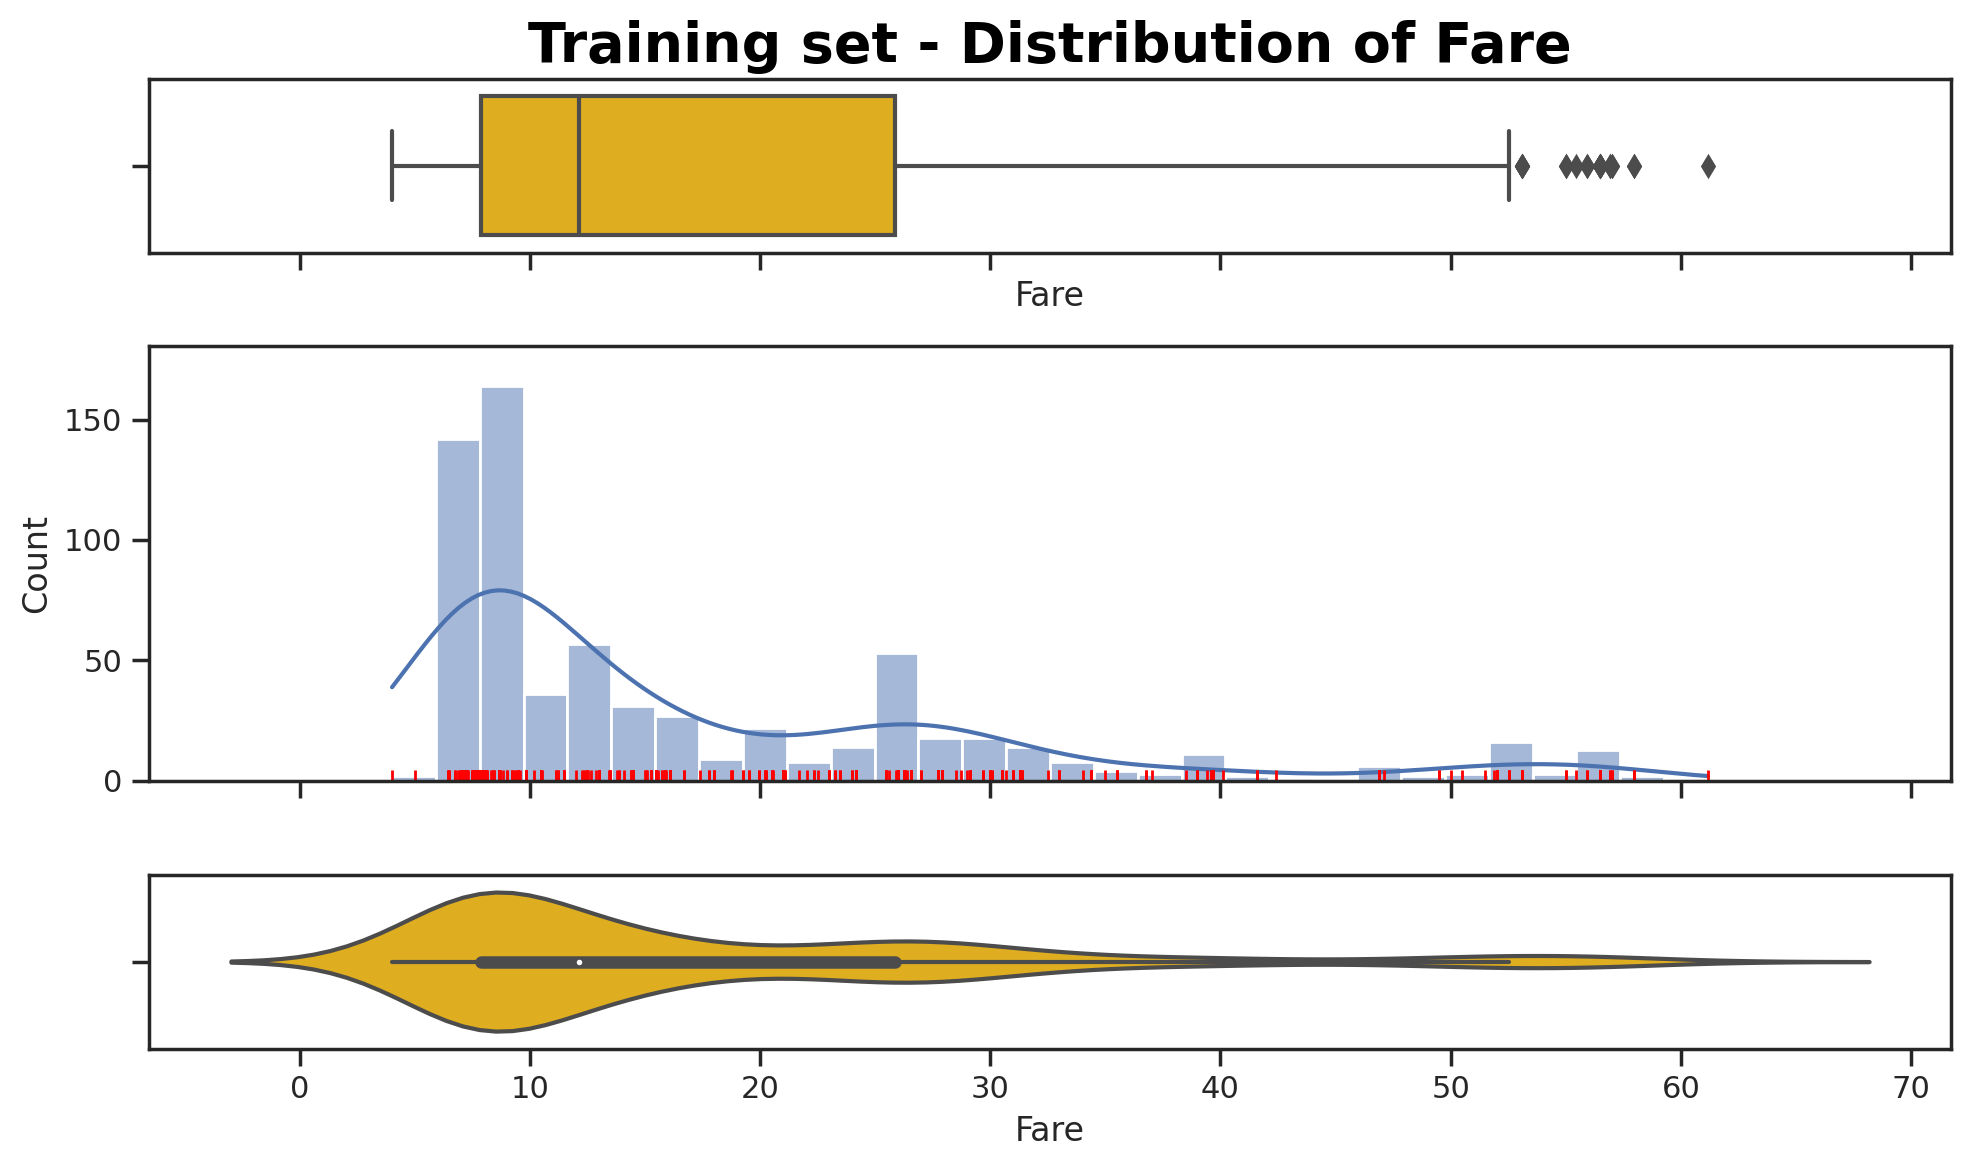

In [88]:
plot_hist_box_violin(df_train, "Fare", 30, None, "Training set - Distribution of Fare")

Let us remove outliers one more time

In [89]:
df_train[df_train['Fare'] >= boxplot_stats(df_train['Fare'])[0]['whishi']].shape
df_train[df_train['Fare'] <= boxplot_stats(df_train['Fare'])[0]['whislo']].shape
df_train.shape

(27, 8)

(1, 8)

(690, 8)

In [90]:
df_train = df_train[~((df_train['Fare'] <= boxplot_stats(df_train['Fare'])[0]['whislo']) | (df_train['Fare'] >= boxplot_stats(df_train['Fare'])[0]['whishi']))]

/tmp/ipykernel_20/2606863014.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=dataframe,


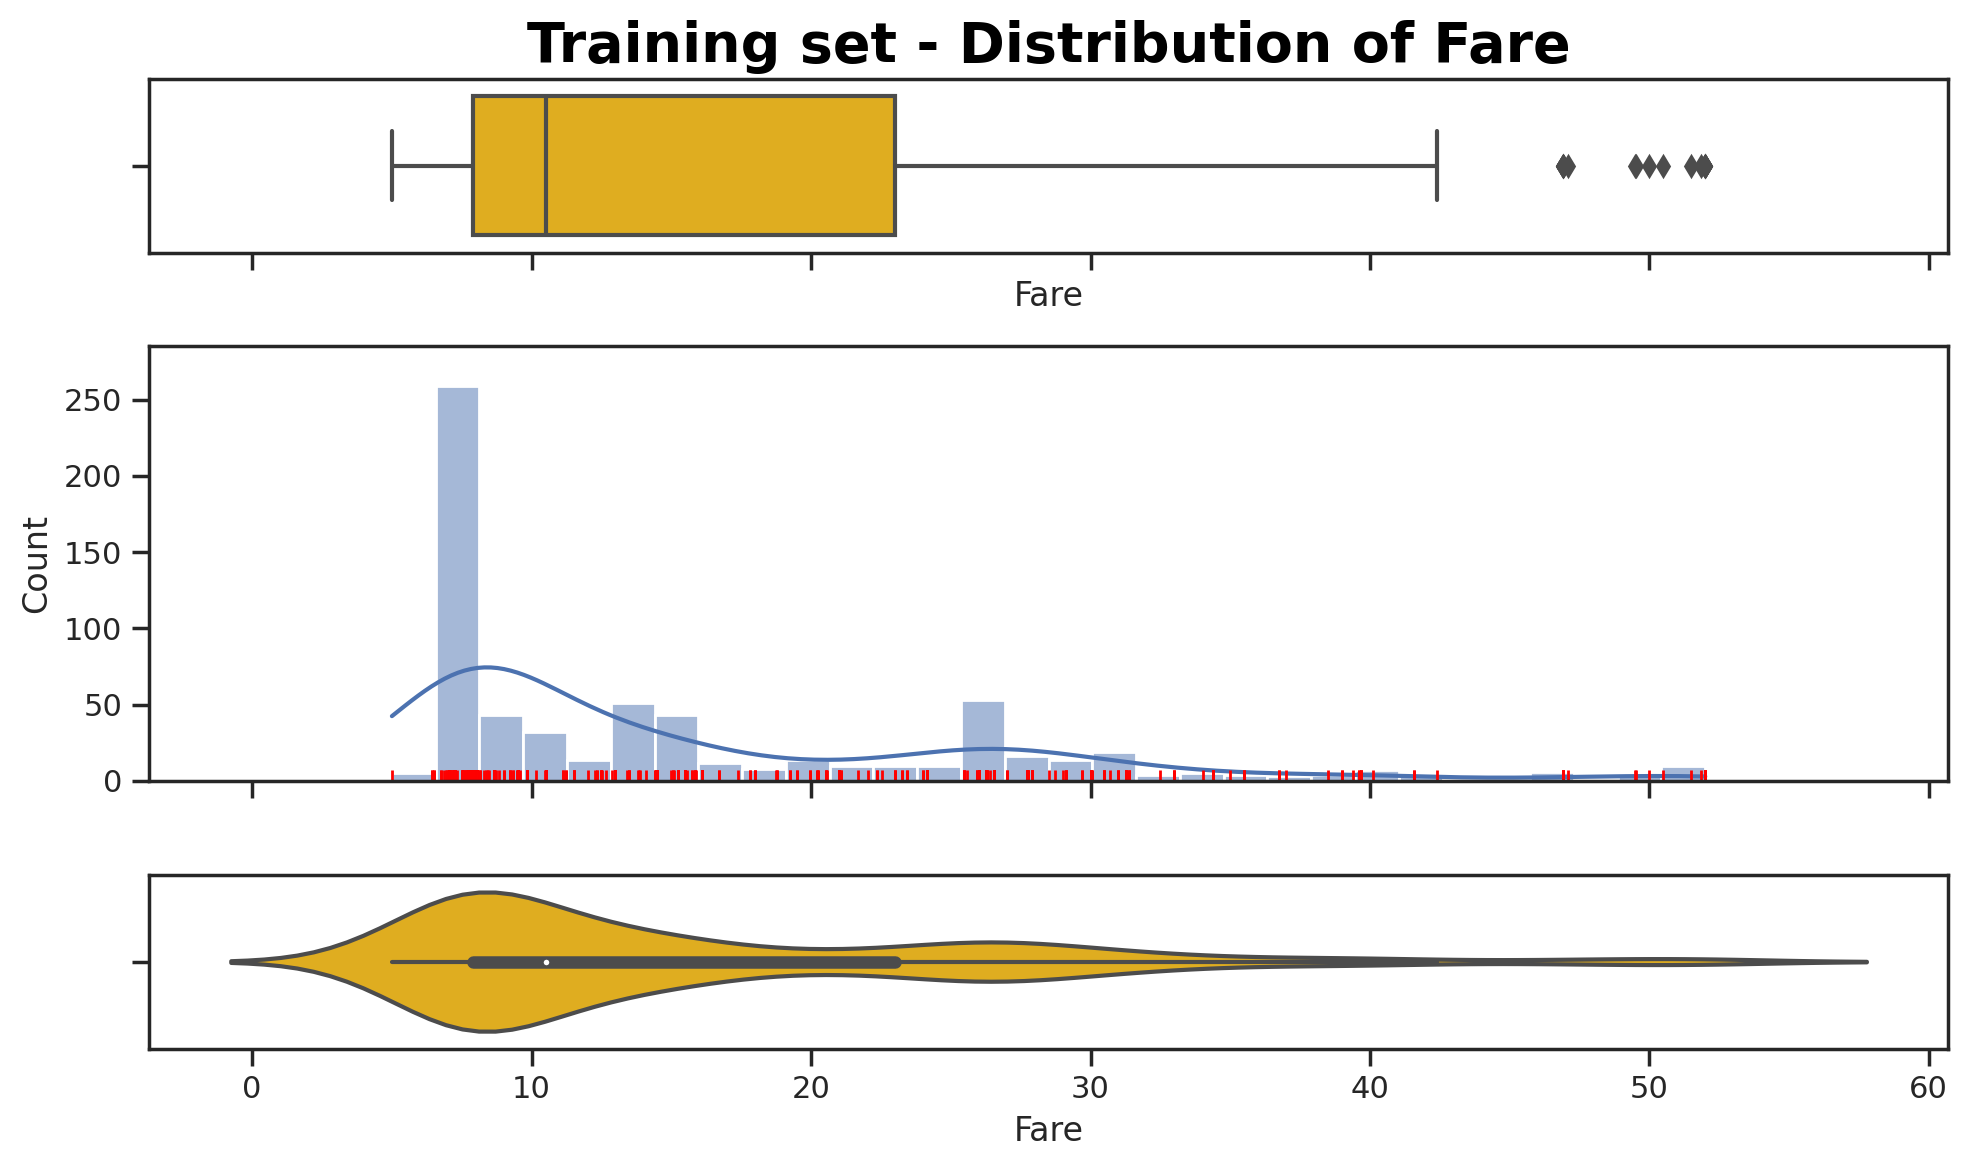

In [91]:
plot_hist_box_violin(df_train, "Fare", 30, None, "Training set - Distribution of Fare")

Test set

In [92]:
df_test[df_test['Fare'] >= boxplot_stats(df_test['Fare'])[0]['whishi']].shape
df_test[df_test['Fare'] <= boxplot_stats(df_test['Fare'])[0]['whislo']].shape
df_test.shape

(58, 7)

(2, 7)

(418, 7)

In [93]:
# df_test = df_test[~((df_test['Fare'] <= boxplot_stats(df_test['Fare'])[0]['whislo']) | (df_test['Fare'] >= boxplot_stats(df_test['Fare'])[0]['whishi']))]

In [94]:
# plot_hist_box_violin(df_test, "Fare", 30, None, "Test set - Distribution of Fare")

### 1.7 Bivariate Analysis

In [95]:
import numpy as np

/tmp/ipykernel_20/1246874125.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data = df_train.corr(), annot = True, mask = np.triu(df_train.corr()), cmap="Blues")


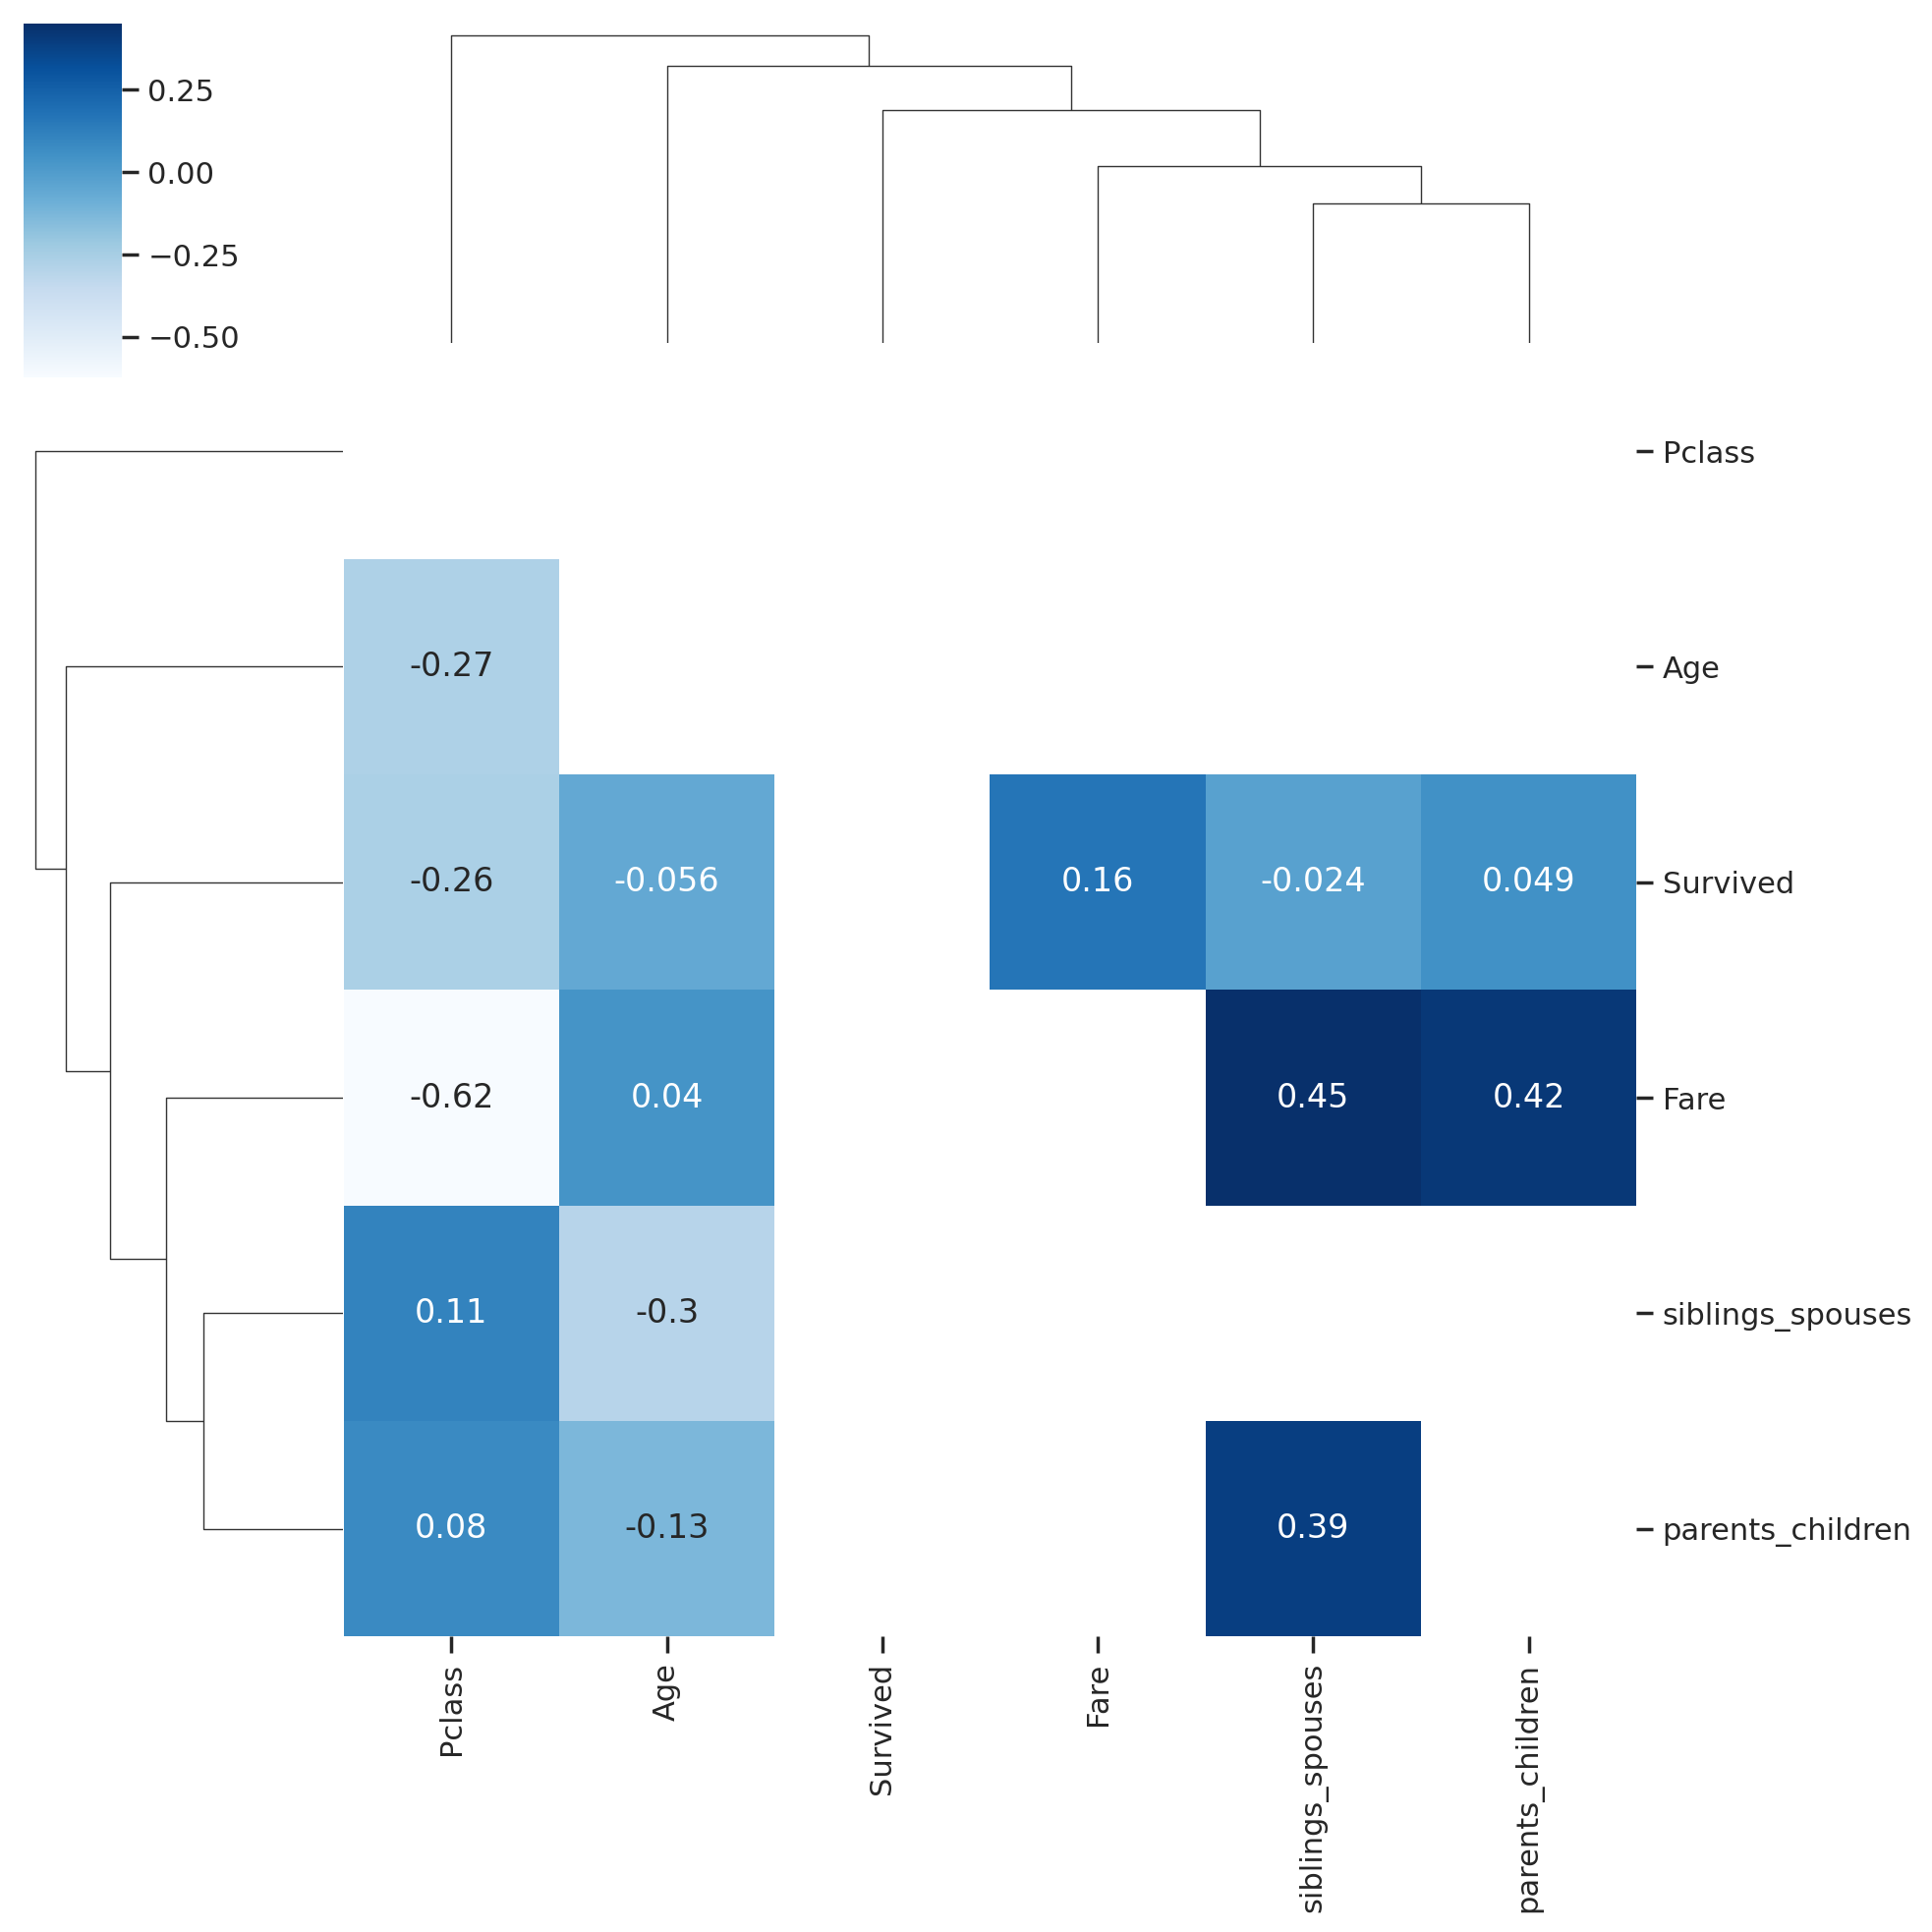

In [96]:
sns.clustermap(data = df_train.corr(), annot = True, mask = np.triu(df_train.corr()), cmap="Blues")

/tmp/ipykernel_20/211718997.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(data = df_test.corr(), annot = True, mask = np.triu(df_test.corr()), cmap="Blues")


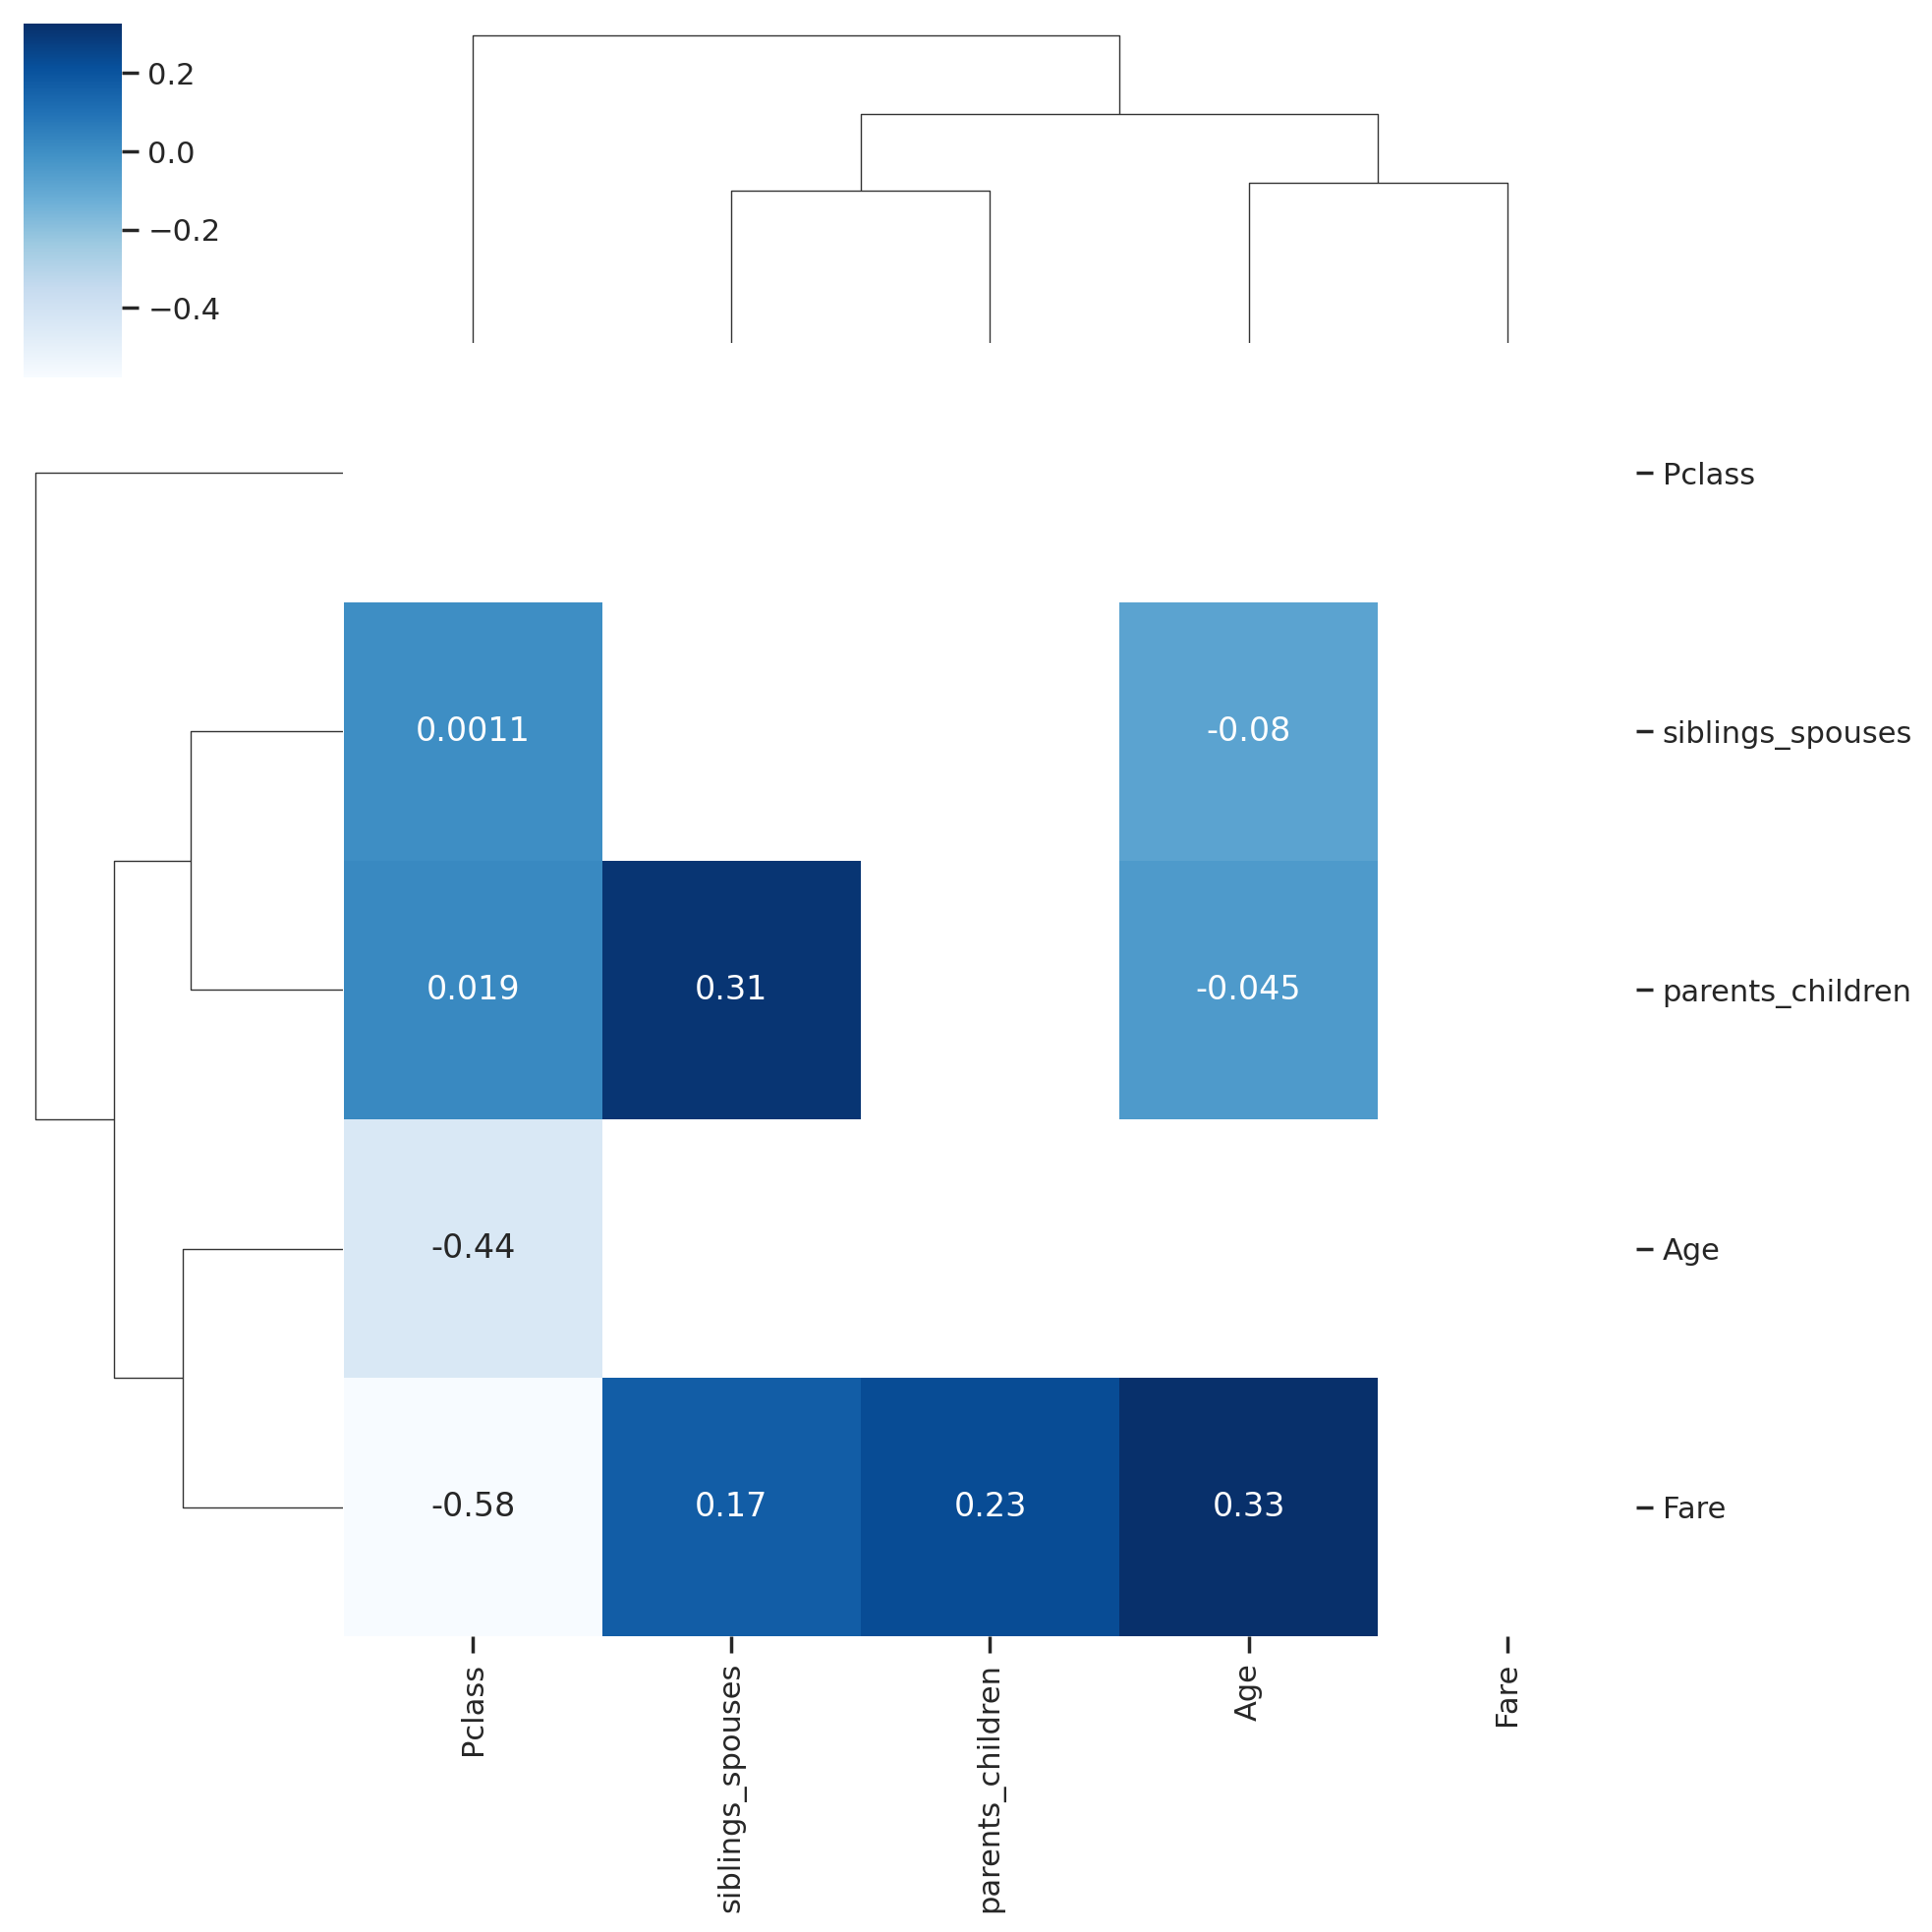

In [97]:
sns.clustermap(data = df_test.corr(), annot = True, mask = np.triu(df_test.corr()), cmap="Blues")

- We dont see much correlation except Fare & siblings_spouses

In [98]:
df_train.groupby(['Survived']).Fare.mean()

Survived
0    14.563570
1    18.271743
Name: Fare, dtype: float64

In [99]:
df_train[df_train['Survived'] == 0].Fare.mean()
df_train[df_train['Survived'] == 1].Fare.mean()

14.563569844789358

18.271742654028436

<Axes: xlabel='Age', ylabel='Fare'>

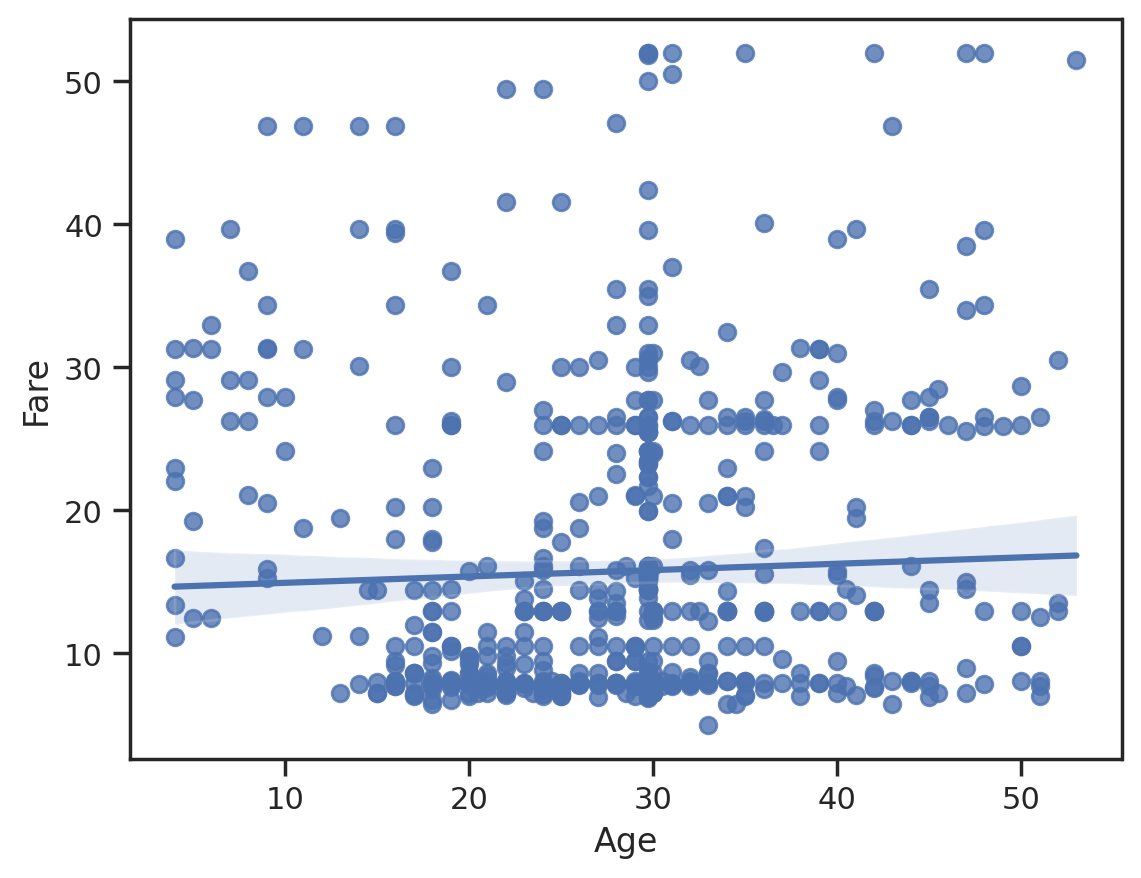

In [100]:
sns.regplot(data=df_train,x='Age',y='Fare')

## 1.7 Feature Engineering/Scaling/Encoding

In [101]:
df_train_encoded = pd.get_dummies(df_train, drop_first=True)
df_train_encoded
df_train

Pclass        Age  siblings_spouses  parents_children     Fare  Survived  \
0         3  22.000000                 1                 0   7.2500         0   
2         3  26.000000                 0                 0   7.9250         1   
4         3  35.000000                 0                 0   8.0500         0   
5         3  29.699118                 0                 0   8.4583         0   
8         3  27.000000                 0                 2  11.1333         1   
..      ...        ...               ...               ...      ...       ...   
886       2  27.000000                 0                 0  13.0000         0   
887       1  19.000000                 0                 0  30.0000         1   
888       3  29.699118                 1                 2  23.4500         0   
889       1  26.000000                 0                 0  30.0000         1   
890       3  32.000000                 0                 0   7.7500         0   

     Gender_male  Embarked_Queenstown  Embarked_Southampton  
0              1                    0                     1  
2              0                    0                     1  
4              1                    0                     1  
5              1                    1                     0  
8              0                    0                     1  
..           ...                  ...                   ...  
886            1                    0                     1  
887            0                    0                     1  
888            0                    0                     1  
889            1                    0                     0  
890            1                    1                     0  

[662 rows x 9 columns]

Pclass  Gender        Age  siblings_spouses  parents_children     Fare  \
0         3    male  22.000000                 1                 0   7.2500   
2         3  female  26.000000                 0                 0   7.9250   
4         3    male  35.000000                 0                 0   8.0500   
5         3    male  29.699118                 0                 0   8.4583   
8         3  female  27.000000                 0                 2  11.1333   
..      ...     ...        ...               ...               ...      ...   
886       2    male  27.000000                 0                 0  13.0000   
887       1  female  19.000000                 0                 0  30.0000   
888       3  female  29.699118                 1                 2  23.4500   
889       1    male  26.000000                 0                 0  30.0000   
890       3    male  32.000000                 0                 0   7.7500   

        Embarked  Survived  
0    Southampton         0  
2    Southampton         1  
4    Southampton         0  
5     Queenstown         0  
8    Southampton         1  
..           ...       ...  
886  Southampton         0  
887  Southampton         1  
888  Southampton         0  
889    Cherbourg         1  
890   Queenstown         0  

[662 rows x 8 columns]

In [102]:
df_test_encoded = pd.get_dummies(df_test, drop_first=True)
df_test_encoded
df_test

Pclass       Age  siblings_spouses  parents_children      Fare  \
0         3  34.50000                 0                 0    7.8292   
1         3  47.00000                 1                 0    7.0000   
2         2  62.00000                 0                 0    9.6875   
3         3  27.00000                 0                 0    8.6625   
4         3  22.00000                 1                 1   12.2875   
..      ...       ...               ...               ...       ...   
413       3  30.27259                 0                 0    8.0500   
414       1  39.00000                 0                 0  108.9000   
415       3  38.50000                 0                 0    7.2500   
416       3  30.27259                 0                 0    8.0500   
417       3  30.27259                 1                 1   22.3583   

     Gender_male  Embarked_Queenstown  Embarked_Southampton  
0              1                    1                     0  
1              0                    0                     1  
2              1                    1                     0  
3              1                    0                     1  
4              0                    0                     1  
..           ...                  ...                   ...  
413            1                    0                     1  
414            0                    0                     0  
415            1                    0                     1  
416            1                    0                     1  
417            1                    0                     0  

[418 rows x 8 columns]

Pclass  Gender       Age  siblings_spouses  parents_children      Fare  \
0         3    male  34.50000                 0                 0    7.8292   
1         3  female  47.00000                 1                 0    7.0000   
2         2    male  62.00000                 0                 0    9.6875   
3         3    male  27.00000                 0                 0    8.6625   
4         3  female  22.00000                 1                 1   12.2875   
..      ...     ...       ...               ...               ...       ...   
413       3    male  30.27259                 0                 0    8.0500   
414       1  female  39.00000                 0                 0  108.9000   
415       3    male  38.50000                 0                 0    7.2500   
416       3    male  30.27259                 0                 0    8.0500   
417       3    male  30.27259                 1                 1   22.3583   

        Embarked  
0     Queenstown  
1    Southampton  
2     Queenstown  
3    Southampton  
4    Southampton  
..           ...  
413  Southampton  
414    Cherbourg  
415  Southampton  
416  Southampton  
417    Cherbourg  

[418 rows x 7 columns]

## 1.8 Modelling

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score

### 1.8.1 Without Normalization/Standardization

In [104]:
X, y = df_train_encoded.drop(['Survived'],axis=1), df_train_encoded['Survived']
X
y

Pclass        Age  siblings_spouses  parents_children     Fare  \
0         3  22.000000                 1                 0   7.2500   
2         3  26.000000                 0                 0   7.9250   
4         3  35.000000                 0                 0   8.0500   
5         3  29.699118                 0                 0   8.4583   
8         3  27.000000                 0                 2  11.1333   
..      ...        ...               ...               ...      ...   
886       2  27.000000                 0                 0  13.0000   
887       1  19.000000                 0                 0  30.0000   
888       3  29.699118                 1                 2  23.4500   
889       1  26.000000                 0                 0  30.0000   
890       3  32.000000                 0                 0   7.7500   

     Gender_male  Embarked_Queenstown  Embarked_Southampton  
0              1                    0                     1  
2              0                    0                     1  
4              1                    0                     1  
5              1                    1                     0  
8              0                    0                     1  
..           ...                  ...                   ...  
886            1                    0                     1  
887            0                    0                     1  
888            0                    0                     1  
889            1                    0                     0  
890            1                    1                     0  

[662 rows x 8 columns]

0      0
2      1
4      0
5      0
8      1
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 662, dtype: int64

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y)

In [106]:
y_train.sum(), y_train.shape
y_test.sum(), y_test.shape

(169, (529,))

(42, (133,))

In [107]:
X_train
X_test
y_train
y_test

Pclass        Age  siblings_spouses  parents_children     Fare  \
387       2  36.000000                 0                 0  13.0000   
76        3  29.699118                 0                 0   7.8958   
678       3  43.000000                 1                 6  46.9000   
606       3  30.000000                 0                 0   7.8958   
216       3  27.000000                 0                 0   7.9250   
..      ...        ...               ...               ...      ...   
624       3  21.000000                 0                 0  16.1000   
253       3  30.000000                 1                 0  16.1000   
785       3  25.000000                 0                 0   7.2500   
564       3  29.699118                 0                 0   8.0500   
541       3   9.000000                 4                 2  31.2750   

     Gender_male  Embarked_Queenstown  Embarked_Southampton  
387            0                    0                     1  
76             1                    0                     1  
678            0                    0                     1  
606            1                    0                     1  
216            0                    0                     1  
..           ...                  ...                   ...  
624            1                    0                     1  
253            1                    0                     1  
785            1                    0                     1  
564            0                    0                     1  
541            0                    0                     1  

[529 rows x 8 columns]

Pclass        Age  siblings_spouses  parents_children     Fare  \
715       3  19.000000                 0                 0   7.6500   
618       2   4.000000                 2                 1  39.0000   
49        3  18.000000                 1                 0  17.8000   
816       3  23.000000                 0                 0   7.9250   
620       3  27.000000                 1                 0  14.4542   
..      ...        ...               ...               ...      ...   
350       3  23.000000                 0                 0   9.2250   
444       3  29.699118                 0                 0   8.1125   
153       3  40.500000                 0                 2  14.5000   
4         3  35.000000                 0                 0   8.0500   
382       3  32.000000                 0                 0   7.9250   

     Gender_male  Embarked_Queenstown  Embarked_Southampton  
715            1                    0                     1  
618            0                    0                     1  
49             0                    0                     1  
816            0                    0                     1  
620            1                    0                     0  
..           ...                  ...                   ...  
350            1                    0                     1  
444            1                    0                     1  
153            1                    0                     1  
4              1                    0                     1  
382            1                    0                     1  

[133 rows x 8 columns]

387    1
76     0
678    0
606    0
216    1
      ..
624    0
253    0
785    0
564    0
541    0
Name: Survived, Length: 529, dtype: int64

715    0
618    1
49     0
816    0
620    0
      ..
350    0
444    1
153    0
4      0
382    0
Name: Survived, Length: 133, dtype: int64

In [108]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)
clf_tree.score(X_test,y_test)

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)
clf_knn.score(X_test,y_test)

clf_gnb = GaussianNB()
clf_gnb.fit(X_train,y_train)
clf_gnb.score(X_test,y_test)

clf_svm = SVC()
clf_svm.fit(X_train,y_train)
clf_svm.score(X_test,y_test)

clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
clf_rf.score(X_test,y_test)

clf_boost = AdaBoostClassifier()
clf_boost.fit(X_train,y_train)
clf_boost.score(X_test,y_test)

clf_bag = BaggingClassifier()
clf_bag.fit(X_train,y_train)
clf_bag.score(X_test,y_test)

clf_gb = GradientBoostingClassifier()
clf_gb.fit(X_train, y_train)
clf_gb.score(X_test, y_test)

DecisionTreeClassifier()

0.7142857142857143

KNeighborsClassifier()

0.6992481203007519

GaussianNB()

0.6766917293233082

SVC()

0.6842105263157895

RandomForestClassifier()

0.7744360902255639

AdaBoostClassifier()

0.8045112781954887

BaggingClassifier()

0.7593984962406015

GradientBoostingClassifier()

0.8120300751879699

In [109]:
# Using Cross validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [110]:
print("Model performance on various algorithms")
print("-------------------")
clf_tree_cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
print("Decision tree",round(np.mean(clf_tree_cv), 4) * 100,"%")
print()

clf_knn_cv = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
print("kNN",round(np.mean(clf_knn_cv), 4) * 100,"%")
print()

clf_gnb_cv = cross_val_score(GaussianNB(), X, y, cv=5)
print("GNB",round(np.mean(clf_gnb_cv), 4) * 100,"%")
print()

clf_svm_cv = cross_val_score(SVC(), X, y, cv=5)
print("SVM",round(np.mean(clf_svm_cv), 4) * 100,"%")
print()

clf_rf_cv = cross_val_score(RandomForestClassifier() , X, y, cv=5)
print("Random forests",round(np.mean(clf_rf_cv), 4) * 100,"%")
print()

clf_bag_cv = cross_val_score(BaggingClassifier() , X, y, cv=5)
print("Bagging",round(np.mean(clf_bag_cv), 4) * 100,"%")
print()

clf_boost_cv = cross_val_score(AdaBoostClassifier() , X, y, cv=5)
print("Ada Boost",round(np.mean(clf_boost_cv), 4) * 100,"%")
print()

clf_grad_boost_cv = cross_val_score(GradientBoostingClassifier() , X, y, cv=5)
print("Gradient Boosting",round(np.mean(clf_grad_boost_cv), 4) * 100,"%")
print()

Model performance on various algorithms
-------------------
Decision tree 77.64999999999999 %

kNN 69.5 %

GNB 76.44 %

SVM 68.13 %

Random forests 80.22 %

Bagging 78.10000000000001 %

Ada Boost 79.47 %

Gradient Boosting 82.04 %



In [111]:
clf_rf.feature_importances_

array([0.08433939, 0.2523228 , 0.04331684, 0.04690992, 0.26602909,
       0.26580333, 0.01453154, 0.0267471 ])

In [112]:
df_test_encoded
X_test

Pclass       Age  siblings_spouses  parents_children      Fare  \
0         3  34.50000                 0                 0    7.8292   
1         3  47.00000                 1                 0    7.0000   
2         2  62.00000                 0                 0    9.6875   
3         3  27.00000                 0                 0    8.6625   
4         3  22.00000                 1                 1   12.2875   
..      ...       ...               ...               ...       ...   
413       3  30.27259                 0                 0    8.0500   
414       1  39.00000                 0                 0  108.9000   
415       3  38.50000                 0                 0    7.2500   
416       3  30.27259                 0                 0    8.0500   
417       3  30.27259                 1                 1   22.3583   

     Gender_male  Embarked_Queenstown  Embarked_Southampton  
0              1                    1                     0  
1              0                    0                     1  
2              1                    1                     0  
3              1                    0                     1  
4              0                    0                     1  
..           ...                  ...                   ...  
413            1                    0                     1  
414            0                    0                     0  
415            1                    0                     1  
416            1                    0                     1  
417            1                    0                     0  

[418 rows x 8 columns]

Pclass        Age  siblings_spouses  parents_children     Fare  \
715       3  19.000000                 0                 0   7.6500   
618       2   4.000000                 2                 1  39.0000   
49        3  18.000000                 1                 0  17.8000   
816       3  23.000000                 0                 0   7.9250   
620       3  27.000000                 1                 0  14.4542   
..      ...        ...               ...               ...      ...   
350       3  23.000000                 0                 0   9.2250   
444       3  29.699118                 0                 0   8.1125   
153       3  40.500000                 0                 2  14.5000   
4         3  35.000000                 0                 0   8.0500   
382       3  32.000000                 0                 0   7.9250   

     Gender_male  Embarked_Queenstown  Embarked_Southampton  
715            1                    0                     1  
618            0                    0                     1  
49             0                    0                     1  
816            0                    0                     1  
620            1                    0                     0  
..           ...                  ...                   ...  
350            1                    0                     1  
444            1                    0                     1  
153            1                    0                     1  
4              1                    0                     1  
382            1                    0                     1  

[133 rows x 8 columns]

In [113]:
df_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
df_submission

PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]

In [114]:
pd.read_csv('/kaggle/input/titanic/test.csv').PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [115]:
pred_y = clf_rf.predict(df_test_encoded)
submission_rf = pd.DataFrame({"PassengerId": pd.read_csv('/kaggle/input/titanic/test.csv').PassengerId,
               "Survived": pred_y
              })
submission_rf

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         1
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

In [116]:
submission_rf.to_csv('submission_rf.csv', index=None)

## If you have liked the notebook, please upvote. Keep in touch with me here,
- **LinkedIn: https://www.linkedin.com/in/bomma-pranay/**
- **GitHub: http://github.com/Bomma-Pranay**